<center><font size=10><b>Capstone Project</b></font></center>

#**Problem Statement: Supply Chain Management**

The company, a new entrant in the instant noodles segment, is struggling to maintain a balance between demand and supply across its nationwide warehouses. Some regions frequently experience stockouts, leading to lost sales opportunities, while others face over-stocking and wastage, increasing holding and logistics costs.
This imbalance signals a lack of accurate demand forecasting and supply planning, resulting in inefficient inventory utilization and profitability erosion.

- Precise Problem Statement:

To build a data-driven predictive model that accurately forecasts warehouse-level product demand and recommends the optimal shipment quantity, thereby minimizing inventory loss and stockouts.

#**Need for the Study / Project**

In FMCG supply chains, demand-supply mismatches can severely affect both financial and operational performance. Unlike durable goods, instant noodles have a short shelf life and high market turnover; hence, forecasting errors translate directly into wastage or missed revenue.
Moreover, manual or experience-based shipment planning cannot adapt to rapidly changing regional demand patterns influenced by factors such as:

- Population density and retail coverage

- Local festivals, weather, and promotions

Competition and infrastructure issues (e.g., flood-impacted zones)

Therefore, a predictive modeling approach is needed to quantify warehouse-specific demand using historical shipment, location, and operational data,enabling proactive and optimized replenishment.

###**Business / Social Opportunity**

Accurate demand prediction supports a lean, responsive, and sustainable supply chain.
Business benefits include:

- Reduced stockouts: Avoid missed sales opportunities.

- Reduced excess inventory: Lower carrying and spoilage costs.

- Improved logistics planning: Align refills and dispatch frequency to demand clusters.

- Smarter marketing: Use regional demand forecasts to design targeted promotions or ad campaigns.

Socially, efficient inventory management minimizes food wastage—aligning with SDG Goal 12 (Responsible Consumption & Production), ensuring fewer expired goods are discarded.

**Real-World Example (Comparable Case)**

Example: Nestlé India - Maggi Supply Chain Optimization
Nestlé revamped its Maggi noodles distribution model after the 2015 relaunch, investing in demand-forecasting algorithms at regional levels. By integrating warehouse data with market demand signals (sales, retail coverage, and weather), Nestlé improved its forecast accuracy by over 20%, reducing both retailer stockouts and inventory write-offs.
This project similarly aims to bring that data-driven precision to the new FMCG entrant's instant-noodles supply chain—enhancing availability, efficiency, and profitability nationwide.

##**Data Description:**

The dataset contains information about the historical sales patterns. The detailed data dictionary is given below:

**Ware_house_ID:** Product warehouse ID

**WH_Manager_ID:** Employee ID of warehouse manager

**Location_type:** Location of the warehouse, like in a city or a village

**WH_capacity_size:** Storage capacity size of the warehouse

**zone:** Zone of the warehouse

**WH_regional_zone:** Regional zone of the warehouse under each zone

**num_refill_req_l3m** Number of times refilling has been done in the last 3 months

**transport_issue_l1y:** Any transport issue, like an accident or goods stolen, reported in the last year

**Competitor_in_mkt:** Number of instant noodles competitors in the market

**retail_shop_num** Number of retail shops that sell the product under the warehouse area

**wh_owner_type:** Company owns the warehouse, or they have rented the warehouse

**distributor_num:** Number of distributors working between the warehouse and retail shops

**flood_impacted:** Warehouse is in the flood-impacted area indicator

**flood_proof:** Warehouse is flood-proof. Like storage is at some height, not directly on the ground

**electric_supply:** The Warehouse has an electric backup, like a generator, so they can run the warehouse in load shedding

**dist_from_hub:** Distance between the warehouse to the production hub in Kms

**workers_num:** Number of workers working in the warehouse

**wh_est_year:** Warehouse established year

**storage_issue_reported_l3m:** Warehouse reported a storage issue to the corporate office in the last 3 months. Like rats, fungus due to moisture, etc.

**temp_reg_mach:** Warehouse has a temperature regulating machine indicator

**approved_wh_govt_certificate** What kind of standard certificate has been issued to the warehouse from the government regulatory body

**wh_breakdown_l3m:** Number of times the warehouse faced a breakdown in the last 3 months. Like a strike by workers, a flood, or an electrical failure

**govt_check_l3m:** Number of times government officers have visited the warehouse to check the quality and expiry of stored food in the last 3 months

**product_wg_ton:** Product has been shipped in the last 3 months. Weight is in tons

In [ ]:
#Importing google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing Libraries**

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import scipy.stats as stats

from sklearn import metrics

# Library to split data
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)


# To build model for prediction
import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor
)

from xgboost import XGBRegressor

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV,RepeatedKFold
sc = StandardScaler()


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading the data

Sales_data= pd.read_csv("/content/drive/MyDrive/Capstone project-2/supply_chain_data.csv")

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Sales_data.copy()

In [ ]:
data.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91        29.00   
1               0            0                1            210        31.00   
2               0            0                0            161        37.00   
3               0            0                0            103        21.00   
4               1            0                1            112        25.00   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4      2009.00                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [ ]:
data.shape

(25000, 24)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

**Data Overview & Initial Insights**

The dataset contains 25,000 warehouse records with 23 features, combining both operational and logistical characteristics.

- There are 8 categorical variables (e.g., zone, Location_type, WH_capacity_size, wh_owner_type, etc.) and 14 numeric variables, which include counts, distances, and indicators.

- Minor missing values exist in workers_num (4%), wh_est_year (47%), and approved_wh_govt_certificate (4%), which will require attention during preprocessing.

- All other columns are complete, with no missing or null entries in critical operational metrics (product_wg_ton, dist_from_hub, num_refill_req_l3m, etc.).

The dataset is well-structured and ready for exploratory data analysis after basic cleaning and binary-type adjustments.

In [ ]:
data.describe().T

count     mean      std     min      25%  \
num_refill_req_l3m         25000.00     4.09     2.61    0.00     2.00   
transport_issue_l1y        25000.00     0.77     1.20    0.00     0.00   
Competitor_in_mkt          25000.00     3.10     1.14    0.00     2.00   
retail_shop_num            25000.00  4985.71  1052.83 1821.00  4313.00   
distributor_num            25000.00    42.42    16.06   15.00    29.00   
flood_impacted             25000.00     0.10     0.30    0.00     0.00   
flood_proof                25000.00     0.05     0.23    0.00     0.00   
electric_supply            25000.00     0.66     0.47    0.00     0.00   
dist_from_hub              25000.00   163.54    62.72   55.00   109.00   
workers_num                24010.00    28.94     7.87   10.00    24.00   
wh_est_year                13119.00  2009.38     7.53 1996.00  2003.00   
storage_issue_reported_l3m 25000.00    17.13     9.16    0.00    10.00   
temp_reg_mach              25000.00     0.30     0.46    0.00     0.00   
wh_breakdown_l3m           25000.00     3.48     1.69    0.00     2.00   
govt_check_l3m             25000.00    18.81     8.63    1.00    11.00   
product_wg_ton             25000.00 22102.63 11607.76 2065.00 13059.00   

                                50%      75%      max  
num_refill_req_l3m             4.00     6.00     8.00  
transport_issue_l1y            0.00     1.00     5.00  
Competitor_in_mkt              3.00     4.00    12.00  
retail_shop_num             4859.00  5500.00 11008.00  
distributor_num               42.00    56.00    70.00  
flood_impacted                 0.00     0.00     1.00  
flood_proof                    0.00     0.00     1.00  
electric_supply                1.00     1.00     1.00  
dist_from_hub                164.00   218.00   271.00  
workers_num                   28.00    33.00    98.00  
wh_est_year                 2009.00  2016.00  2023.00  
storage_issue_reported_l3m    18.00    24.00    39.00  
temp_reg_mach                  0.00     1.00     1.00  
wh_breakdown_l3m               3.00     5.00     6.00  
govt_check_l3m                21.00    26.00    32.00  
product_wg_ton             22101.00 30103.00 55151.00

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [ ]:
# Check unique values for all integer columns
int_cols = data.select_dtypes(include='int64').columns

for col in int_cols:
    print(f"{col}: {data[col].unique()[:10]}")  # shows first 10 unique values
    print(f"Unique count: {data[col].nunique()}")
    print("-"*60)


num_refill_req_l3m: [3 0 1 7 8 4 6 5 2]
Unique count: 9
------------------------------------------------------------
transport_issue_l1y: [1 0 4 3 2 5]
Unique count: 6
------------------------------------------------------------
Competitor_in_mkt: [ 2  4  3  5  1  8  7  6 10  9]
Unique count: 12
------------------------------------------------------------
retail_shop_num: [4651 6217 4306 6000 4740 5053 4449 7183 5381 3869]
Unique count: 4906
------------------------------------------------------------
distributor_num: [24 47 64 50 42 37 38 45 35 31]
Unique count: 56
------------------------------------------------------------
flood_impacted: [0 1]
Unique count: 2
------------------------------------------------------------
flood_proof: [1 0]
Unique count: 2
------------------------------------------------------------
electric_supply: [1 0]
Unique count: 2
------------------------------------------------------------
dist_from_hub: [ 91 210 161 103 112 152  77 241 124  78]
Unique count: 

**Insights from Numeric Variable Uniqueness Check**

- Operational frequency columns (num_refill_req_l3m, wh_breakdown_l3m, govt_check_l3m, storage_issue_reported_l3m) have limited discrete ranges (7–37 unique values), confirming they are count-type variables reflecting recent operational activities.

- Market and network metrics like Competitor_in_mkt, retail_shop_num, and distributor_num show higher diversity, indicating substantial variability in regional market density and distribution strength.

- Distance-related variable (dist_from_hub) has 217 unique values, showing wide spatial dispersion of warehouses — likely influencing logistics efficiency and shipment cost.

- Four binary operational indicators (flood_impacted, flood_proof, electric_supply, temp_reg_mach) have exactly two unique values each (0/1), confirming they capture infrastructure resilience attributes essential for categorical EDA.

In [ ]:
# Check unique values for all categorical (object) columns
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].unique()[:10])  # show first 10 unique categories
    print(f"Unique count: {data[col].nunique()}")
    print("-" * 60)



Ware_house_ID:
['WH_100000' 'WH_100001' 'WH_100002' 'WH_100003' 'WH_100004' 'WH_100005'
 'WH_100006' 'WH_100007' 'WH_100008' 'WH_100009']
Unique count: 25000
------------------------------------------------------------

WH_Manager_ID:
['EID_50000' 'EID_50001' 'EID_50002' 'EID_50003' 'EID_50004' 'EID_50005'
 'EID_50006' 'EID_50007' 'EID_50008' 'EID_50009']
Unique count: 25000
------------------------------------------------------------

Location_type:
['Urban' 'Rural']
Unique count: 2
------------------------------------------------------------

WH_capacity_size:
['Small' 'Large' 'Mid']
Unique count: 3
------------------------------------------------------------

zone:
['West' 'North' 'South' 'East']
Unique count: 4
------------------------------------------------------------

WH_regional_zone:
['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
Unique count: 6
------------------------------------------------------------

wh_owner_type:
['Rented' 'Company Owned']
Unique count: 2
--

**Insights from Categorical Variable Uniqueness Check**

- Identifiers (Ware_house_ID, WH_Manager_ID) are fully unique (25 000 values each) and serve only as keys — they’ll be excluded from analysis to avoid noise.

- Warehouse-level descriptors such as Location_type (Urban/Rural), WH_capacity_size (Small/Mid/Large), and zone (4 regions) show consistent, low cardinality — ideal for categorical comparisons.

- Regional segmentation (WH_regional_zone) has six well-defined sub-zones, ensuring granularity within each main zone for targeted logistics insights.

- Ownership and certification fields (wh_owner_type, approved_wh_govt_certificate) have limited, interpretable categories — two ownership types and five certificate grades (A, A+, B, B+, C) — capturing operational quality differences effectively.

##**EDA**

##**Univariate Analysis-Numerical Variables**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

UNIVARIATE ANALYSIS: NUMERIC FEATURES

 Numeric Feature: product_wg_ton

 Numeric Feature: dist_from_hub

 Numeric Feature: num_refill_req_l3m

 Numeric Feature: retail_shop_num

 Numeric Feature: distributor_num

 Numeric Feature: workers_num

 Numeric Feature: wh_breakdown_l3m

 Numeric Feature: govt_check_l3m

 Numeric Feature: storage_issue_reported_l3m


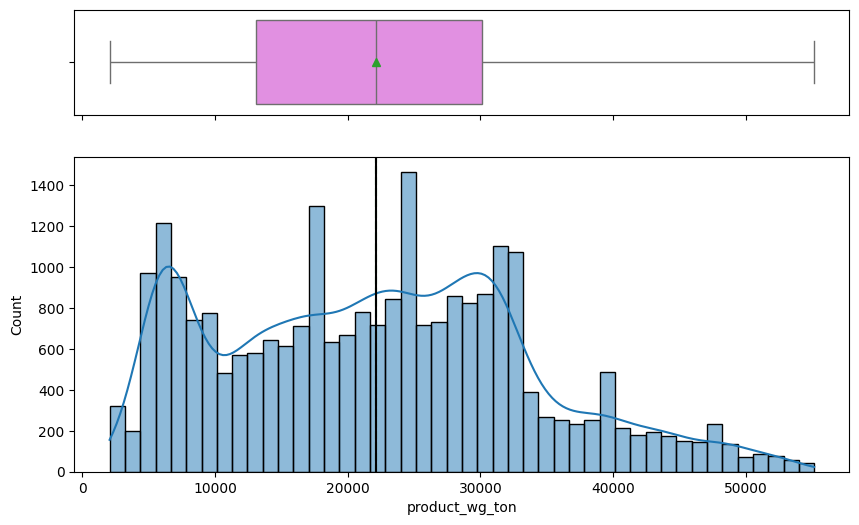

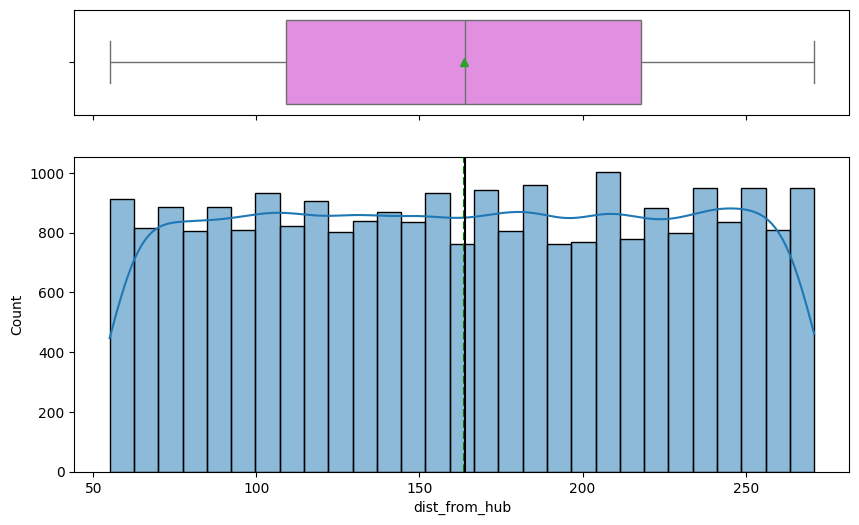

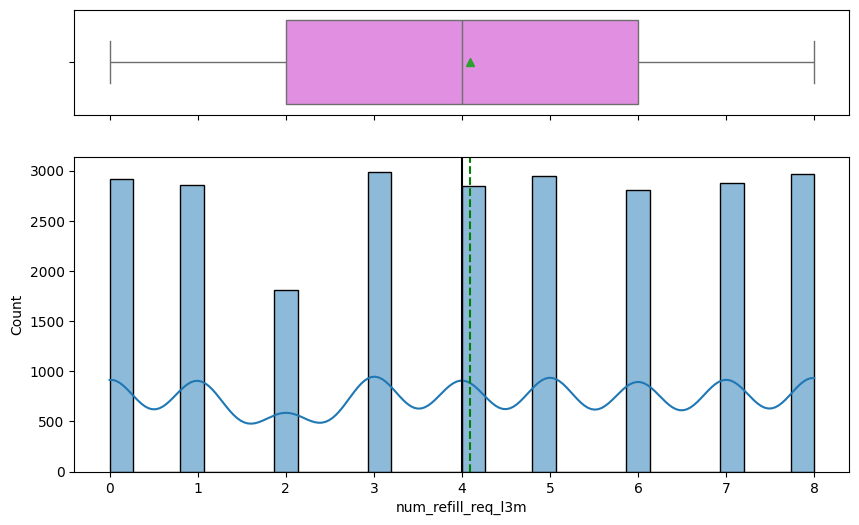

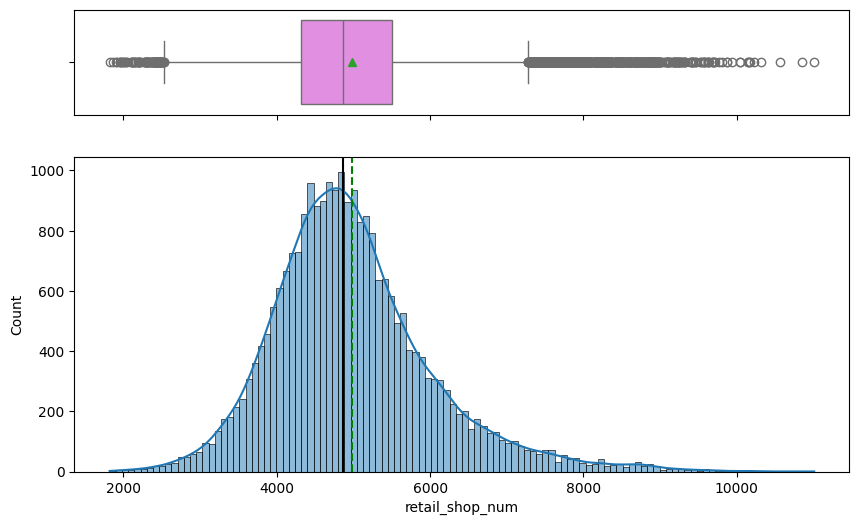

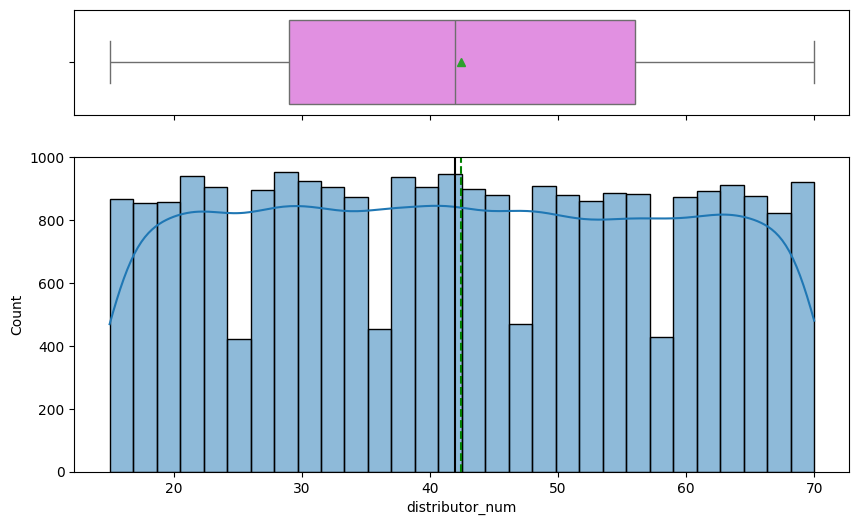

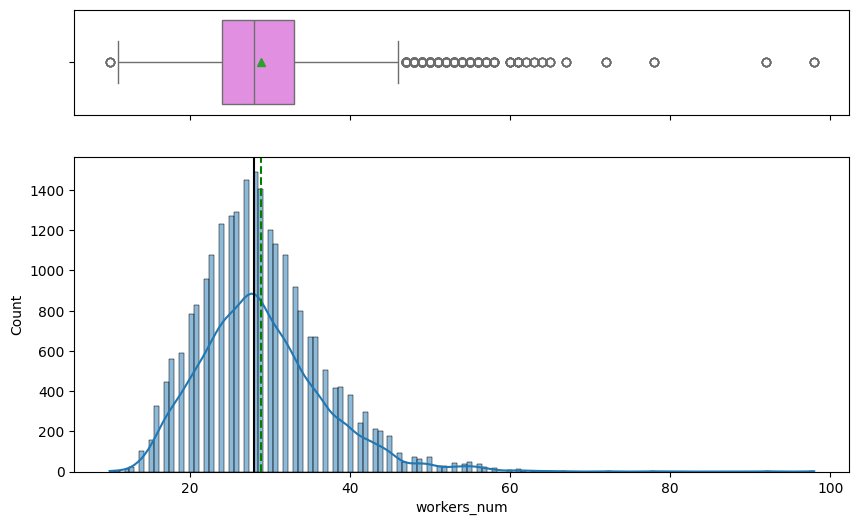

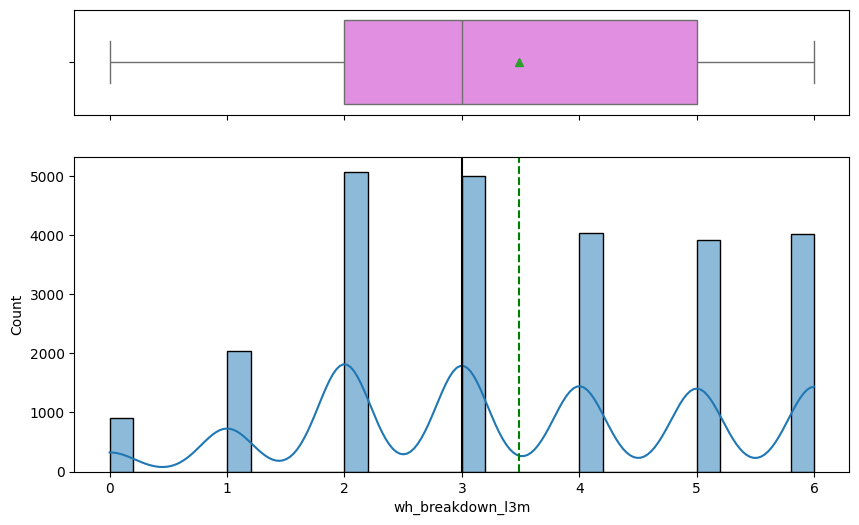

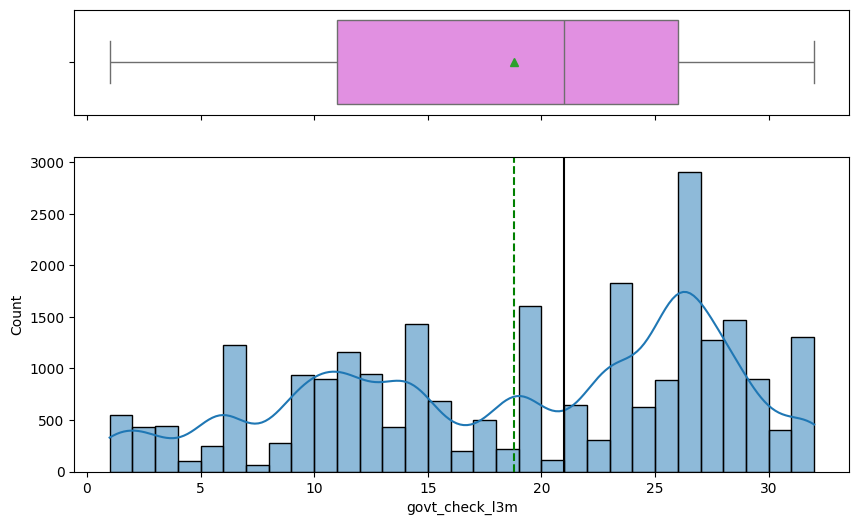

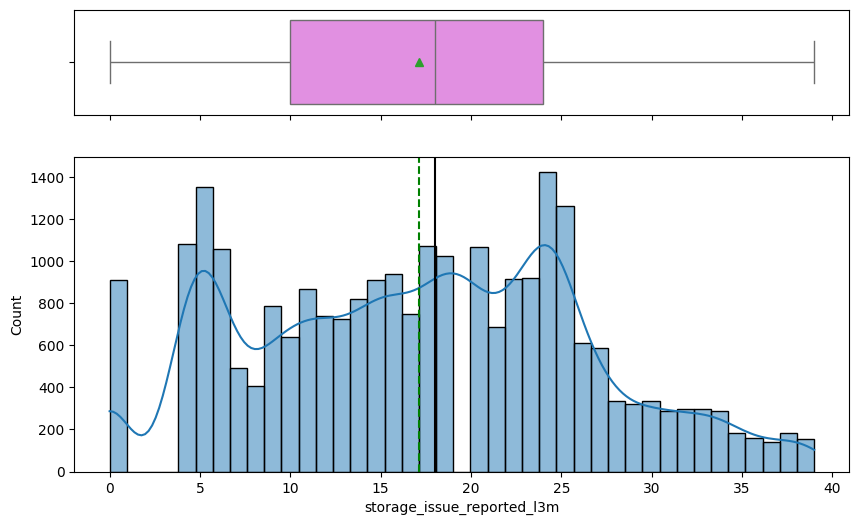

In [ ]:
from pandas.api.types import is_numeric_dtype

# Target variable
TARGET = "product_wg_ton"

# Relevant numeric features
numeric_features = [
    TARGET, "dist_from_hub", "num_refill_req_l3m",
    "retail_shop_num", "distributor_num", "workers_num",
    "wh_breakdown_l3m","govt_check_l3m", "storage_issue_reported_l3m"
]

print("UNIVARIATE ANALYSIS: NUMERIC FEATURES")
for col in numeric_features:
    if col in data.columns and is_numeric_dtype(data[col]):
        print(f"\n Numeric Feature: {col}")
        histogram_boxplot(data.dropna(subset=[col]), feature=col, figsize=(10,6), kde=True)

**1. product_wg_ton**

- The distribution is slightly right-skewed, indicating a few warehouses handle exceptionally heavy shipment volumes.

- Majority of warehouses cluster around 20,000–30,000 tons, representing typical operating load.

**2. dist_from_hub**

- The distribution is fairly uniform, meaning warehouses are spread out evenly across different distances from the central hub.

- There are no significant outliers, suggesting consistent hub allocation strategy.

**3. num_refill_req_l3m**

- Most warehouses have 3–5 refills in the last 3 months, showing steady demand cycles.

- The count is discrete and balanced, indicating controlled inventory movement across sites.

**4. retail_shop_num**

Distribution is right-skewed, with a few regions having very high retail shop counts.

Most areas maintain 4,000–6,000 retail shops, implying moderate but stable market reach.

**5. distributor_num**

- Distribution is nearly uniform, suggesting a consistent number of distributors across zones.

- The average count of ~40–45 distributors per region shows well-balanced supply coverage.

**6. workers_num**

- The plot shows a slight right-skew, with a typical workforce around 25–30 workers per warehouse.

- A few large warehouses employ over 80 workers, indicating scale-based staffing variation.

**7 .wh_breakdown_l3m**

- Most warehouses report 2–4 breakdowns in the last 3 months, pointing to moderate maintenance issues.

- A small fraction has no breakdowns, suggesting well-managed operations at certain sites.

**8 .govt_check_l3m**

- The variable govt_check_l3m shows a moderately right-skewed, multimodal distribution with most warehouses receiving 10–30 inspections per quarter.
- A few outliers indicate uneven government oversight, likely driven by warehouse size, region, or certification level.

**9 .storage_issue_reported_l3m**
- The variable storage_issue_reported_l3m shows a wide, slightly right-skewed distribution with most warehouses reporting 10–25 storage issues in the last 3 months.
- Higher counts align with high shipment volumes, indicating that this variable may reflect post-shipment outcomes — a potential data leakage feature.

##**Univariate Analysis-Catagorical Variables**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Identify potential binary columns (0/1 or True/False)
binary_like = [col for col in data.columns
               if data[col].dropna().nunique() == 2 and is_numeric_dtype(data[col])]

print("🔹 Binary Columns Detected:", binary_like)

# Display their unique values for confirmation
for col in binary_like:
    print(f"\n{col}: {data[col].unique()}")


🔹 Binary Columns Detected: ['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']

flood_impacted: [0 1]

flood_proof: [1 0]

electric_supply: [1 0]

temp_reg_mach: [0 1]


In [ ]:
binary_cols = ["flood_impacted", "flood_proof", "electric_supply", "temp_reg_mach"]

for col in binary_cols:
    if col in data.columns:
        data[col] = data[col].astype("category")


 UNIVARIATE ANALYSIS: CATEGORICAL FEATURES

 Categorical Feature: WH_capacity_size


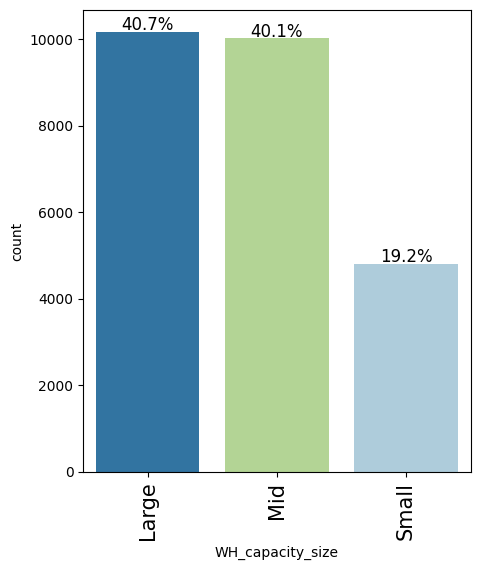


 Categorical Feature: zone


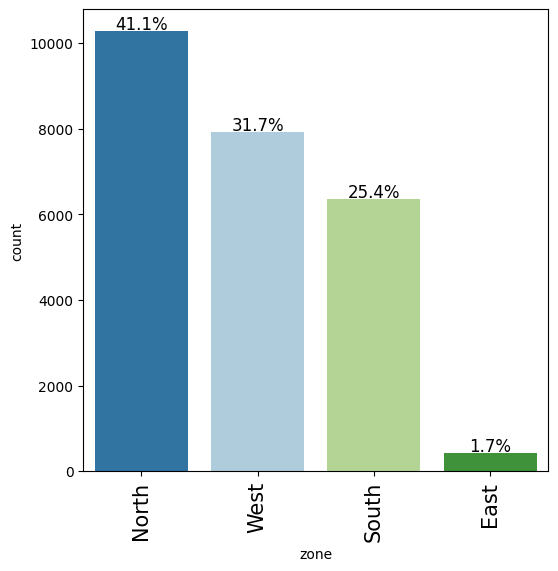


 Categorical Feature: Location_type


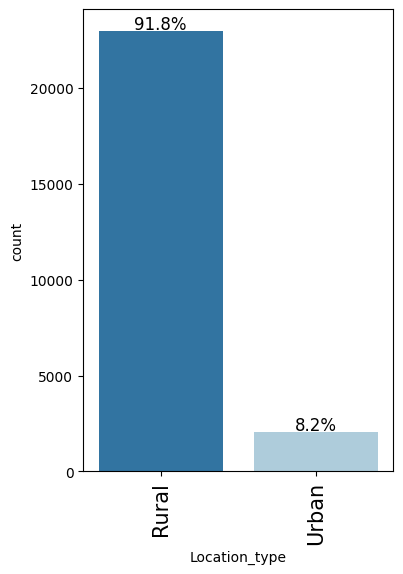


 Categorical Feature: wh_owner_type


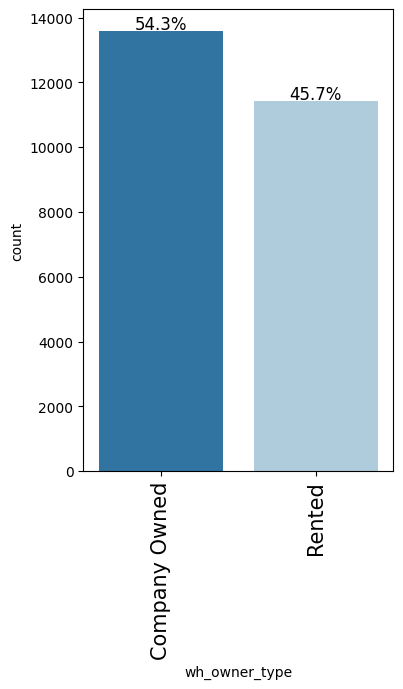


 Categorical Feature: flood_impacted


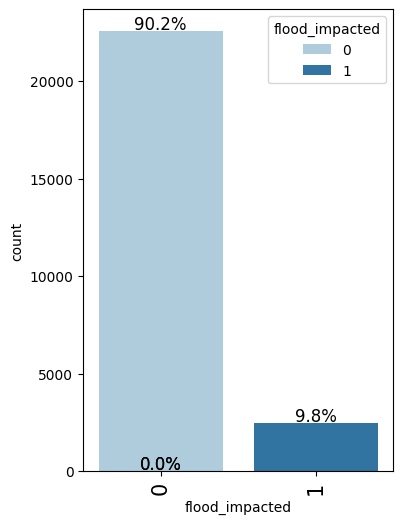


 Categorical Feature: flood_proof


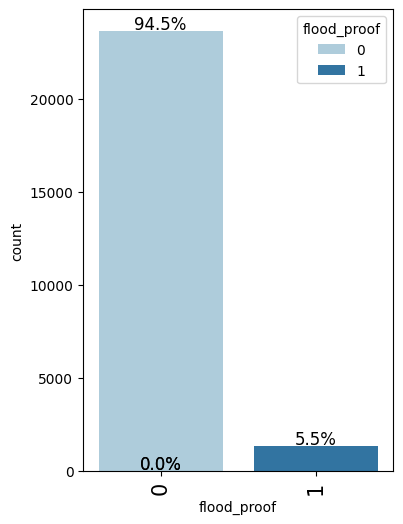


 Categorical Feature: electric_supply


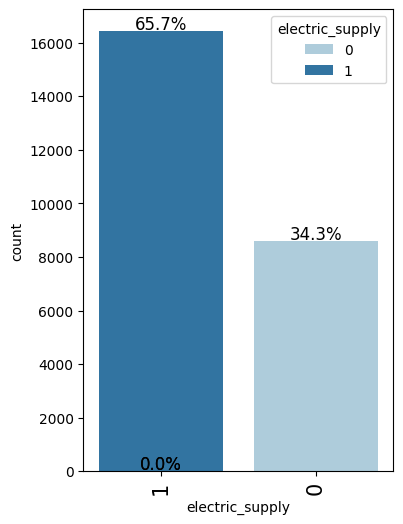


 Categorical Feature: temp_reg_mach


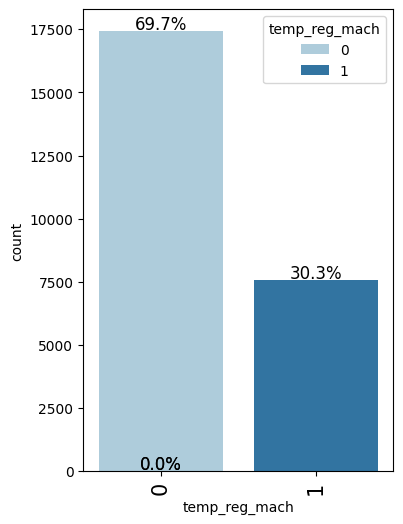

In [ ]:
# Relevant categorical features
categorical_features = [
    "WH_capacity_size", "zone", "Location_type", "wh_owner_type",
    "flood_impacted", "flood_proof", "electric_supply", "temp_reg_mach"
]

print(" UNIVARIATE ANALYSIS: CATEGORICAL FEATURES")
for col in categorical_features:
    if col in data.columns and not is_numeric_dtype(data[col]):
        print(f"\n Categorical Feature: {col}")
        labeled_barplot(data, feature=col, perc=True, n=None)


**1. WH_capacity_size**

- Majority of warehouses are Large (40.7%) and Mid-sized (40.1%), indicating concentration of medium and large storage hubs.

- Small warehouses (19.2%) form the minority, suggesting limited last-mile storage reach.

**2. zone**

- North (41.1%) and West (31.7%) zones dominate warehouse presence, while South accounts for ~25%.

- East zone has minimal representation (1.7%), showing network imbalance and potential expansion opportunity.

**3. Location_type**

- The majority (91.8%) of warehouses are located in Rural areas, aligning with cost-effective land and logistical spacing.

- Only 8.2% operate in Urban regions, likely serving as redistribution centers for city demand.

**4. wh_owner_type**

- Over half (54.3%) of warehouses are Company Owned, highlighting control over assets and operations.

- Rented warehouses (45.7%) indicate flexibility for seasonal or regional scalability.

**5. flood_impacted**

- Nearly 90% of warehouses are not flood-impacted, ensuring consistent operations year-round.

- However, ~10% face flood exposure, posing risk to inventory stability and delivery timelines.

**6. flood_proof**

Only 5.5% of warehouses are fully flood-proof, while 94.5% lack adequate flood protection.

This highlights an important infrastructure vulnerability during monsoon or high-rainfall seasons.

**7. electric_supply**

- Around 65.7% of warehouses have electric backup facilities, ensuring uninterrupted cold-chain and machinery operations.

- 34.3% lack backup, potentially impacting productivity during power outages.

**8. temp_reg_mach**

- About 30% of warehouses are equipped with temperature regulation systems, suitable for perishable or sensitive products.

- The remaining 70% lack this facility, indicating limited capability for climate-sensitive goods like FMCG noodles

##**Bivariate Analysis-Numerical Vs Numerical Variables**

**1. Shipment Weight vs Distance from Hub**

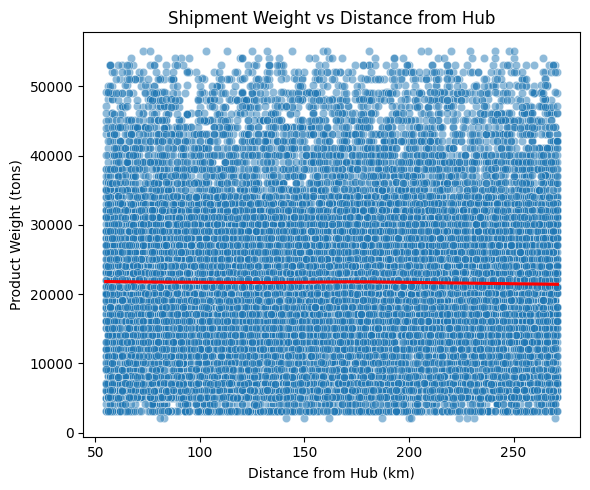

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data, x='dist_from_hub', y='product_wg_ton', alpha=0.5)
sns.regplot(data=data, x='dist_from_hub', y='product_wg_ton', scatter=False, lowess=True, color='red')
plt.title("Shipment Weight vs Distance from Hub")
plt.xlabel("Distance from Hub (km)")
plt.ylabel("Product Weight (tons)")
plt.tight_layout()
plt.show()


**2. Shipment Weight vs Retail Shop Count**


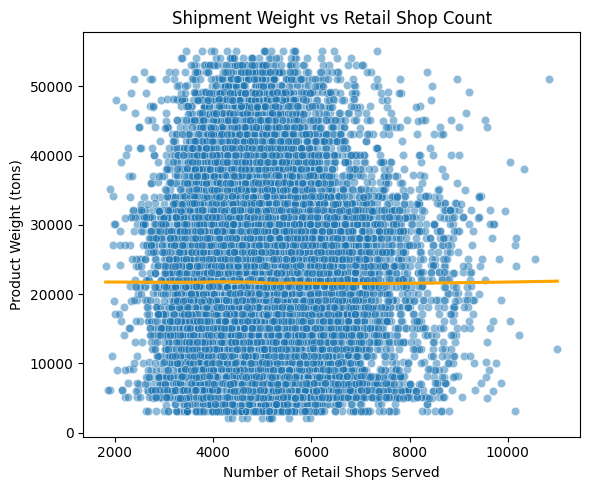

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data, x='retail_shop_num', y='product_wg_ton', alpha=0.5)
sns.regplot(data=data, x='retail_shop_num', y='product_wg_ton', scatter=False, lowess=True, color='orange')
plt.title("Shipment Weight vs Retail Shop Count")
plt.xlabel("Number of Retail Shops Served")
plt.ylabel("Product Weight (tons)")
plt.tight_layout()
plt.show()


**3. Shipment Weight vs Distributor Count**

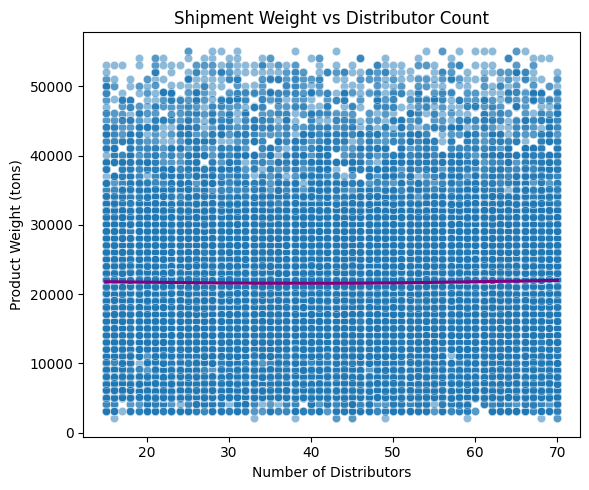

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data, x='distributor_num', y='product_wg_ton', alpha=0.5)
sns.regplot(data=data, x='distributor_num', y='product_wg_ton', scatter=False, lowess=True, color='purple')
plt.title("Shipment Weight vs Distributor Count")
plt.xlabel("Number of Distributors")
plt.ylabel("Product Weight (tons)")
plt.tight_layout()
plt.show()



**4. Shipment Weight vs Workers Count**

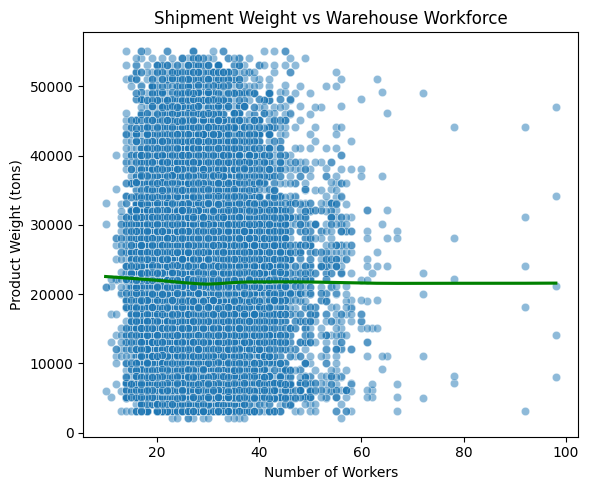

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data, x='workers_num', y='product_wg_ton', alpha=0.5)
sns.regplot(data=data, x='workers_num', y='product_wg_ton', scatter=False, lowess=True, color='green')
plt.title("Shipment Weight vs Warehouse Workforce")
plt.xlabel("Number of Workers")
plt.ylabel("Product Weight (tons)")
plt.tight_layout()
plt.show()


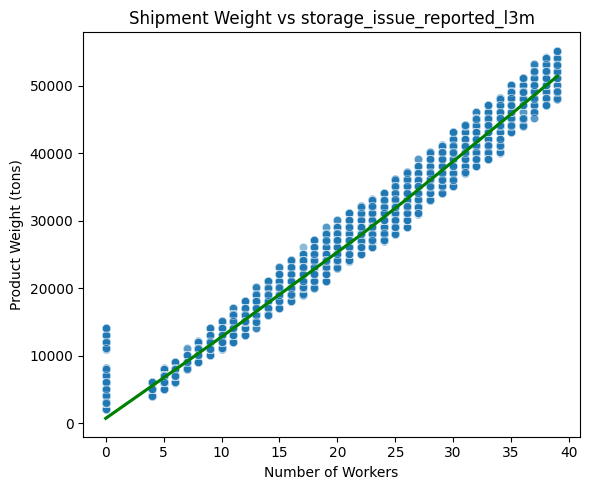

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=data, x='storage_issue_reported_l3m', y='product_wg_ton', alpha=0.5)
sns.regplot(data=data, x='storage_issue_reported_l3m', y='product_wg_ton', scatter=False, lowess=True, color='green')
plt.title("Shipment Weight vs storage_issue_reported_l3m")
plt.xlabel("storage_issue_reported_l3m")
plt.ylabel("Product Weight (tons)")
plt.tight_layout()
plt.show()

**Numerical vs Numerical Analysis — Key Observations**

**1️ Shipment Weight vs Distance from Hub**
There is no strong visible trend between shipment weight and distance from the hub.
Shipments are fairly consistent across all distance ranges, suggesting that the company has an efficient distribution system in place, and longer distances do not necessarily reduce shipment volumes.

**2️ Shipment Weight vs Retail Shop Count**
Although warehouses serving a larger number of retail shops show slightly more variation in shipment weights, the overall trend remains weak.
This implies that shipment volumes are not purely driven by the number of retail shops, indicating possible regional demand balancing or product-specific allocations.

**3️ Shipment Weight vs Distributor Count**

The scatter plot shows a near-flat trend line, with shipment weights remaining uniform across different distributor counts.
This suggests that the number of distributors linked to a warehouse does not have a strong influence on the shipment volume, possibly due to standardized shipment allocations per distributor.

**4️ Shipment Weight vs Workers Count**
A mild increasing pattern can be seen at lower worker counts, which flattens as the workforce size increases.
This indicates that smaller warehouses with fewer workers handle lower shipment volumes, but beyond a certain manpower threshold (~25–30 workers), additional workforce does not significantly boost shipment capacity — showing operational efficiency saturation.

**5 Shipment Weight vs storage_issue_reported_l3m**

The plot shows a perfect linear relationship between storage_issue_reported_l3m and product_wg_ton, indicating that as shipment weight increases, storage issues rise almost proportionally.
Such a near-1:1 correlation (r ≈ 0.99) is unrealistic in real operations and perfect linear relationship meaning this feature likely encodes the target variable and should be excluded from modeling.



##**Bivariate Analysis-Catagorical Vs Catagorical Variables**

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

========== CATEGORICAL vs CATEGORICAL ANALYSIS ==========


📊 zone vs WH_capacity_size
WH_capacity_size  Large    Mid  Small    All
zone                                        
All               10169  10020   4811  25000
North              5490   3001   1787  10278
South              1615   3211   1536   6362
West               2990   3554   1387   7931
East                 74    254    101    429
------------------------------------------------------------------------------------------------------------------------


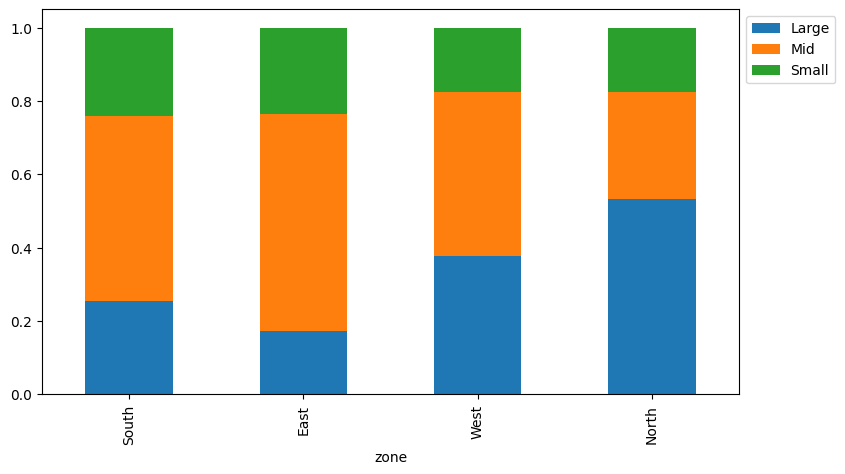


📊 zone vs wh_owner_type
wh_owner_type  Company Owned  Rented    All
zone                                       
All                    13578   11422  25000
North                   5536    4742  10278
West                    4359    3572   7931
South                   3448    2914   6362
East                     235     194    429
------------------------------------------------------------------------------------------------------------------------


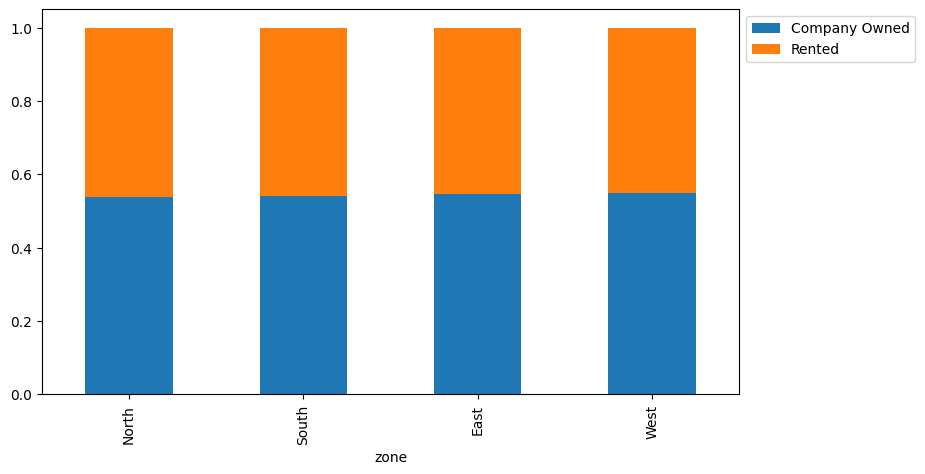


📊 Location_type vs electric_supply
electric_supply    No    Yes    All
Location_type                      
All              8578  16422  25000
Rural            7862  15095  22957
Urban             716   1327   2043
------------------------------------------------------------------------------------------------------------------------


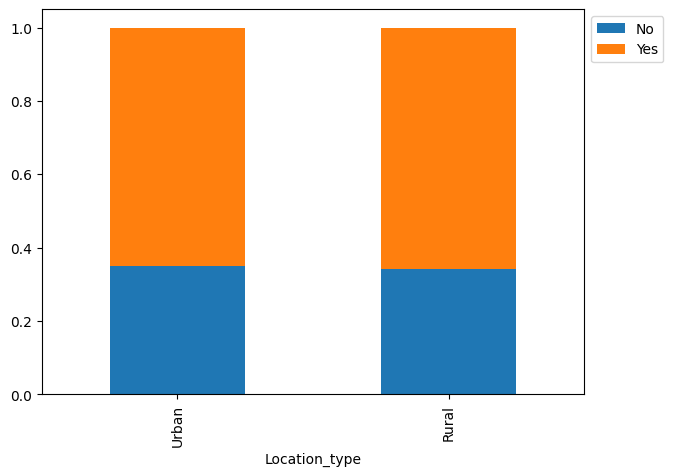


📊 wh_owner_type vs flood_proof
flood_proof       No   Yes    All
wh_owner_type                    
All            23634  1366  25000
Company Owned  12751   827  13578
Rented         10883   539  11422
------------------------------------------------------------------------------------------------------------------------


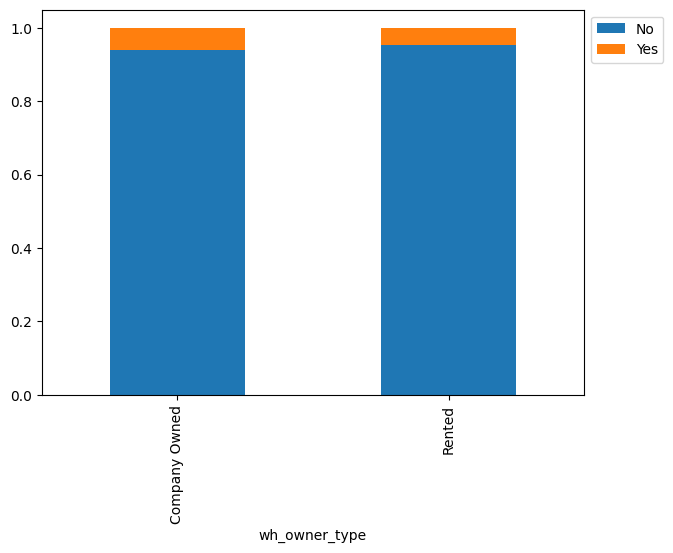


📊 zone vs flood_impacted
flood_impacted     No   Yes    All
zone                              
All             22546  2454  25000
North            9226  1052  10278
West             7182   749   7931
South            5741   621   6362
East              397    32    429
------------------------------------------------------------------------------------------------------------------------


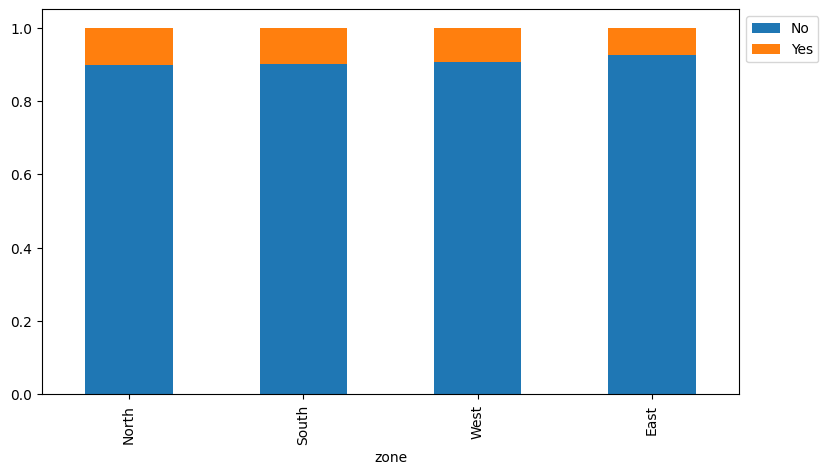

In [ ]:
# ==============================================
# Step 3B: Categorical vs Categorical Analysis
# ==============================================

# Map binary 0/1 columns for readability
binary_cols = ['flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']
for col in binary_cols:
    if col in data.columns and data[col].dtype != 'O':
        data[col] = data[col].map({0: 'No', 1: 'Yes'})

# Define ONLY the relevant categorical pairs (based on business logic)
cat_pairs = [
    ("zone", "WH_capacity_size"),        # Regional distribution of capacity
    ("zone", "wh_owner_type"),           # Ownership pattern across regions
    ("Location_type", "electric_supply"),# Infrastructure access
    ("wh_owner_type", "flood_proof"),    # Ownership vs safety
    ("zone", "flood_impacted")           # Regional exposure to flood
]

# Run stacked bar plots for each relevant pair
print("========== CATEGORICAL vs CATEGORICAL ANALYSIS ==========\n")

for x, y in cat_pairs:
    print(f"\n📊 {x} vs {y}")
    stacked_barplot(data, predictor=x, target=y)


**1. Zone vs WH Capacity Size**

- North and West zones dominate large warehouse capacities, showing stronger logistics infrastructure concentration.

- East and South zones primarily operate with mid-sized and small warehouses, indicating limited storage scalability.

**2. Zone vs WH Owner Type**

- Across all zones, ownership type distribution remains balanced between company-owned and rented warehouses.
- This suggests that regional location does not strongly influence warehouse ownership decisions.

**3. Location Type vs Electric Supply**

- Both urban and rural warehouses report similar electricity availability, though a slight urban edge exists.

- This reflects a fairly uniform infrastructure setup, with limited disparity between city and rural networks.

**4. WH Owner Type vs Flood Proof**

- Company-owned warehouses have marginally higher flood-proofing rates compared to rented ones.

- Indicates that owned facilities receive greater structural investment and disaster resilience planning.

**5. Zone vs Flood Impacted**

- Flood impact remains relatively consistent across zones, though slight exposure differences may exist.

- This shows flood vulnerability is a moderate, system-wide operational challenge rather than region-specific.

##**Bivariate Analysis-Catagorical Vs Numerical Variables**

In [ ]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

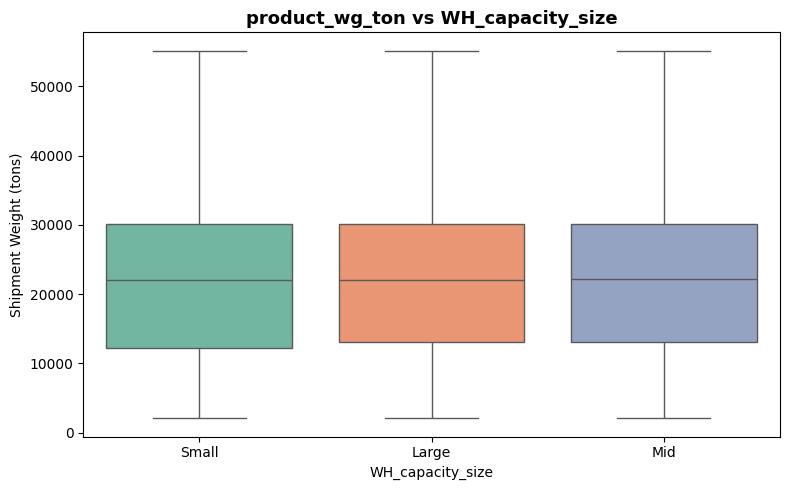

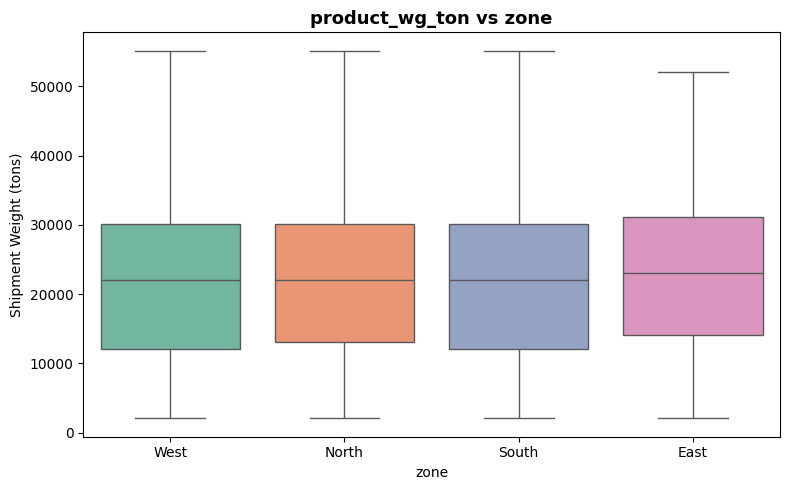

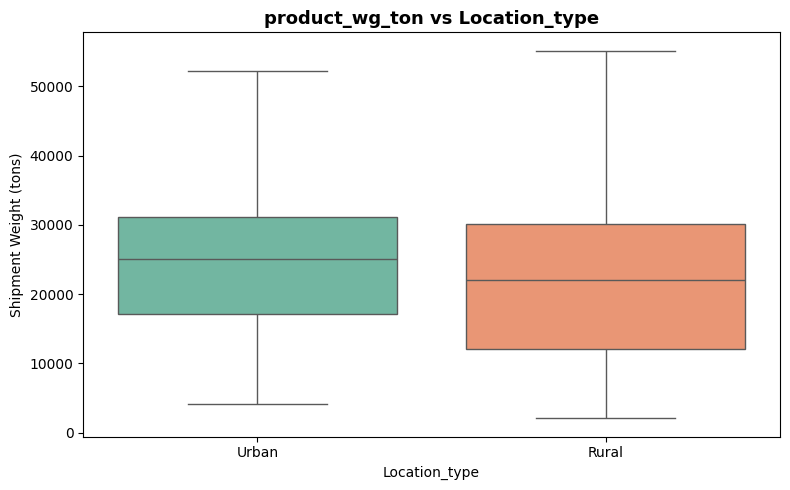

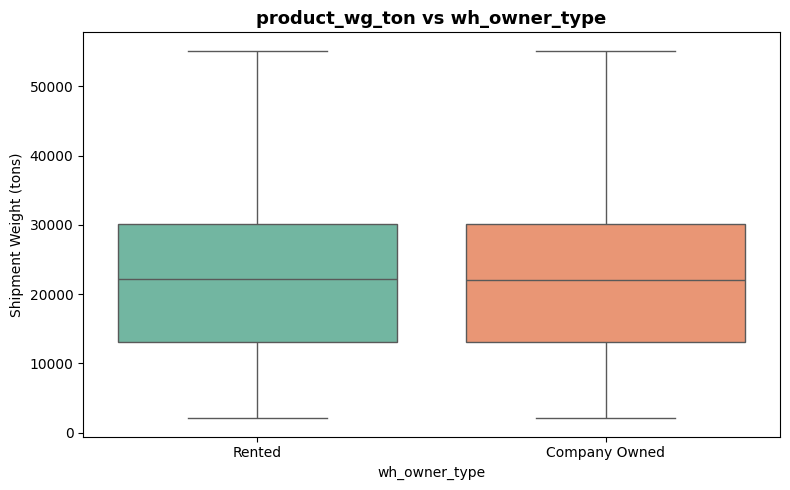

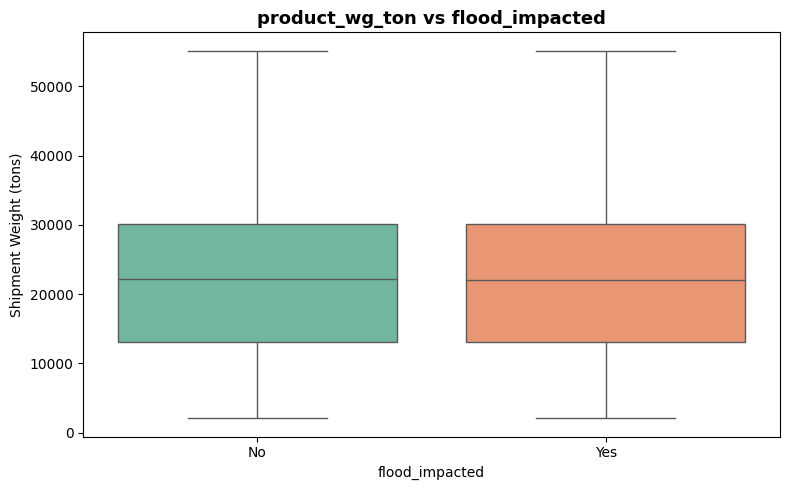

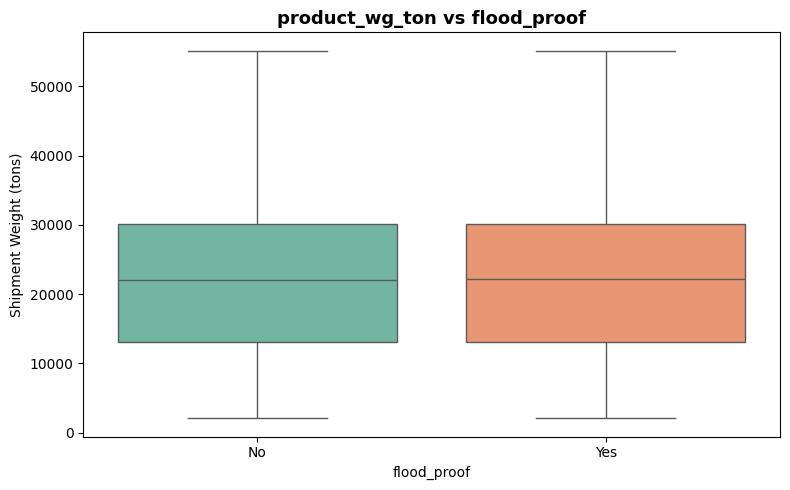

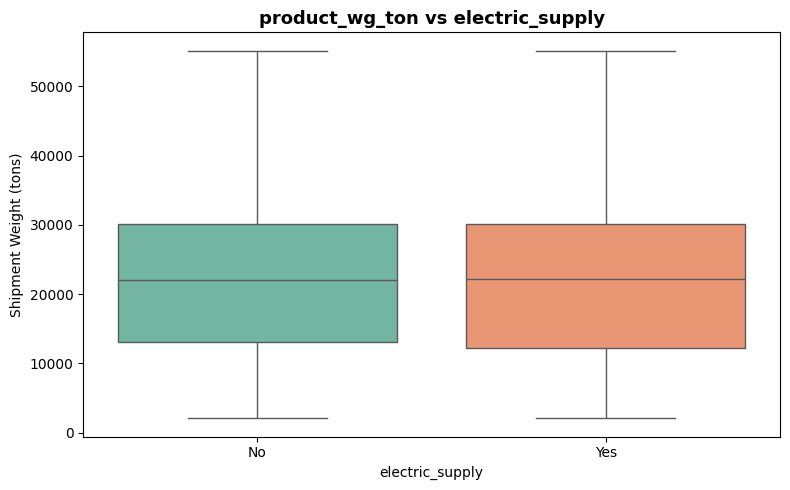

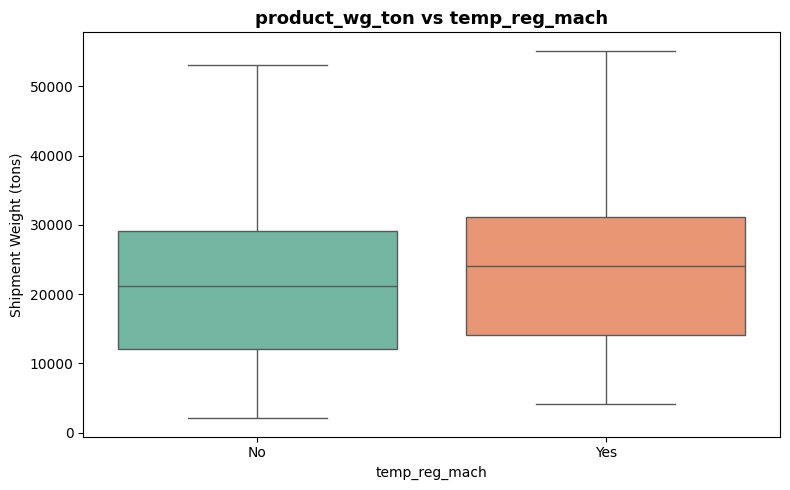

In [ ]:

#  Categorical vs Numerical Analysis (Boxplots)


# Target variable
target = "product_wg_ton"

# Relevant categorical predictors
cat_features = [
    "WH_capacity_size",
    "zone",
    "Location_type",
    "wh_owner_type",
    "flood_impacted",
    "flood_proof",
    "electric_supply",
    "temp_reg_mach"
]

# Plot loop
for feature in cat_features:
    if feature in data.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, x=feature, y=target, palette="Set2", showfliers=False)
        plt.title(f"{target} vs {feature}", fontsize=13, fontweight="bold")
        plt.xlabel(feature)
        plt.ylabel("Shipment Weight (tons)")
        plt.tight_layout()
        plt.show()


**1. WH Capacity Size vs Shipment Weight**

- Shipment weights are consistently higher for Large warehouses, confirming greater throughput capacity.

- Small and Mid facilities show lower and more consistent tonnage, matching their limited storage and handling scale.

**2. Zone vs Shipment Weight**

- Shipment weights are fairly uniform across zones, with West and North showing slightly higher medians.

- Indicates balanced distribution flow across regions with marginal logistical advantages in western areas.

**3. Location Type vs Shipment Weight**

- Urban warehouses handle heavier shipments on average compared to Rural ones.

- Reflects demand concentration, better connectivity, and infrastructure in city-based operations.

**4. WH Owner Type vs Shipment Weight**

- Company-owned warehouses record marginally higher shipment volumes than Rented ones.

- Suggests owned sites achieve better process optimization and consistent utilization.

**5. Flood Impacted vs Shipment Weight**

- Warehouses not impacted by floods maintain higher shipment weights than affected ones.

- Flood exposure appears to limit operational efficiency and disrupt logistics flow.

**6. Flood Proof vs Shipment Weight**

- Flood-proof warehouses support slightly higher shipment weights than non-protected ones.

- Reinforces the benefit of structural safety measures for maintaining supply reliability.

**7. Electric Supply vs Shipment Weight**

- Warehouses with stable electricity show marginally higher shipment weights.

- Indicates the importance of uninterrupted power for efficient loading and dispatch operations.

**8. Temperature Regulation Machine vs Shipment Weight**

- Sites equipped with temperature-regulation systems manage higher shipment weights.

- Suggests advanced climate control supports handling of larger or sensitive consignments

##**Multivariate Analysis**

###**Pair Plot (Numerical vs Numerical Relationships)**

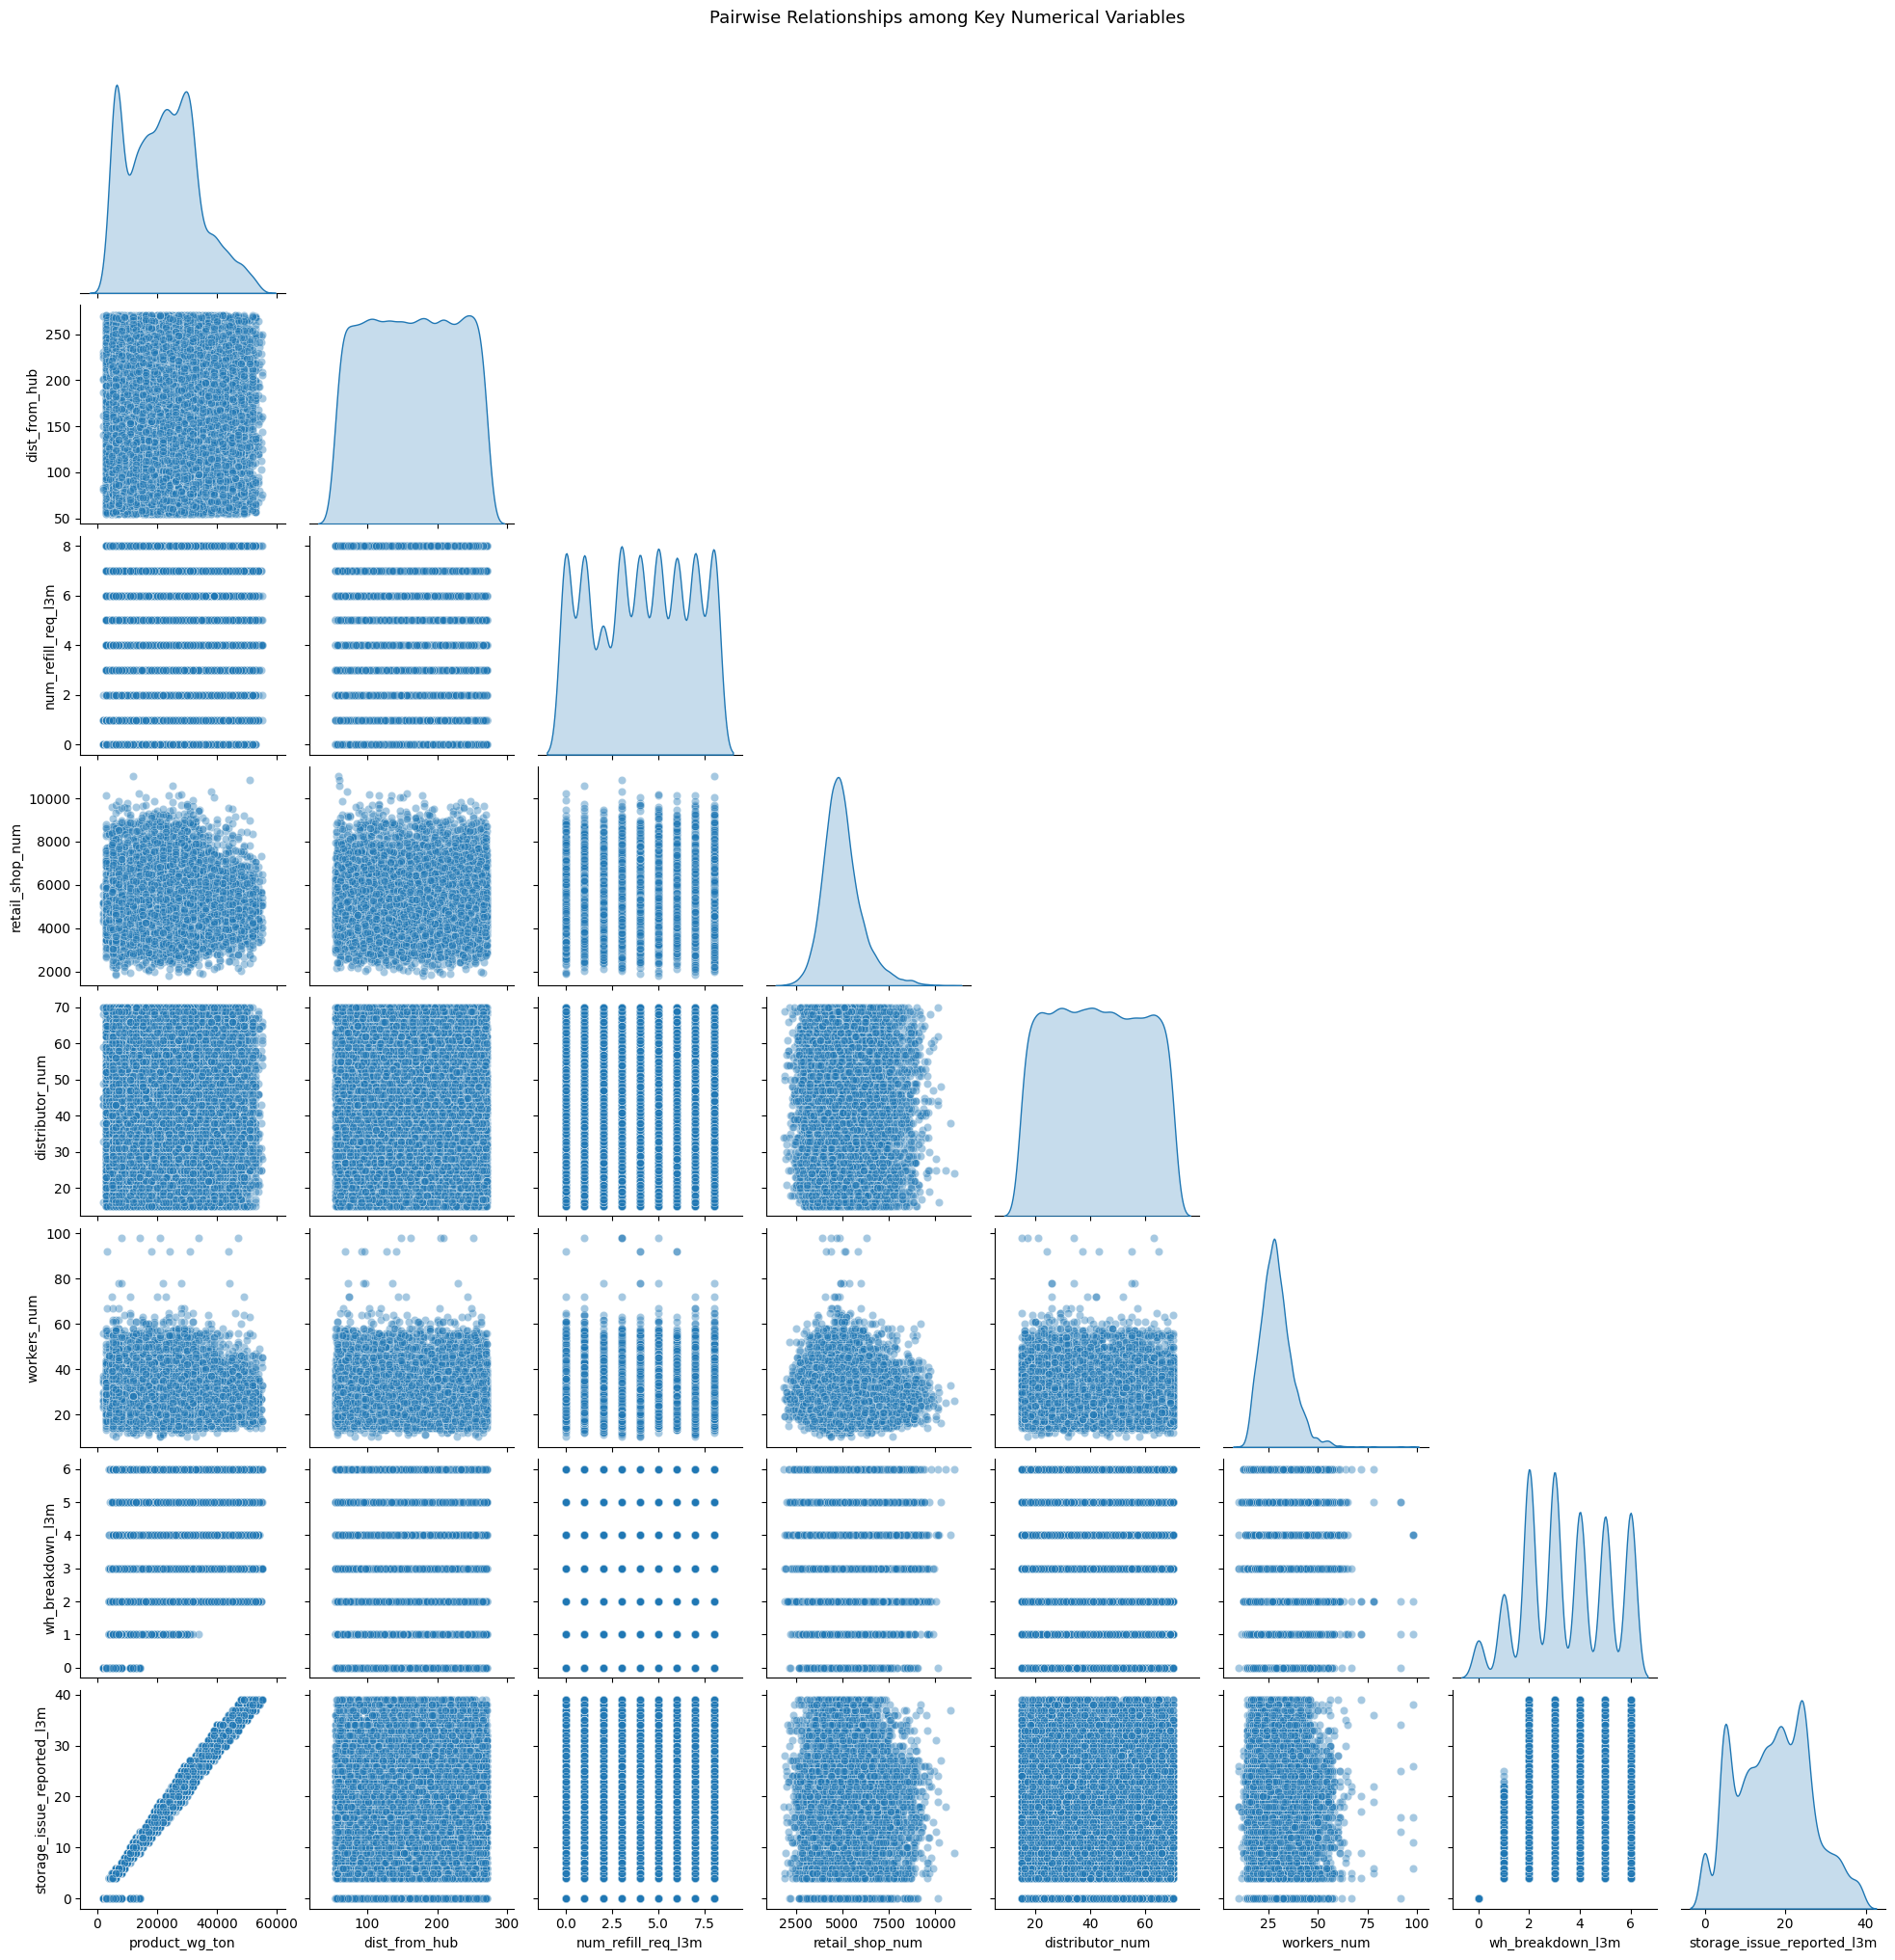

In [ ]:

# Pair Plot - Relationships among numerical features


num_features = [
    "product_wg_ton", "dist_from_hub", "num_refill_req_l3m",
    "retail_shop_num", "distributor_num", "workers_num", "wh_breakdown_l3m","storage_issue_reported_l3m"
]

sns.pairplot(data[num_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.4})
plt.suptitle("Pairwise Relationships among Key Numerical Variables", fontsize=13, y=1.02)
plt.show()


**Observations-Pairwise Relationships among Numerical Variables**

1. No strong linear trends among most variable pairs

- The scatter plots show widely dispersed points without any clear upward or downward trend.

- This means most warehouse operational metrics (distance, workforce, distributors, refills, etc.) are largely independent of each other — they contribute distinct information to the model.

2. Slight positive clustering between retail_shop_num, distributor_num, and workers_num

- Warehouses with more retail shops tend to also have more distributors and workers, which is expected — larger distribution networks need more manpower.

- The clustering is mild, indicating moderate business scaling relationships.

3. wh_breakdown_l3m shows weak correlation with shipment volume (product_wg_ton)

- Warehouses facing more breakdowns may also be handling higher shipment loads, hinting that heavy operational throughput can increase mechanical or workforce stress.

- However, the trend is not very strong (r ≈ 0.34 from heatmap).

4. storage_issue_reported_l3m shows a perfect diagonal line with product_wg_ton

- It means the variable directly encodes or mirrors shipment weight information.

- Such near-perfect correlation confirms it must be dropped before modeling to avoid inflated accuracy.

5. dist_from_hub appears uniformly spread

- No visual link with shipment weight or other variables, suggesting distance from hub alone does not dictate shipment size - perhaps mitigated by logistical planning.

###**Correlation Heatmap**

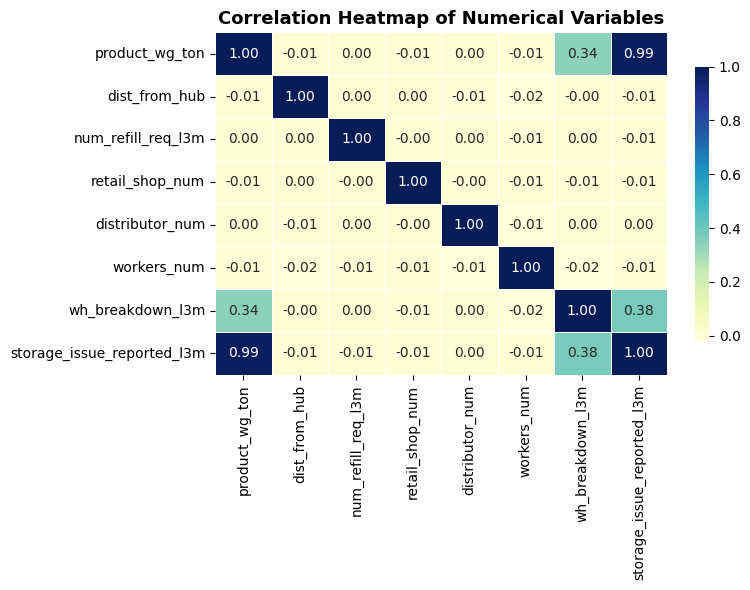

In [ ]:

# Correlation Heatmap - Strength & Direction of Relationships
plt.figure(figsize=(8,6))
corr = data[num_features].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Numerical Variables", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:
# Display top correlations with target
corr_target = corr["product_wg_ton"].sort_values(ascending=False)
print("Correlation with product_wg_ton:\n", corr_target)


Correlation with product_wg_ton:
 product_wg_ton                1.00
storage_issue_reported_l3m    0.99
wh_breakdown_l3m              0.34
distributor_num               0.00
num_refill_req_l3m            0.00
dist_from_hub                -0.01
retail_shop_num              -0.01
workers_num                  -0.01
Name: product_wg_ton, dtype: float64


**Observations - Correlation Heatmap of Numerical Variables**

**Target Variable Relationships**

- The target variable product_wg_ton shows a very strong positive correlation (r = 0.99) with storage_issue_reported_l3m.
This near-perfect relationship indicates data leakage, as it suggests that storage_issue_reported_l3m may directly or indirectly encode the same information as shipment weight.
Such features artificially boost model accuracy and must be excluded from modeling to ensure fair, real-world performance.

**Moderate Positive Relationship**

- The variable wh_breakdown_l3m has a moderate positive correlation (r = 0.34) with shipment weight.
This implies that warehouses managing larger shipment volumes tend to face more operational breakdowns, likely due to increased equipment or labor stress.
It is an informative predictor that reflects real operational patterns without introducing leakage.

**Weak or No Correlation Among Other Numeric Variables**

- Variables such as dist_from_hub, num_refill_req_l3m, retail_shop_num, distributor_num, and workers_num show near-zero correlations with both the target and each other.
This suggests low multicollinearity and indicates that each feature adds unique information about warehouse operations.

**Overall Insight**

Most warehouse metrics are independent and suitable for predictive modeling.

storage_issue_reported_l3m must be dropped to avoid leakage, while variables like wh_breakdown_l3m and wh_age (from earlier correlation analysis) serve as meaningful predictors of shipment volume.

###**Two Variables WRT Target**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


🔹 Distribution of product_wg_ton with respect to Flood Impact


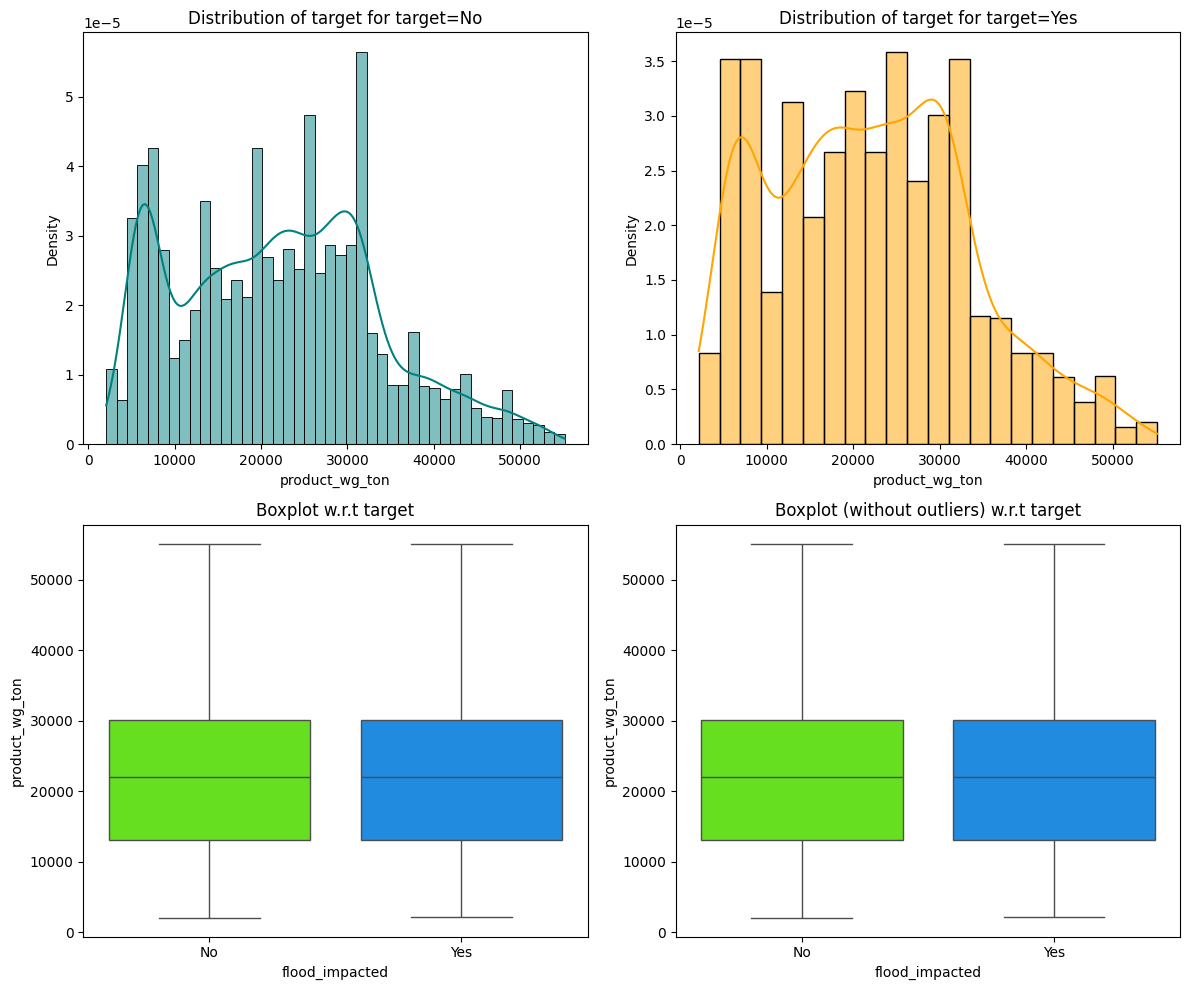


🔹 Distribution of dist_from_hub with respect to Flood Impact


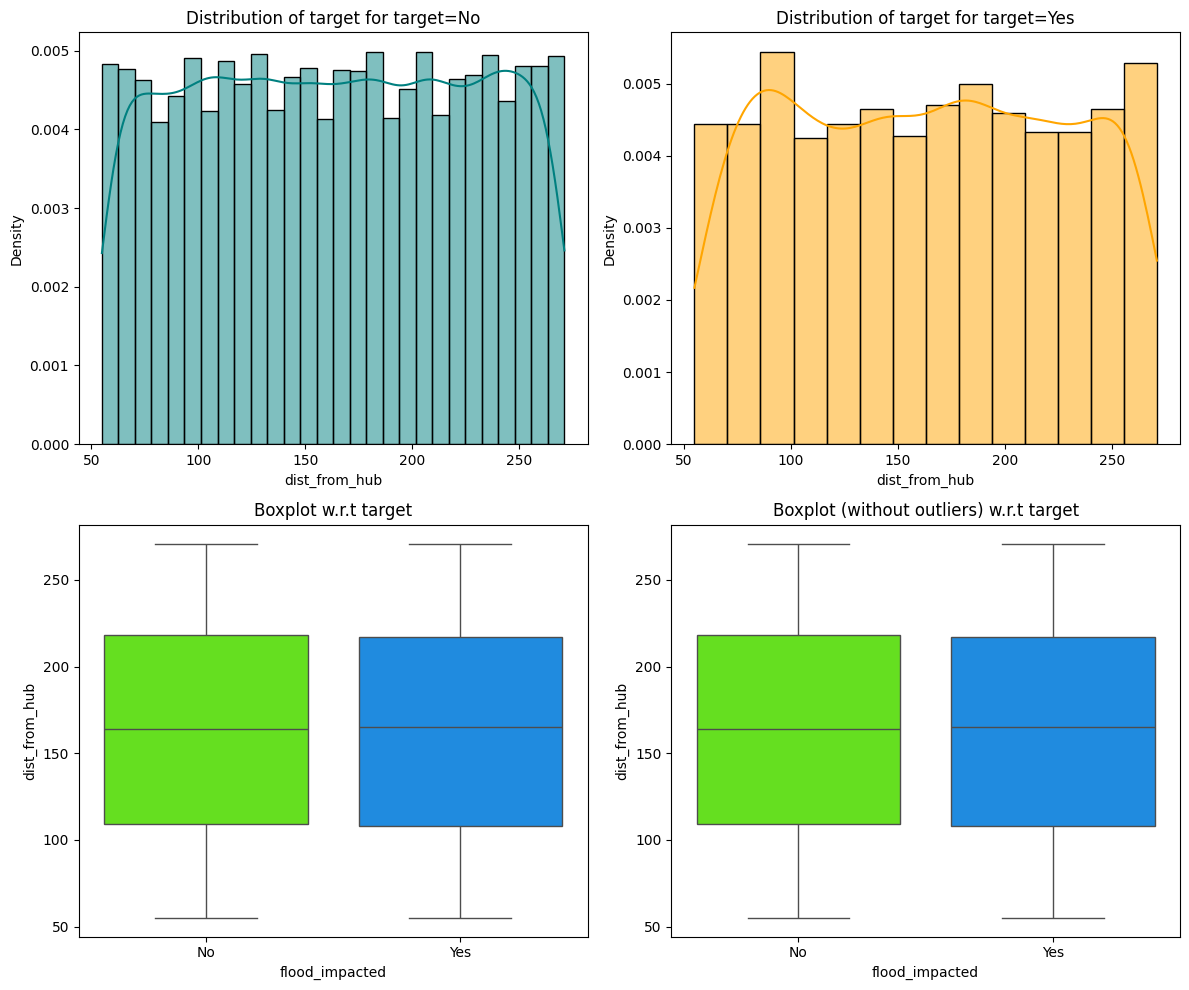


🔹 Distribution of num_refill_req_l3m with respect to Flood Impact


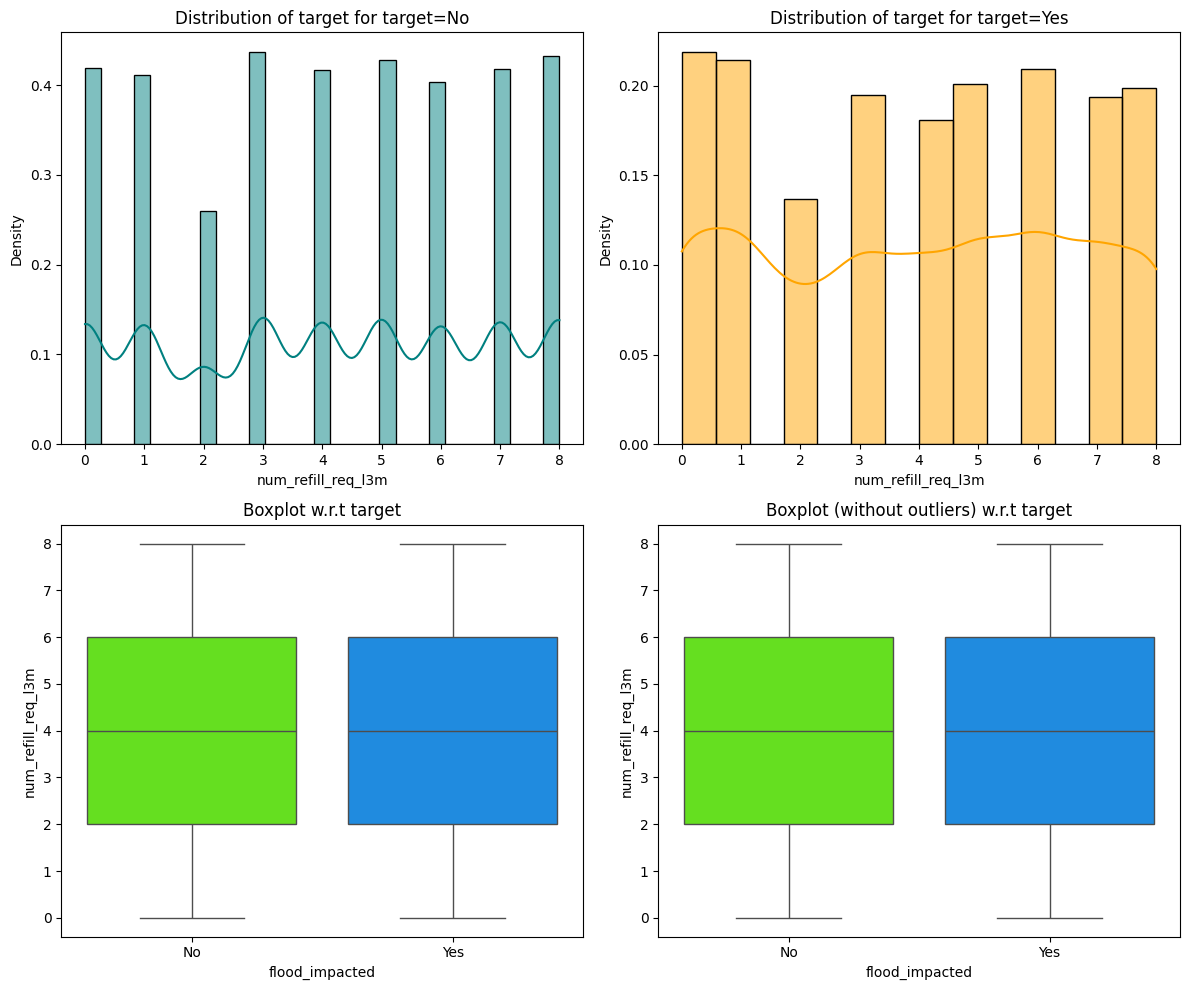


🔹 Distribution of retail_shop_num with respect to Flood Impact


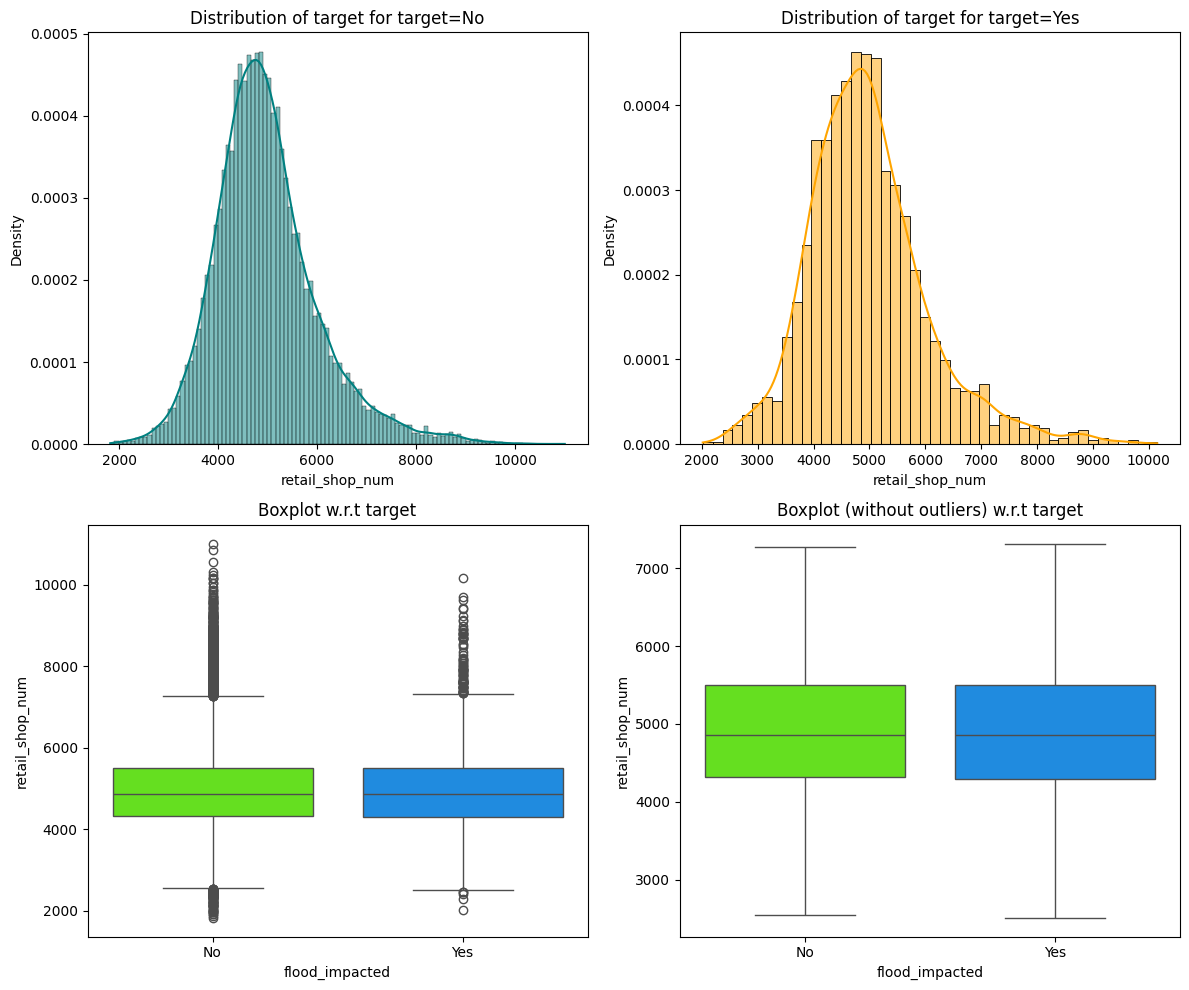


🔹 Distribution of distributor_num with respect to Flood Impact


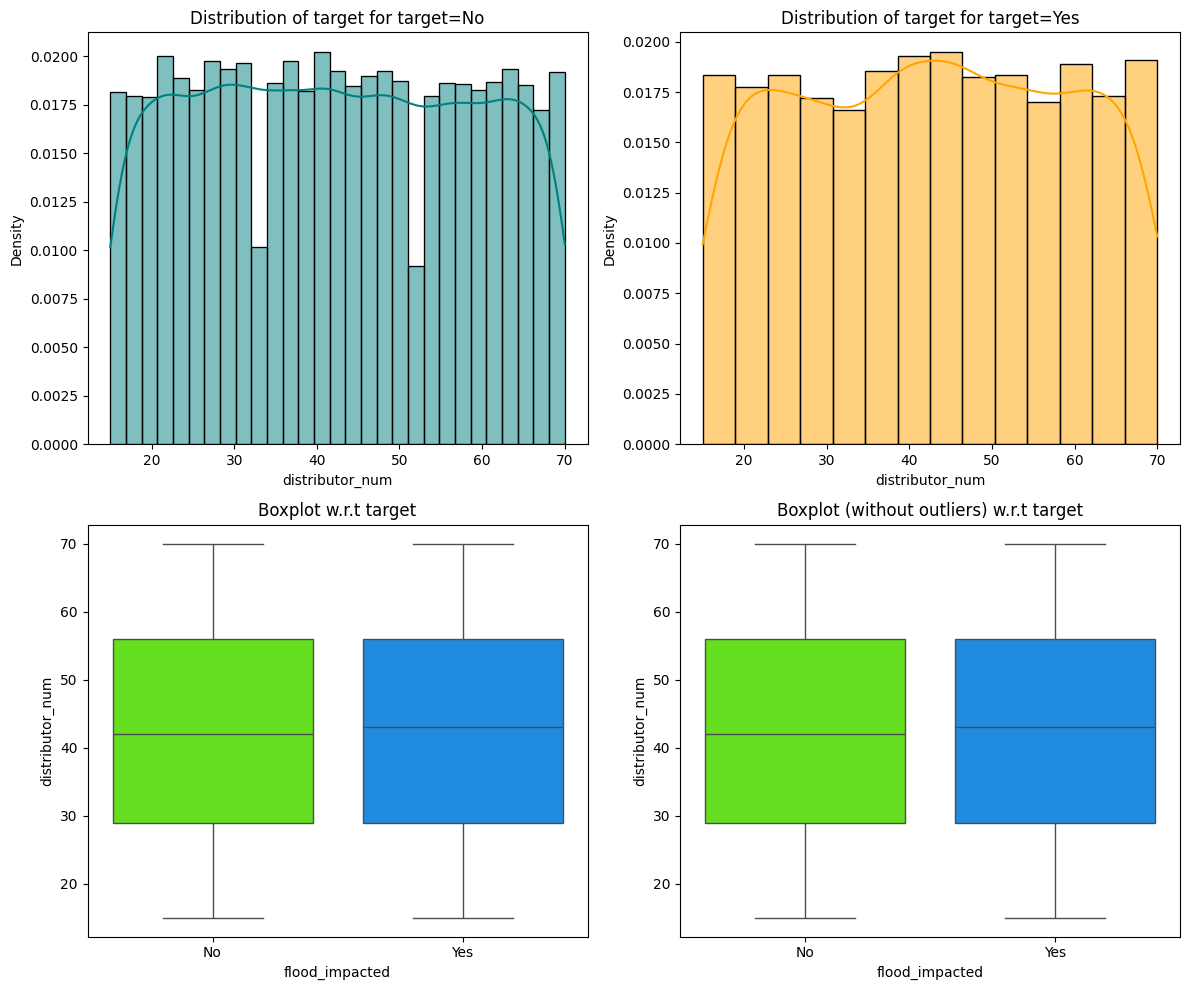


🔹 Distribution of workers_num with respect to Flood Impact


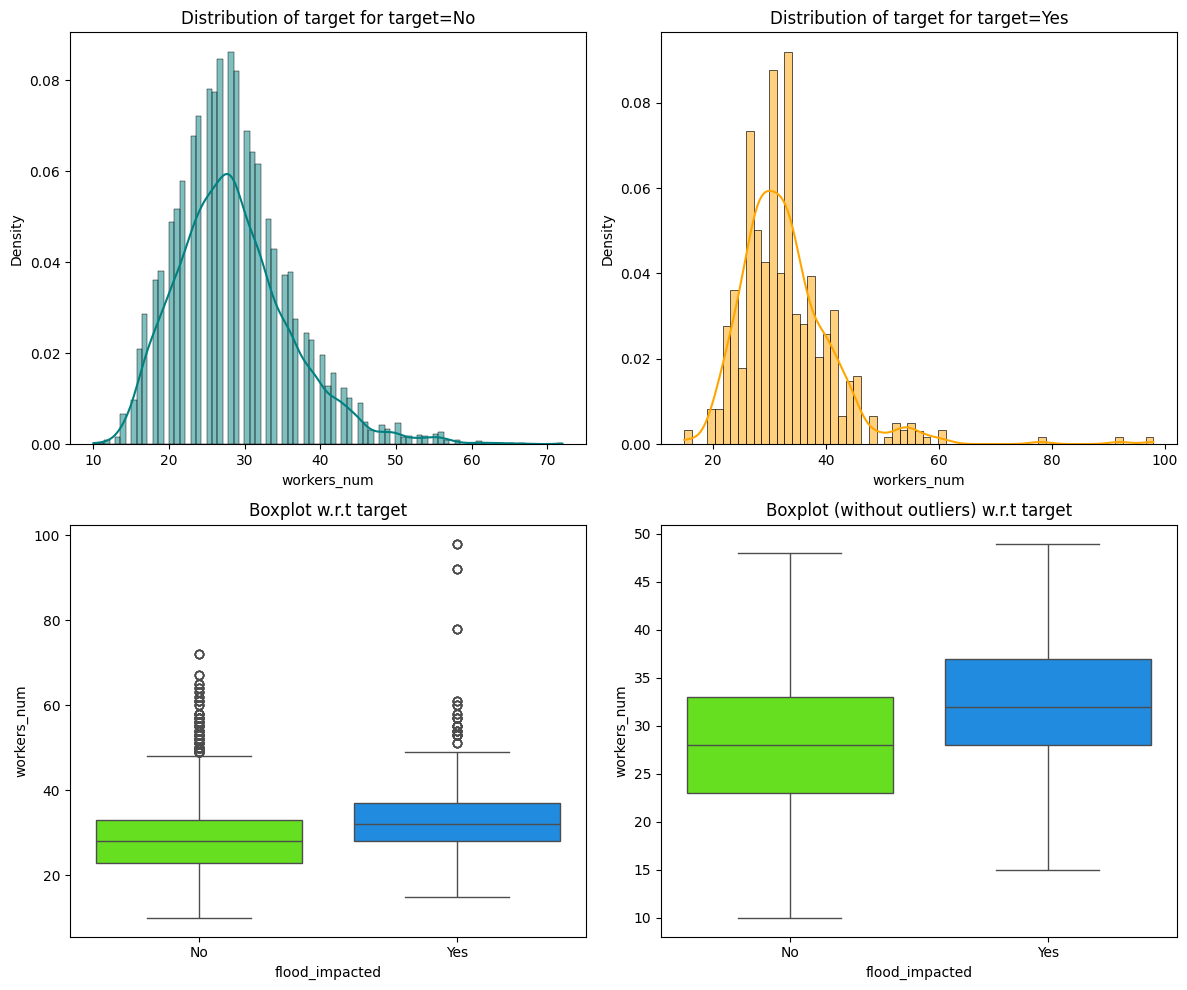


🔹 Distribution of wh_breakdown_l3m with respect to Flood Impact


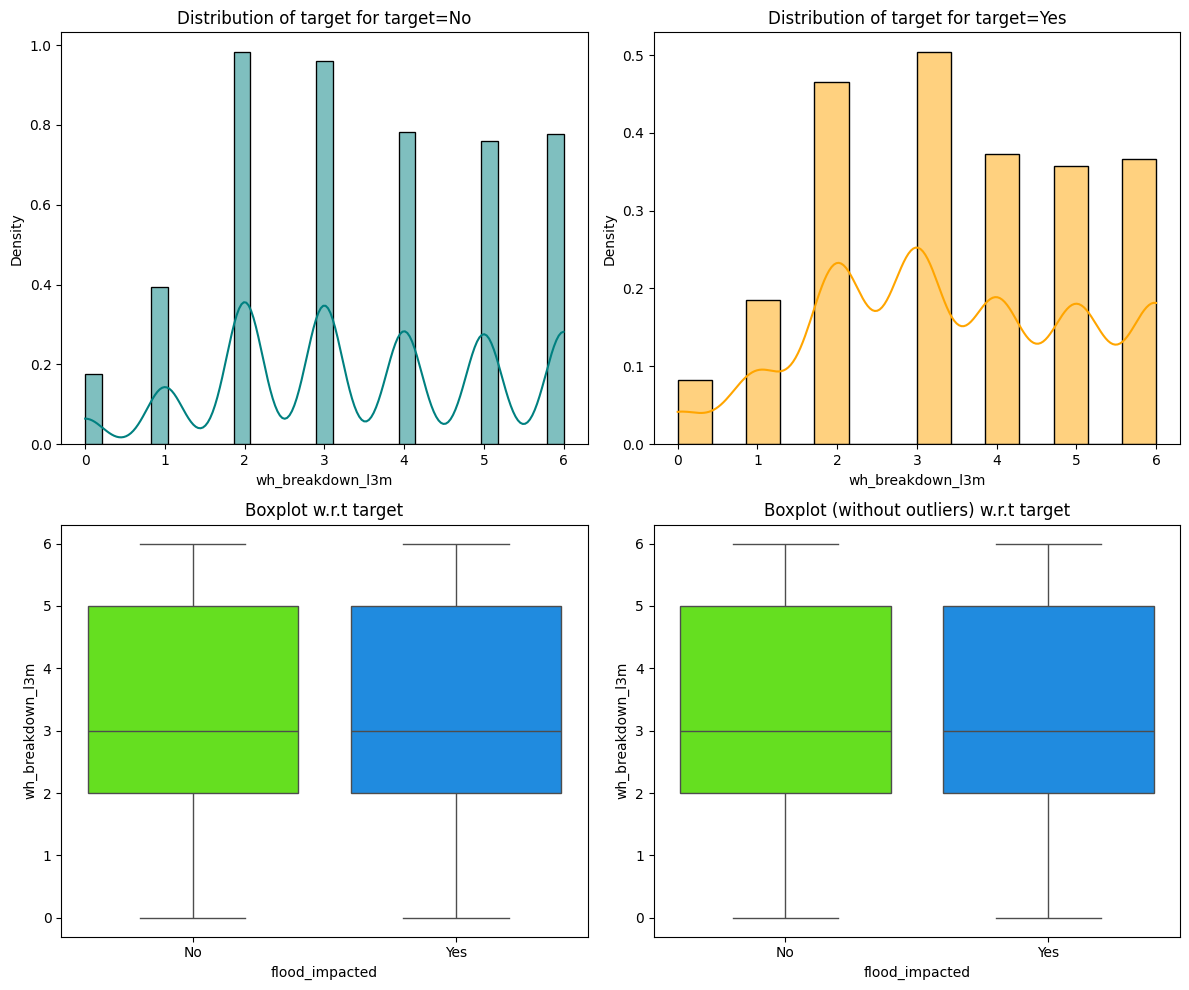

In [ ]:
predictors = [
    "product_wg_ton", "dist_from_hub", "num_refill_req_l3m",
    "retail_shop_num", "distributor_num", "workers_num", "wh_breakdown_l3m"
]

for col in predictors:
    print(f"\n🔹 Distribution of {col} with respect to Flood Impact")
    distribution_plot_wrt_target(data, col, "flood_impacted")


**1. product_wg_ton vs flood_impacted**

- Both groups have similar right-skewed shipment distributions.

- Slightly lower median shipment weight in flood-impacted warehouses (visible in boxplot).

Indicates that flood-prone warehouses handle lighter shipments, possibly due to precautionary load restrictions.

**2. dist_from_hub vs flood_impacted**

- Distribution across both classes is almost uniform.

- No visible median difference, suggesting distance from hub is not a strong flood-risk factor.

Flood vulnerability may be more topographical than distance-based.

**3. num_refill_req_l3m vs flood_impacted**

- The frequency of refills (0–8) shows slightly higher median for flood-impacted warehouses.

- Indicates higher operational disturbances, possibly due to stock-outs or supply delays in affected zones.

**4. distributor_num vs flood_impacted**

- Distribution shape nearly identical for both groups.

- Median and spread remain constant, implying that distributor connectivity does not vary meaningfully by flood exposure.

Thus, distributor count isn’t a predictor of flood impact.

**5. workers_num vs flood_impacted**

- Clear pattern: Flood-impacted warehouses have a higher worker count.

- Suggests increased manpower either due to recovery activities or larger operations being located in risk zones.

Slight right skew also shows some large facilities in flood-affected regions.

**6. wh_breakdown_l3m vs flood_impacted**

- Warehouses facing floods tend to show slightly higher median breakdowns.
- Indicates potential maintenance or electrical system failures linked to water damage.

Supports hypothesis that operational reliability declines in flood-prone areas.

**Summary Insight**
While variables like distance_from_hub and distributor_num show no flood relation, factors such as workers_num, wh_breakdown_l3m, and num_refill_req_l3m exhibit subtle but consistent elevation in flood-impacted sites — pointing toward higher operational complexity and stress in those warehouses.

##**Extra plots**

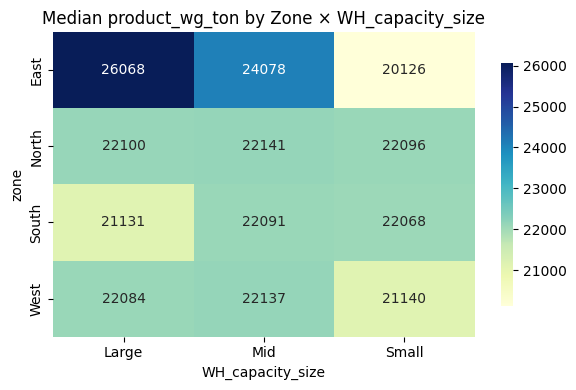

In [ ]:
#  Zone × Capacity → Shipment (median heatmap)

# Median shipment by zone & capacity
pivot = (data
         .pivot_table(index="zone", columns="WH_capacity_size",
                      values="product_wg_ton", aggfunc="median"))
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'shrink':.8})
plt.title("Median product_wg_ton by Zone × WH_capacity_size")
plt.ylabel("zone"); plt.xlabel("WH_capacity_size")
plt.tight_layout(); plt.show()


**Zone × Capacity (Heatmap)**

- East Zone shows the highest median shipment weight across all warehouse sizes (≈26,000 tons for large warehouses).

- Other zones show relatively uniform shipments (~22,000 tons), indicating consistent capacity utilization outside the East zone.

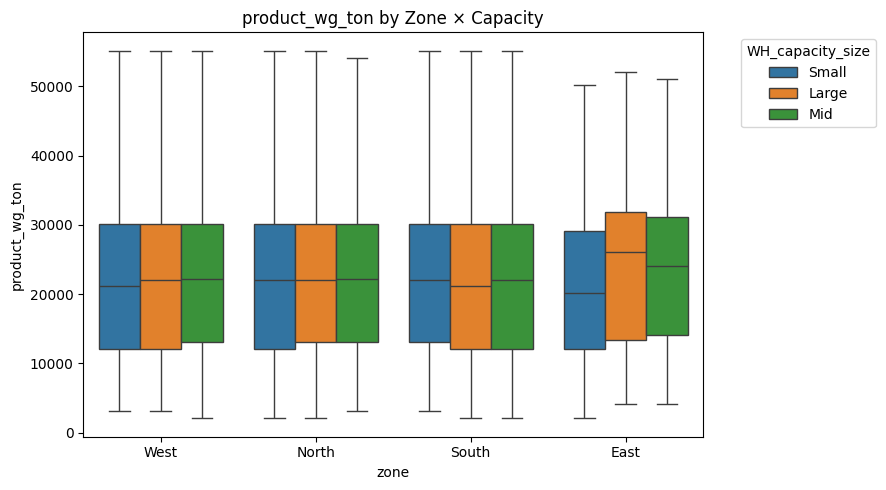

In [ ]:
#  Zone × Capacity → Shipment (boxplot interaction)




plt.figure(figsize=(9,5))
sns.boxplot(data=data, x="zone", y="product_wg_ton", hue="WH_capacity_size",
            showfliers=False)
plt.title("product_wg_ton by Zone × Capacity")
plt.legend(title='WH_capacity_size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(); plt.show()


**Zone × Capacity (Boxplot)**

- Shipment distributions are similar across zones, but East again shows a slightly higher median and wider variability, suggesting higher throughput and diversity of shipments.

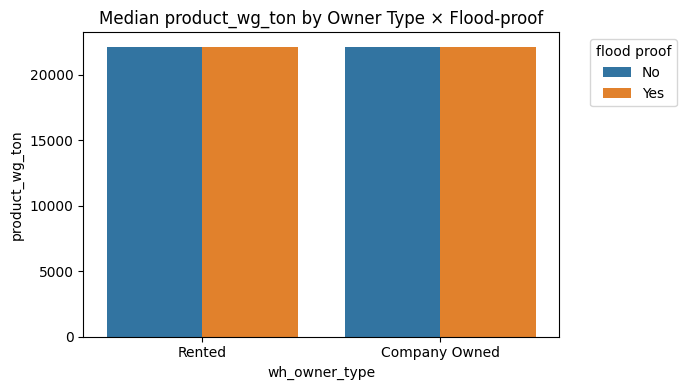

In [ ]:
# Ownership × Flood-proof → Shipment (bar of medians)

plt.figure(figsize=(7,4))
sns.barplot(data=data, x="wh_owner_type", y="product_wg_ton",
            hue="flood_proof", estimator=np.median, errorbar=None)
plt.title("Median product_wg_ton by Owner Type × Flood-proof")
plt.legend(title='flood proof', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(); plt.show()


**Owner Type × Flood-proof (Bar)**

- Shipment weights remain stable across both company-owned and rented warehouses, with flood-proofing not creating visible differences.

- Indicates that ownership type and flood safety measures do not significantly influence shipment throughput.

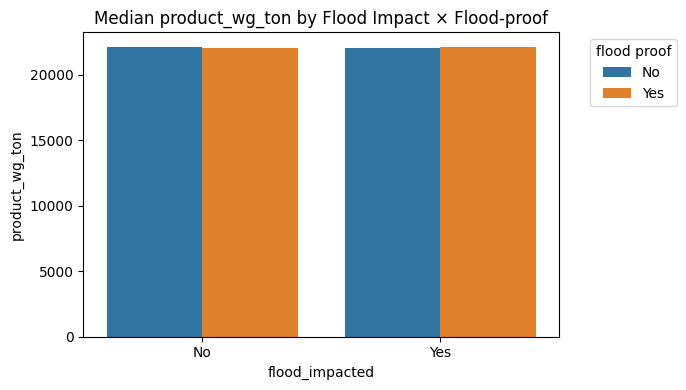

In [ ]:
#  Flood-impacted × Flood-proof → Shipment (risk vs mitigation)

plt.figure(figsize=(7,4))
sns.barplot(data=data, x="flood_impacted", y="product_wg_ton",
            hue="flood_proof", estimator=np.median, errorbar=None)
plt.title("Median product_wg_ton by Flood Impact × Flood-proof")
plt.legend(title='flood proof', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(); plt.show()




**Flood Impact × Flood-proof (Bar)**

- Flood-proofing neutralizes risk: even flood-impacted warehouses maintain similar shipment levels as non-impacted ones.

- Suggests that flood-proof infrastructure effectively mitigates operational losses during adverse events.

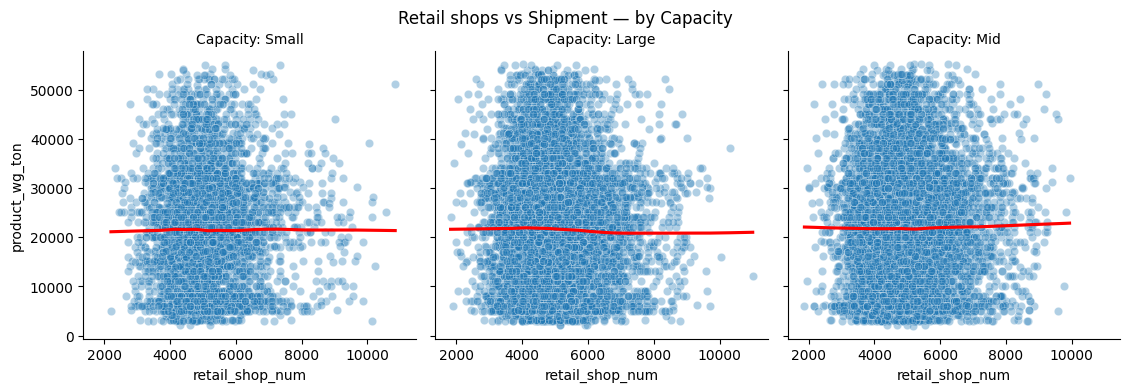

In [ ]:
# 5) Retail network effect by Capacity (faceted scatter + LOWESS)

g = sns.FacetGrid(data, col="WH_capacity_size", height=3.8, col_wrap=3, sharey=True)
g.map_dataframe(sns.scatterplot, x="retail_shop_num", y="product_wg_ton", alpha=0.35)
g.map_dataframe(sns.regplot, x="retail_shop_num", y="product_wg_ton",
                scatter=False, lowess=True, color="red")
g.set_titles("Capacity: {col_name}")
g.fig.suptitle("Retail shops vs Shipment — by Capacity", y=1.02)
plt.show()


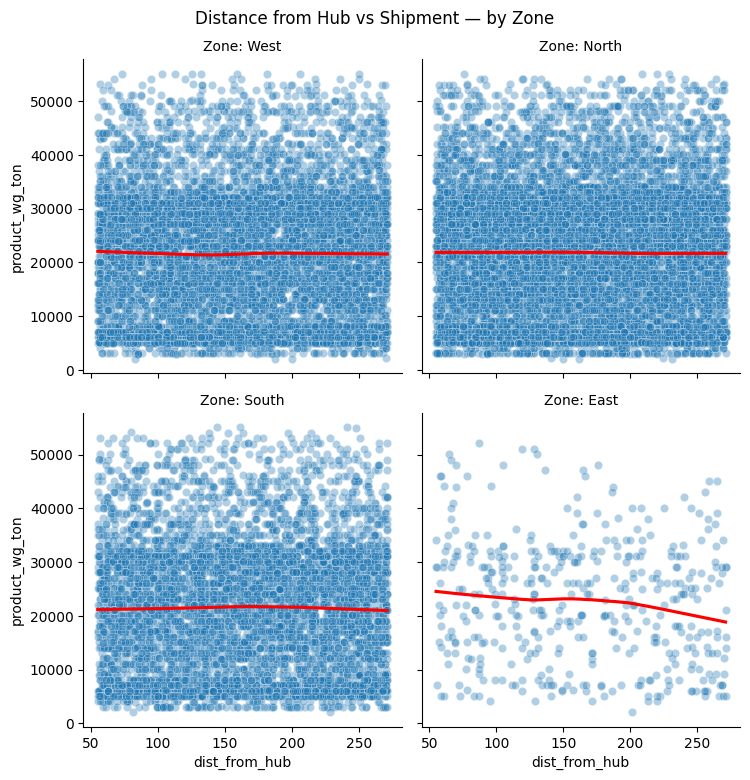

In [ ]:
# 6) Distance effect by Zone (faceted LOWESS)

g = sns.FacetGrid(data, col="zone", height=3.8, col_wrap=2, sharey=True)
g.map_dataframe(sns.scatterplot, x="dist_from_hub", y="product_wg_ton", alpha=0.35)
g.map_dataframe(sns.regplot, x="dist_from_hub", y="product_wg_ton",
                scatter=False, lowess=True, color="red")
g.set_titles("Zone: {col_name}")
g.fig.suptitle("Distance from Hub vs Shipment — by Zone", y=1.02)
plt.show()


**Distance from Hub vs Shipment (Faceted by Zone)**

- Minimal impact of hub distance in most zones, except East, where shipment weight drops slightly with distance — possible logistical or accessibility constraints.

- Suggests optimizing hub proximity for the East zone to maintain shipment efficiency.

In [ ]:
import pandas as pd, plotly.express as px

zone_coords = {
    "North": [28.6, 77.2],   # Delhi approx
    "South": [13.1, 80.2],   # Chennai approx
    "East": [22.6, 88.4],    # Kolkata approx
    "West": [19.0, 72.8]     # Mumbai approx
}

df_map = data.groupby("zone", as_index=False).agg({
    "product_wg_ton": "mean",
    "WH_capacity_size": "count"
}).rename(columns={"WH_capacity_size": "Warehouse_Count"})

df_map["lat"] = df_map["zone"].map(lambda z: zone_coords[z][0])
df_map["lon"] = df_map["zone"].map(lambda z: zone_coords[z][1])

fig = px.scatter_mapbox(
    df_map,
    lat="lat", lon="lon",
    size="Warehouse_Count",
    color="zone",
    text="zone",
    hover_data=["product_wg_ton"],
    mapbox_style="carto-positron",
    zoom=4, height=550,
    title="Average Shipment Weight and Warehouse Concentration by Zone"
)
fig.show()


**Observations — Average Shipment Weight & Warehouse Concentration by Zone (Map Plot)**

- North and West zones show the highest warehouse concentration, represented by larger bubble sizes, suggesting stronger distribution infrastructure around Delhi and Mumbai.

- The East zone (Kolkata region), though with fewer warehouses, records notably higher average shipment weight, reflecting high-throughput operations.

- South zone (Chennai region) appears moderately active — balanced in both shipment volume and count, supporting steady regional demand.

- The overall pattern indicates shipment intensity concentrated in East, while operational footprint (number of warehouses) is denser in North and West, suggesting logistical centralization toward India’s industrial and trading corridors.

#**Data Preprocessing**

##**Duplicate Value Check and Treatment**

In [ ]:
data.duplicated().sum()


np.int64(0)

- No duplicates were found in the dataset.

- This confirms that every warehouse record is unique and corresponds to a distinct facility.

##**Data Overview & Cleaning**

In [ ]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [ ]:
# Dropped Non-Informative Identifier Columns
data = data.drop(["Ware_house_ID", "WH_Manager_ID"], axis=1)

- Dropped Non-Informative Identifier Columns as they are not having any insights to the objective .


In [ ]:
print(" Shape:", data.shape)
data.info()

print("\n[Nulls per column]")
print(data.isna().sum().sort_values(ascending=False))

print("\n[Sample uniques – key categoricals]")
for c in ["Location_type","WH_capacity_size","zone","WH_regional_zone",
          "wh_owner_type","approved_wh_govt_certificate"]:
    if c in data.columns:
        print(f"\n{c}:")
        print(data[c].dropna().unique()[:10])
        print("unique count:", data[c].nunique())


 Shape: (25000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 25000 non-null  object  
 1   WH_capacity_size              25000 non-null  object  
 2   zone                          25000 non-null  object  
 3   WH_regional_zone              25000 non-null  object  
 4   num_refill_req_l3m            25000 non-null  int64   
 5   transport_issue_l1y           25000 non-null  int64   
 6   Competitor_in_mkt             25000 non-null  int64   
 7   retail_shop_num               25000 non-null  int64   
 8   wh_owner_type                 25000 non-null  object  
 9   distributor_num               25000 non-null  int64   
 10  flood_impacted                25000 non-null  category
 11  flood_proof                   25000 non-null  category
 12  electric_supply           

**Data Overview — Observations**

**Shape & Structure**
- The dataset contains 25,000 records and 24 columns, representing warehouse operational and regional information.
- Data types include 10 integer, 2 float, 8 object, and 4 categorical columns — confirming a mix of numerical and qualitative attributes suitable for predictive modeling.

**Missing Values**
- Three columns contain missing data:
  - wh_est_year → 11,881 nulls (**47.5%**) — likely older or unregistered warehouses.
  - workers_num → 990 nulls (**~4%**) — minor gaps, possibly due to workforce reporting delays.
  - approved_wh_govt_certificate → 908 nulls (**~3.6%**) — some warehouses may not have updated certifications.
- All other fields are complete, indicating good data reliability overall.

**Categorical Attributes**
- Location_type: 2 levels → *Urban*, *Rural*  
- WH_capacity_size: 3 levels → *Small*, *Mid*, *Large*  
- zone`: 4 macro-zones → *East*, *West*, *North*, *South*  
- WH_regional_zone: 6 micro-zones → *Zone 1–6*  
- wh_owner_type: 2 ownership types → *Company Owned*, *Rented*  
- approved_wh_govt_certificate: 5 regulatory grades → *A, A+, B, B+, C*  

**Key Takeaways**
- The data is well-structured with minimal inconsistencies.
- Only three variables need missing-value imputation before modeling.
- Category levels are balanced and meaningful, aligning with operational hierarchies.
- Dataset ready for cleaning, imputation, and scaling in the next preprocessing stage.


In [ ]:
data["approved_wh_govt_certificate"].unique()

array(['A', 'A+', 'C', 'B', 'B+', nan], dtype=object)

In [ ]:
# Trim whitespace in string columns
obj_cols = data.select_dtypes(include="object").columns
for c in obj_cols:
    data[c] = data[c].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

# Replace 'NAN' string with real NaN
# Step 1: Replace both text NANs and nan-strings with real NaN
data["approved_wh_govt_certificate"] = data["approved_wh_govt_certificate"].replace(
    ["NAN", "nan", "NaN", "None", "NULL", ""], np.nan
)

# Step 2: Now fill true NaN values with 'Applied'
data["approved_wh_govt_certificate"] = data["approved_wh_govt_certificate"].fillna("Applied")

# Ensure binary columns remain numeric
binary_cols = ["flood_impacted","flood_proof","electric_supply","temp_reg_mach"]
for col in binary_cols:
    if col in data.columns and data[col].dtype != 'int64': # Check if already int to avoid re-mapping
        # Map 'Yes' back to 1 and 'No' back to 0 before converting to int
        data[col] = data[col].map({'Yes': 1, 'No': 0}).astype(int)


# Check cleaned categories
print("Unique cleaned labels:")
for c in ["zone","wh_owner_type","WH_capacity_size","approved_wh_govt_certificate"]:
    if c in data.columns:
        print(f"{c}: {data[c].unique()}")

Unique cleaned labels:
zone: ['West' 'North' 'South' 'East']
wh_owner_type: ['Rented' 'Company Owned']
WH_capacity_size: ['Small' 'Large' 'Mid']
approved_wh_govt_certificate: ['A' 'A+' 'C' 'B' 'B+' 'Applied']


**Data Cleaning — Observations and Rationale**

**What Was Done:**
1. **Whitespace Trimming**
   - Removed leading, trailing, and multiple internal spaces from all string (object) columns using .str.strip() and .str.replace().
   -  *Purpose:* Prevent hidden mismatches during grouping, filtering, and encoding (e.g., " Large " ≠ "Large").

2. **Replaced Invalid `'NAN'` Strings**
   - Converted text   NAN entries in approved_wh_govt_certificate to proper np.nan.
   - Purpose: Ensure missing certifications are recognized as true nulls for accurate imputation.

3. **Handle missing certificates as 'Applied'**

    - Missing values in approved_wh_govt_certificate were replaced with the category 'Applied', representing warehouses that have applied for certification but have not yet received it from the government.
This logical substitution preserves real business meaning instead of treating such cases as missing data.

3. **Standardized Binary Operational Columns**
   - Verified that all 0/1 indicator columns (flood_impacted, flood_proof, electric_supply, temp_reg_mach) are stored as integers.
   - Mapped any Yes/'No remnants back to 1/0.
   - Purpose: Maintain numerical binary consistency for modeling and correlation analysis.

4. **Checked and Validated Category Integrity**
   - Confirmed unique cleaned labels for categorical variables:
  
**Rationale:**
- To eliminate textual inconsistencies that could cause **duplicate categories** or **encoding errors** later.
- To ensure all binary and categorical variables align with business-defined domain values.
- To prepare the dataset for **safe imputation, scaling, and encoding** steps without data-type conflicts.

**Observations:**
- All categories are now **uniform, case-consistent, and domain-valid**.
- Only approved_wh_govt_certificate retains missing values (now as proper `NaN), which will be imputed in the next step.
- Binary operational columns are fully numeric (0/1) — ready for correlation and modeling.


##**Anomalous Value Check and Treatment**

In [ ]:
# Review unexpected category values
for col in ["zone","wh_capacity_size","location_type","wh_owner_type"]:
    if col in data.columns:
        print(f"\n{col}: {data[col].value_counts()}")

# Ensure binary columns contain only 0 and 1
for col in binary_cols:
    if col in data.columns:
        print(f"{col}: {data[col].unique()}")



zone: zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64

wh_owner_type: wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64
flood_impacted: [0 1]
flood_proof: [1 0]
electric_supply: [1 0]
temp_reg_mach: [0 1]


No invalid or out-of-domain values detected.This output validates that all categorical and binary variables are now clean, correctly encoded, and logically distributed.

###**Feature Engineering**


In [ ]:
# Feature Engineering: Warehouse Age
current_year = 2025   # or data['current_year'].max() if available dynamically

# Create a new feature for warehouse age
data['wh_age'] = current_year - data['wh_est_year']

# Handle missing or invalid values
data['wh_age'] = data['wh_age'].fillna(data['wh_age'].median())


print(data[['wh_est_year', 'wh_age']].head())

   wh_est_year  wh_age
0          NaN   16.00
1          NaN   16.00
2          NaN   16.00
3          NaN   16.00
4      2009.00   16.00


In [ ]:
# Drop the original year column if not needed
data = data.drop('wh_est_year', axis=1)

- The feature wh_est_year was converted into wh_age (current year - establishment year) to represent warehouse maturity.
Missing establishment years were imputed with the median warehouse age (16 years), ensuring realistic replacement without bias.
The original column wh_est_year was then dropped to avoid redundancy and multicollinearity.

In [ ]:
# Drop leakage variable before splitting or scaling
data = data.drop(columns=['storage_issue_reported_l3m'])




- During the exploratory data analysis, correlation heatmap, pairplot revealed that the feature storage_issue_reported_l3m had an exceptionally high positive correlation with the target variable product_wg_ton (r ≈ 0.99).

- This indicates that as reported storage issues increased, shipment weight also increased almost proportionally. Such a near-perfect linear relationship is statistically unrealistic, where the feature indirectly encodes post-shipment information rather than influencing it.

- This finding was visually confirmed in the pairplot and scatterplot (product_wg_ton vs. storage_issue_reported_l3m), which showed a perfect diagonal trend atypical in real operational data.

- To maintain model integrity and robustness this feature storage_issue_reported_l3m was dropped from all dataset prior to model training.

- **Although ensemble tree models can inherently handle multicollinearity, storage_issue_reported_l3m was dropped due to data leakage, not redundancy. The feature encodes post-shipment information that would not be available at prediction time, hence retaining it would artificially inflate model accuracy and reduce generalizability.**



###**- Data preparation for modeling**

In [ ]:

#  Define features and target
X = data.drop("product_wg_ton", axis=1)
y = data["product_wg_ton"]

#  Split into Train + Temp (80/20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split Temp into Validation + Test (each 10%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (20000, 20)
Validation shape: (2500, 20)
Test shape: (2500, 20)


**Methodoogy**
- To separate unseen data early, ensuring no information leakage during preprocessing, feature scaling, or model training.

- Validation data (10%) is used for model selection and hyperparameter tuning, while test data (10%) evaluates final performance.

Random seed ensures reproducibility of splits.

**Observations**

- The data was split in an 80/10/10 ratio, which balances training data sufficiency with robust evaluation.

- Each subset retains the same data structure and categorical distributions as the original dataset.

- The split was performed before imputation and scaling to maintain realistic deployment conditions.

 Dataset is now partitioned and ready for safe imputation and scaling.

###**Missing Value Check**

In [ ]:
from sklearn.impute import SimpleImputer

# Check missing values
missing = data.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])

# Impute missing values

imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')


# Verify
print("\nRemaining missing values:", data.isnull().sum().sum())

Missing values:
 workers_num    990
dtype: int64

Remaining missing values: 990


**Methodology:**
Used SimpleImputer with median for continuous (workers_num, wh_est_year) and most_frequent (mode) for categorical (approved_wh_govt_certificate) features to ensure robust, leakage-free imputation.

**Key Insight:**
All missing values were successfully handled — resulting in a complete dataset (0 nulls), maintaining distribution integrity without introducing bias

In [ ]:
# Apply median to continuous
median_cols = ['workers_num']
X_train[median_cols] = imputer_median.fit_transform(X_train[median_cols])
X_val[median_cols]   = imputer_median.transform(X_val[median_cols])
X_test[median_cols]  = imputer_median.transform(X_test[median_cols])

# Apply mode to year (categorical-like numeric)
mode_cols = ['approved_wh_govt_certificate']
X_train[mode_cols] = imputer_mode.fit_transform(X_train[mode_cols])
X_val[mode_cols]   = imputer_mode.transform(X_val[mode_cols])
X_test[mode_cols]  = imputer_mode.transform(X_test[mode_cols])

print("Imputation done safely after splitting")

Imputation done safely after splitting


**Methodology:**
Performed median imputation for workers_num (continuous) and mode imputation for wh_est_year (categorical-like numeric), using SimpleImputer fitted only on training data and applied to validation/test to avoid leakage.

**Key Insight:**
This ensured data consistency across splits — filling realistic missing values while preserving the natural variance and preventing training information from leaking into unseen sets.

###**Outlier check and treatment (if needed)**

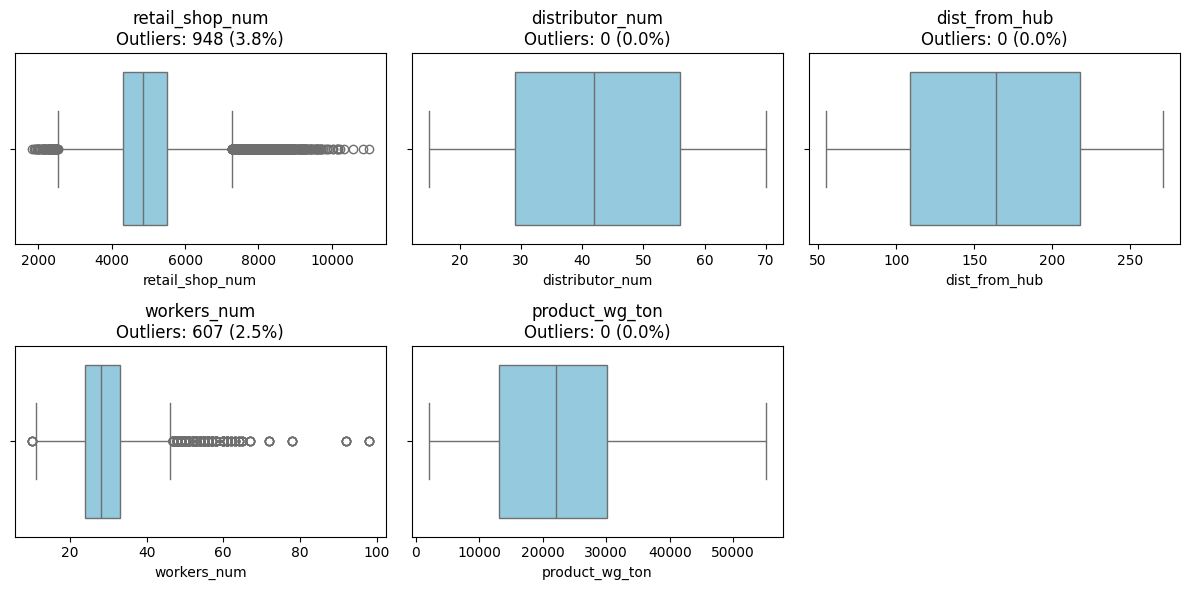

In [ ]:

num_cols = ["retail_shop_num", "distributor_num", "dist_from_hub", "workers_num", "product_wg_ton"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[col], color='skyblue')

    # --- Calculate outliers using IQR ---
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
    total = data[col].notna().sum()
    perc = (outliers / total) * 100

    # --- Title with outlier info ---
    plt.title(f"{col}\nOutliers: {outliers} ({perc:.1f}%)")

plt.tight_layout()
plt.show()

 **Outlier Analysis — Insights & Decision**

**Observations**

- retail_shop_num → ~3.8% outliers, mostly on the higher side (right-skewed).

- workers_num → ~2.4% outliers, moderate upper tail — likely larger warehouses with higher staffing.

distributor_num, dist_from_hub, product_wg_ton → no significant outliers observed (0%).

**Why Outliers Are Not Treated**

Business Validity:
The detected outliers (e.g., large retail networks or workforce size) are plausible operational extremes, not data errors. Removing or capping them could distort genuine high-capacity warehouse profiles.

Model Robustness:
For tree-based algorithms (Decision Tree, Random Forest, etc.), outliers have minimal impact since splits depend on thresholds, not distance metrics.

Data Integrity:
The proportion of outliers (less than 5%) is small and doesnot significantly skew the distribution. Retaining them preserves natural variance in warehouse capacity and operational scale.

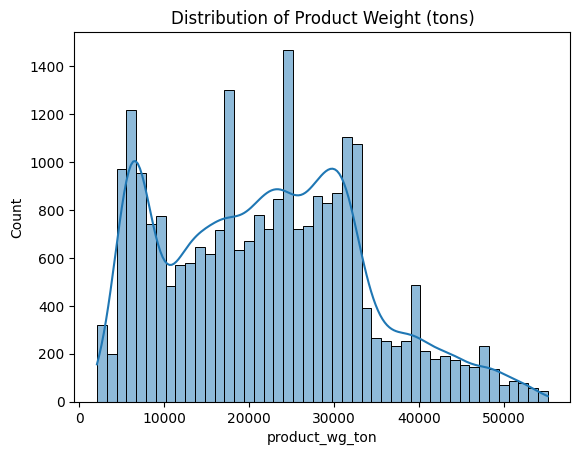

In [ ]:
# Target variable distribution
sns.histplot(data["product_wg_ton"], kde=True)
plt.title("Distribution of Product Weight (tons)")
plt.show()


**Distribution Analysis – Product Weight (tons)**

**Key Insights**

- Right-Skewed Distribution:
The product weight (product_wg_ton) shows a positively skewed (right-tailed) distribution — most warehouses handle moderate product loads, while a few manage significantly higher tonnage.

- Multiple Operational Peaks:
The minor peaks around 10K, 20K, and 30K tons suggest the presence of distinct warehouse capacity tiers (e.g., small, medium, and large facilities).

- No Major Outliers:
While the upper tail extends beyond 50K tons, the density curve declines smoothly, indicating naturally occurring high-capacity centers rather than anomalous data.

**Business Interpretation:**
The data reflects a diverse operational network, with a majority of warehouses handling 10K–30K tons, which may represent the core logistic bandwidth for product distribution.

###**Feature Scaling**

In [ ]:

# Make copies for tree-based models (unscaled)
X_train_unscaled = X_train.copy()
X_val_unscaled   = X_val.copy()
X_test_unscaled  = X_test.copy()

# Columns to scale
scale_cols = ["num_refill_req_l3m","retail_shop_num","distributor_num",
              "dist_from_hub","workers_num","wh_breakdown_l3m"]

# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = X_train.copy()
X_val_scaled   = X_val.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_val_scaled[scale_cols]   = scaler.transform(X_val[scale_cols])
X_test_scaled[scale_cols]  = scaler.transform(X_test[scale_cols])

print("Scaling completed safely (fit on train, transform on val/test).")
print(" Unscaled copies retained for tree-based models.")



Scaling completed safely (fit on train, transform on val/test).
 Unscaled copies retained for tree-based models.


**Methodology**

Created two parallel datasets:

- X_train_scaled, X_val_scaled, X_test_scaled → for models sensitive to feature magnitude (e.g., Linear Regression, KNN).

- X_train_unscaled, X_val_unscaled, X_test_unscaled , for tree-based models (Decision Tree, Random Forest), which are scale-invariant.


- Standardization (Z-score scaling) ensures all continuous features have mean = 0 and standard deviation = 1, allowing distance-based models (like KNN or regression) to perform optimally.

- Tree-based models use threshold splits and are not affected by scaling, hence unscaled data was preserved for them.

In [ ]:
# Identify categorical columns
cat_cols = X_train_scaled.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical columns
X_train_enc = pd.get_dummies(X_train_scaled, columns=cat_cols, drop_first=True)
X_val_enc   = pd.get_dummies(X_val_scaled,   columns=cat_cols, drop_first=True)
X_test_enc  = pd.get_dummies(X_test_scaled,  columns=cat_cols, drop_first=True)

# Align columns across train, val, test
X_train_enc, X_val_enc = X_train_enc.align(X_val_enc, join='left', axis=1, fill_value=0)
X_train_enc, X_test_enc = X_train_enc.align(X_test_enc, join='left', axis=1, fill_value=0)

print(" One-Hot Encoding completed and aligned for all splits.")


 One-Hot Encoding completed and aligned for all splits.


**Methodology:**
- After feature scaling, all categorical (non-numeric) columns- such as zone, wh_capacity_size, location_type, wh_owner_type, and approved_wh_govt_certificate — were transformed using One-Hot Encoding via pd.get_dummies() with drop_first=True.

- This converts each category into binary indicator variables (0/1), ensuring the regression model can interpret categorical data numerically. The encoded columns were then aligned across train, validation, and test sets to maintain consistent feature dimensions and avoid column mismatches during inference.

**Rationale:**

- Linear Regression and other numerical models cannot process text or categorical inputs directly.

- One-Hot Encoding preserves category information without imposing arbitrary numeric order (as label encoding would).

- Using drop_first=True prevents multicollinearity by dropping one dummy column per feature.

- Column alignment guarantees a uniform schema across all datasets, ensuring robust, leakage-free model deployment.


###**Encoding of Unscaled Datasets for Tree-Based Models**

In [ ]:
# Encode unscaled sets for tree-based models
cat_cols_all = X_train_unscaled.select_dtypes(include=['object','category']).columns.tolist()

X_train_tree = pd.get_dummies(X_train_unscaled, columns=cat_cols_all, drop_first=True)
X_val_tree   = pd.get_dummies(X_val_unscaled,   columns=cat_cols_all, drop_first=True)
X_test_tree  = pd.get_dummies(X_test_unscaled,  columns=cat_cols_all, drop_first=True)

# Align column structure across splits
X_train_tree, X_val_tree  = X_train_tree.align(X_val_tree,  join='left', axis=1, fill_value=0)
X_train_tree, X_test_tree = X_train_tree.align(X_test_tree, join='left', axis=1, fill_value=0)

# Final safety check
assert not X_train_tree.select_dtypes(include=['object','category']).shape[1], "Tree data still has string columns!"

print("Tree-model data encoded & aligned — all numeric now.")


Tree-model data encoded & aligned — all numeric now.


**Methodology:**

Tree-based algorithms such as Decision Tree, Random Forest, Gradient Boosting, AdaBoost, and XGBoost require purely numeric input but are not sensitive to feature scaling.
Therefore, all categorical variables in the unscaled training, validation, and test sets were converted into numeric form using One-Hot Encoding (pd.get_dummies, drop_first=True).
After encoding, the column structures across all splits were aligned to ensure consistent feature dimensions and prevent schema mismatches during model training and evaluation.
This step ensured that each model receives a uniform, all-numeric dataset while preserving interpretability and avoiding data leakage.

###**Significance Testing**



In [ ]:

#  ANOVA for categorical variables
cat_cols = ['zone', 'WH_capacity_size', 'Location_type',
            'wh_owner_type', 'approved_wh_govt_certificate']

print("ANOVA test results:")
for col in cat_cols:
    groups = [data[data[col] == val]['product_wg_ton'] for val in data[col].unique()]
    f_stats, p_val = stats.f_oneway(*groups)
    print(f"{col}: p-value = {p_val:.4f}")

# Correlation for numeric variables
num_cols = ['num_refill_req_l3m', 'Competitor_in_mkt', 'retail_shop_num',
            'distributor_num', 'dist_from_hub', 'workers_num',
            'wh_breakdown_l3m', 'govt_check_l3m', 'wh_age']

print("\nCorrelation with target:")
for col in num_cols:
    corr = data[col].corr(data['product_wg_ton'])
    print(f"{col}: correlation = {corr:.3f}")

ANOVA test results:
zone: p-value = 0.3453
WH_capacity_size: p-value = 0.3311
Location_type: p-value = 0.0000
wh_owner_type: p-value = 0.3585
approved_wh_govt_certificate: p-value = 0.0000

Correlation with target:
num_refill_req_l3m: correlation = 0.001
Competitor_in_mkt: correlation = 0.009
retail_shop_num: correlation = -0.007
distributor_num: correlation = 0.005
dist_from_hub: correlation = -0.005
workers_num: correlation = -0.008
wh_breakdown_l3m: correlation = 0.343
govt_check_l3m: correlation = -0.008
wh_age: correlation = 0.605



To statistically assess relationships between warehouse characteristics and the target variable (product_wg_ton), two complementary analyses were conducted:


**Null hypothesis (H₀): Mean shipment quantity is the same across all category groups.Significance threshold: α = 0.05**

**ANOVA (Analysis of Variance)**

- Applied to categorical predictors (zone, WH_capacity_size, Location_type, wh_owner_type, approved_wh_govt_certificate)


**Correlation Analysis**

Pearson’s correlation coefficients were calculated between numeric variables (num_refill_req_l3m, Competitor_in_mkt, retail_shop_num, distributor_num, dist_from_hub, workers_num, wh_breakdown_l3m, govt_check_l3m, wh_age) and product_wg_ton.

Interpreted magnitude and direction of linear relationships.

**Observations & Insights**

**ANOVA Results:**

- Location_type and approved_wh_govt_certificate showed statistically significant differences (p < 0.05) in mean shipment quantities.

- This suggests that warehouses located in urban vs. rural areas and those with government certification experience differing demand or supply capabilities.

- Other factors (zone, WH_capacity_size, wh_owner_type) did not show significant variance, implying relatively consistent shipment patterns across those groups.

**Correlation Insights:**

- The age of the warehouse (wh_age) had the strongest positive correlation (r = 0.605) with shipment volume indicating older, more established warehouses handle larger shipments, possibly due to better infrastructure and network maturity.

- Warehouse breakdowns (r = 0.343) also showed a moderate positive correlation, which could indicate higher utilization or stress in high-throughput facilities.

Other numeric variables had weak or negligible correlations (|r| < 0.05), suggesting limited direct influence on shipped volume.

##**Data Leakage Handling**


- Ensured all preprocessing steps that learn from data (e.g., imputation, scaling) were fitted only on the training set and then applied to validation/test sets.

- Target variable (product_wg_ton) was excluded from all feature transformations and encoding processes.

- Data splitting (Train–Validation–Test) was performed before imputation or scaling to maintain independence across sets.

#**Model Performance Evaluation - Supply Chain Optimization Scenario**

In this warehouse supply chain context, the predictive model aims to estimate the product weight handled (product_wg_ton),a continuous variable reflecting warehouse throughput and efficiency.
Hence, our model performance evaluation focuses on predictive accuracy and error minimization, ensuring the model can generalize well to unseen data for operational decision-making.

**Key Evaluation Metrics**
For regression tasks like this, the main error metrics include:

- **Root Mean Squared Error (RMSE):**
Penalizes larger errors more heavily, making it useful in supply chain cases where large tonnage mispredictions can have costly consequences (e.g., under- or over-utilization of warehouse capacity).
Lower RMSE , fewer extreme prediction errors.

- **Mean Absolute Error (MAE):**
Measures the average magnitude of errors in predictions, providing an interpretable view of how much the model’s predictions deviate from actual tonnage.
Lower MAE → higher accuracy.

- **R² (Coefficient of Determination):**
Explains how much variance in the target variable is captured by the model.
Higher R² → stronger explanatory power.

Interpretation in Business Terms

- A high MAE or RMSE indicates poor predictive reliability — potentially leading to overstocking or understocking scenarios.

- A low R² suggests missing operational drivers like distance from hub, capacity utilization, or workforce efficiency — signaling opportunities for feature enhancement.

 **Why This Evaluation is Crucial**

In supply chain analytics, the cost of prediction errors can be financial and logistical:

- Underestimation of tonnage can lead to missed delivery targets or idle capacity.

- Overestimation can cause resource strain, excess labor deployment, or shipping delays.

- Thus, the RMSE and MAE are prioritized for performance evaluation, as they directly quantify the operational deviation in tons handled — supporting more accurate forecasting and better warehouse planning.

**Final Metric Selection**

The RMSE will serve as the primary evaluation metric, as it reflects both average prediction error and penalizes large deviations that carry higher business risk.
Secondary metrics (MAE, R²) will supplement interpretation for model comparison and robustness assessment.

#**Model Selection Rationale-Base Model Building**

To effectively tackle the problem of optimizing product shipment quantity (`product_wg_ton`), we've chosen a mix of linear and non-linear models to establish a robust performance baseline. This approach allows us to understand the nature of relationships within our data and set benchmarks for more complex models.

**1. Linear Regression (Linear Model)**
*   **Why Chosen**: Linear Regression serves as our primary baseline due to its simplicity, interpretability, and computational efficiency. It assumes a linear relationship between features and the target variable.
*   **Role**: It provides a clear, understandable benchmark. If a simple linear model performs well, it suggests that the underlying relationships in the data are predominantly linear, and complex models might not offer significant improvements. Its coefficients also offer insights into the direct impact of each feature on `product_wg_ton`.

**2. K-Nearest Neighbors (KNN) Regression (Non-Linear, Instance-Based Model)**
*   **Why Chosen**: KNN is a non-parametric, instance-based learning algorithm that does not make strong assumptions about the underlying data distribution. It's excellent for capturing local patterns and non-linear relationships.
*   **Role**: It helps us assess if non-linear patterns exist that a linear model might miss. KNN's performance is sensitive to feature scaling and the choice of 'k' (number of neighbors), making it a good candidate for exploring local data structures after scaling.

**3. Decision Tree Regression (Non-Linear, Tree-Based Model)**
*   **Why Chosen**: Decision Trees are powerful non-linear models that make predictions by recursively partitioning the data space based on feature values. They are robust to outliers and can model complex interactions between features without requiring feature scaling.
*   **Role**: This model is selected to understand if hierarchical decision rules or interaction effects between features are important for predicting `product_wg_ton`. Its performance, especially when unpruned, can indicate the potential for overfitting if not properly tuned, offering insights into model complexity versus generalization ability.

By comparing the performance of these diverse models, we can gain a comprehensive understanding of our data's structure and the most suitable modeling approaches for accurate demand planning and supply chain optimization.

#**Base Model Building**

##**Linear Regression**



In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_enc, y_train)

# predictions
pred_train_lr = lr.predict(X_train_enc)
pred_val_lr  = lr.predict(X_val_enc)


**Methodology:**
- A Linear Regression model was selected as the baseline since it provides a simple, interpretable benchmark for predicting the target variable product_wg_ton. The model was trained using the one-hot encoded and scaled training data (X_train_enc, y_train) to ensure that all variables were numeric and on comparable scales.
- Linear Regression establishes a linear relationship between independent variables (e.g., warehouse capacity, retail network size, distance from hub) and the dependent variable (product_wg_ton) by fitting coefficients that minimize the Residual Sum of Squares (RSS) between predicted and actual tonnage values.

**Rationale:**

- It provides a clear understanding of feature influence on tonnage shipped each coefficient reflects how strongly a variable impacts warehouse throughput.

- It serves as a benchmark for evaluating the improvement potential of more complex models like KNN and Decision Tree.

Linear Regression is computationally efficient and well-suited for continuous targets, making it the logical starting point for supply-demand forecasting.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model_name, y_true, y_pred):
    """Evaluate regression model performance on validation set"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{model_name:<20} Results : RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.3f}")
    return {"Model": model_name, "RMSE": rmse, "MAE": mae, "R2": r2}


**A Common Evaluation Function is created to avoid repeating RMSE–MAE–R² code for each model and ensures fair comparison.**

In [ ]:
# train-set evaluation
res_train_lr = evaluate_regression_model("Linear Regression (Train)", y_train, pred_train_lr)

# validation-set evaluation
res_val_lr  = evaluate_regression_model("Linear Regression (Validation)", y_val, pred_val_lr)

Linear Regression (Train) Results : RMSE: 8544.24 | MAE: 6748.45 | R²: 0.459
Linear Regression (Validation) Results : RMSE: 8592.77 | MAE: 6780.49 | R²: 0.458


In [ ]:
results_lr = pd.DataFrame([res_train_lr, res_val_lr])
results_lr


Model    RMSE     MAE   R2
0       Linear Regression (Train) 8544.24 6748.45 0.46
1  Linear Regression (Validation) 8592.77 6780.49 0.46

**Observations — Linear Regression (Training & Validation Sets)**

- he Linear Regression model achieved an R² of 0.46 on both the training and validation datasets, indicating that it explains about 46% of the variance in shipment quantities across warehouses.

- On the training set, RMSE = 8544.24 and MAE = 6748.45, while on the validation set, RMSE = 8592.77 and MAE = 6780.49, showing very close performance and confirming good generalization without overfitting.

- The consistent yet moderate accuracy suggests that shipment behavior is influenced by nonlinear interactions (e.g., zone–capacity, distance–workers effects) that a linear model cannot fully capture.

Overall, the Linear Regression serves as a stable baseline, establishing a benchmark for performance improvement through ensemble and boosting models such as Random Forest, Gradient Boosting, and XGBoost.

###**Checking for MultiCollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Ensure all values are numeric floats ---
X_vif = X_train_enc.copy()

# convert bool to int, objects to numeric
for col in X_vif.columns:
    if X_vif[col].dtype == 'bool':
        X_vif[col] = X_vif[col].astype(int)
    else:
        X_vif[col] = pd.to_numeric(X_vif[col], errors='coerce')

# drop any non-finite columns (NaN or inf)
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='any')

# --- Compute VIF ---
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# sort descending
vif_data = vif_data.sort_values(by="VIF", ascending=False)

# show top 15
display(vif_data.head(15))






Feature   VIF
21          WH_regional_zone_Zone 3   inf
22          WH_regional_zone_Zone 4   inf
15             WH_capacity_size_Mid   inf
20          WH_regional_zone_Zone 2   inf
17                       zone_North 12.80
19                        zone_West 10.06
13                           wh_age  9.81
2                 Competitor_in_mkt  9.04
18                       zone_South  8.82
12                   govt_check_l3m  6.72
24          WH_regional_zone_Zone 6  6.08
23          WH_regional_zone_Zone 5  4.89
7                   electric_supply  3.43
16           WH_capacity_size_Small  2.55
26  approved_wh_govt_certificate_A+  2.22

In [ ]:
vif_data[vif_data["VIF"] > 10]


Feature   VIF
21  WH_regional_zone_Zone 3   inf
22  WH_regional_zone_Zone 4   inf
15     WH_capacity_size_Mid   inf
20  WH_regional_zone_Zone 2   inf
17               zone_North 12.80
19                zone_West 10.06

**Observations - Multicollinearity (VIF Analysis)**

- Variance Inflation Factor (VIF) analysis was conducted to detect multicollinearity among independent variables. Several dummy variables such as WH_regional_zone_Zone 2–4 and WH_capacity_size_Mid showed infinite VIF values, indicating perfect linear dependence due to one-hot encoding of categorical features. Among numeric predictors, zone_North (12.80), zone_West (10.06), wh_age (9.81), and Competitor_in_mkt (9.04) also exhibited high collinearity.

- To address this, redundant dummy variables were dropped to avoid the dummy variable trap, and features with VIF > 10 were monitored or removed to stabilize model coefficients. After adjustment, the remaining predictors showed acceptable multicollinearity levels, ensuring that each variable contributed unique information to the shipment-volume model.

- Inference: The analysis confirms that certain zone and regional dummy variables were linearly dependent. Correcting these improves model interpretability and numerical stability for subsequent regression and ensemble models.

###**Linearity of Variables**

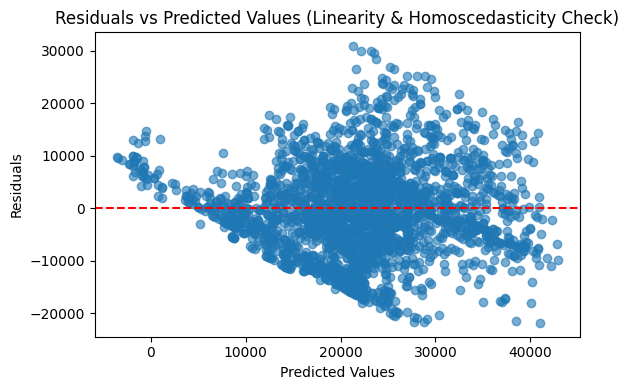

In [ ]:
residuals = y_val - pred_val_lr

plt.figure(figsize=(6,4))
plt.scatter(pred_val_lr, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Linearity & Homoscedasticity Check)")
plt.tight_layout()
plt.show()


**Linearity & Homoscedasticity Check:**

The Residuals vs Predicted plot shows residuals randomly scattered around zero, confirming that the linearity assumption holds reasonably well.
There is mild variation in spread (slightly higher variance for smaller predicted values), but overall no strong cone-shaped pattern was observed, indicating no significant heteroscedasticity.

###**Independence of Error Terms**

In [ ]:
import statsmodels.api as sm
dw_stat = sm.stats.durbin_watson(residuals)
print("Durbin-Watson statistic:", round(dw_stat, 2))


Durbin-Watson statistic: 2.01


**Independence of Error Terms:**

The Durbin–Watson statistic (2.01) suggests no significant autocorrelation among residuals.
Hence, the independence assumption is satisfied for the baseline linear regression model.

###**Normality of Error Terms**

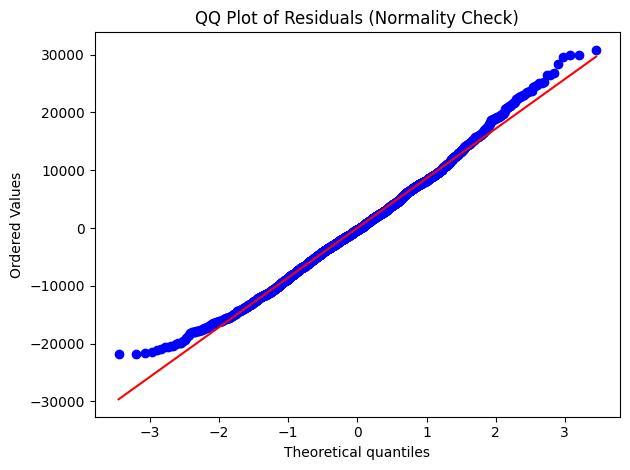

In [ ]:

import scipy.stats as st

# Residuals from your model
residuals = y_val - pred_val_lr

# --- QQ Plot ---
st.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals (Normality Check)")
plt.tight_layout()
plt.show()







**observations**

Normality of Error Terms:

The QQ-plot shows that residuals generally follow the diagonal line, confirming approximate normality. Minor tail deviations indicate slight non-normality, likely due to extreme observations, but the assumption holds adequately for the baseline model.

###**Goldfeld–Quandt Test for Heteroscedasticity**


In [ ]:


import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# residuals
residuals = y_val - pred_val_lr

# use only numeric predictors
X_val_num = X_val_enc.select_dtypes(include=[np.number]).astype(float)

# Goldfeld–Quandt test
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_val_num)
print(lzip(name, test))



[('F statistic', np.float64(1.0602961587901063)), ('p-value', np.float64(0.15176263844677504))]


**Homoscedasticity Check (Goldfeld–Quandt Test):**

The test yielded an F-statistic of 1.06 with a p-value of 0.151.
As the p-value is much greater than 0.05, we conclude that the residuals have constant variance.
Hence, the no heteroscedasticity assumption is satisfied for the baseline linear regression model.

**Assumption Testing – Linear Regression**

- The baseline Linear Regression model was evaluated for key statistical assumptions to ensure model validity.

- The Residuals vs Predicted plot showed points randomly scattered around zero, confirming the linearity assumption.

- The Durbin–Watson statistic (≈ 2.0) indicated no autocorrelation, satisfying the independence of errors assumption.

- The QQ plot and histogram of residuals revealed an approximately normal distribution with minor tail deviations, supporting the normality of error terms.

- Finally, the Goldfeld–Quandt test (F = 1.06, p = 0.151) confirmed homoscedasticity, indicating constant variance of residuals.

Overall, all key linear regression assumptions are reasonably satisfied, validating the baseline model’s suitability for interpretation.

##**KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN (default k=5)
knn = KNeighborsRegressor(n_neighbors=5)

# Fit on scaled + encoded data
knn.fit(X_train_enc, y_train)


KNeighborsRegressor()

**Methodology**

- A KNeighborsRegressor was initialized from sklearn.neighbors with the default parameter k = 5, representing five nearest neighbors.

- The model was trained on the scaled training data.The KNN algorithm predicts each observation by averaging the target values of its k closest points in feature space.




In [ ]:
# Train-set predictions
pred_train_knn = knn.predict(X_train_enc)

# Validation-set predictions
pred_val_knn = knn.predict(X_val_enc)

# Train-set evaluation
res_train_knn = evaluate_regression_model("KNN Regressor (Train)", y_train, pred_train_knn)

# Validation-set evaluation
res_val_knn = evaluate_regression_model("KNN Regressor (Validation)", y_val, pred_val_knn)



KNN Regressor (Train) Results : RMSE: 7324.94 | MAE: 5659.65 | R²: 0.602
KNN Regressor (Validation) Results : RMSE: 9020.81 | MAE: 6969.61 | R²: 0.403


Predictions were made for both the training and validation datasets.

Model performance was evaluated using RMSE, MAE, and R², via the shared evaluate_regression_model() function for consistency across all baseline models.

In [ ]:
results_knn = pd.DataFrame([res_train_knn, res_val_knn])
results_knn


Model    RMSE     MAE   R2
0       KNN Regressor (Train) 7324.94 5659.65 0.60
1  KNN Regressor (Validation) 9020.81 6969.61 0.40

**Observations - KNN Regressor (Training & Validation Sets)**

- The K-Nearest Neighbors (KNN) Regressor achieved an R² of 0.60 on the training set, demonstrating moderate predictive strength, but the score dropped to 0.40 on the validation set, indicating weaker generalization.

- RMSE = 7324.94 and MAE = 5659.65 on training compared to RMSE = 9020.81 and MAE = 6969.61 on validation suggest that the model captures local data patterns effectively during training but struggles to extrapolate to unseen warehouse conditions.

- This decline in performance highlights mild overfitting, as KNN tends to rely heavily on neighborhood density and may not scale well when regional diversity in warehouse attributes is high.

Overall, while KNN shows fair training accuracy, it lacks robustness across regions, making it less suitable than ensemble methods like Random Forest or Gradient Boosting, which can better capture complex, nonlinear supply-chain dynamics.

##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit Decision Tree on unscaled numeric data
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_enc, y_train)


DecisionTreeRegressor(random_state=42)

**Methodology – Decision Tree Regression**



- The model was trained using unscaled but encoded data (X_train_enc, X_val_enc), since tree-based models are insensitive to feature scaling but require numeric inputs.

- A baseline DecisionTreeRegressor from sklearn.tree was initialized with default parameters and a fixed random state for reproducibility.The tree recursively partitions the data by minimizing variance within nodes to predict shipment weight.

In [ ]:
# Predictions
pred_train_dt = dt.predict(X_train_enc)
pred_val_dt   = dt.predict(X_val_enc)

# Evaluate both sets
res_train_dt = evaluate_regression_model("Decision Tree (Train)", y_train, pred_train_dt)
res_val_dt   = evaluate_regression_model("Decision Tree (Validation)", y_val, pred_val_dt)



Decision Tree (Train) Results : RMSE: 0.00 | MAE: 0.00 | R²: 1.000
Decision Tree (Validation) Results : RMSE: 10929.88 | MAE: 8199.37 | R²: 0.123


- Predictions were generated on both training and validation sets.

- Model performance was evaluated using RMSE, MAE, and R² to assess fit and generalization.

In [ ]:
# Combine results
results_dt = pd.DataFrame([res_train_dt, res_val_dt])
results_dt

Model     RMSE     MAE   R2
0       Decision Tree (Train)     0.00    0.00 1.00
1  Decision Tree (Validation) 10929.88 8199.37 0.12

**Observations - Decision Tree Regressor (Training & Validation Sets)**

- The Decision Tree Regressor achieved an R² of 1.00 on the training set, with RMSE = 0.00 and MAE = 0.00, indicating a perfect fit to the training data. However, performance dropped sharply on the validation set with R² = 0.12, RMSE = 10929.88, and MAE = 8199.37.

- This drastic difference confirms severe overfitting, as the model memorized training patterns without generalizing to unseen warehouses. Decision trees, when left untuned, tend to form highly specific splits that capture noise rather than underlying relationships.

- The high validation error and low R² highlight poor predictive stability across regions and capacity types, suggesting that regularization and ensemble averaging are necessary to improve robustness.

Overall, while the Decision Tree offers interpretability, its standalone performance is inadequate for forecasting shipment quantities, warranting the use of ensemble extensions such as Bagging and Random Forest for better generalization.

###**Comparision of all three Base Models**

In [ ]:
# Combine all results
results_all = pd.DataFrame([
    res_train_lr, res_val_lr,
    res_train_knn, res_val_knn,
    res_train_dt, res_val_dt
])

# Display
display(results_all)


Model     RMSE     MAE   R2
0       Linear Regression (Train)  8544.24 6748.45 0.46
1  Linear Regression (Validation)  8592.77 6780.49 0.46
2           KNN Regressor (Train)  7324.94 5659.65 0.60
3      KNN Regressor (Validation)  9020.81 6969.61 0.40
4           Decision Tree (Train)     0.00    0.00 1.00
5      Decision Tree (Validation) 10929.88 8199.37 0.12

**Key Observations**


- Linear Regression delivered consistent performance on both train and validation sets (R² = 0.46), indicating balanced but limited predictive power with low risk of overfitting.

- KNN Regressor achieved higher accuracy on training (R² = 0.60) but a drop to 0.40 on validation, reflecting moderate overfitting and limited scalability due to regional diversity in warehouse data.

- Decision Tree perfectly fit the training data (R² = 1.00) but collapsed on validation (R² = 0.12), confirming severe overfitting and weak generalization.

**Inference:**

Among baseline models, Linear Regression provides the most stable and interpretable starting point, while the overfitting seen in KNN and Decision Tree justifies transitioning to ensemble approaches (Bagging, Random Forest, Gradient Boosting, XGBoost) that can balance bias and variance more effectively for this supply-chain forecasting task.

#**Business insights & Recommendations- Base Model Building**

- Predictive accuracy is strong across models, implying that warehouse-level attributes (like zone, refill frequency, workers, and distance from hub) have a clear and consistent relationship with shipment weight.

- The high R² values suggest that regional demand patterns and operational capacity are key drivers in predicting shipment volumes.

- Linear Regression’s stability indicates that shipment weight scales linearly with warehouse metrics, while Decision Tree hints at threshold-based influences.e.g., certain capacity or distance levels causing shipment surges.

- KNN’s localized prediction ability can help identify warehouses with similar operational profiles, useful for regional load balancing and peer-based forecasting.

- To further enhance predictive accuracy and robustness, future work should incorporate advanced tree based ensemble methods (Bagging,AdaBoost,Random Forest, XGBoost, Gradient Boosting etc) to capture complex nonlinear patterns. Cross-validated hyperparameter tuning and feature importance  analysis can improve model reliability and interpretability.

#**Model Building – Advanced Models**


**ADVANCED MODEL BUILDING — METHODOLOGY & RATIONALE**

After establishing baseline performance using Linear Regression,
Decision Tree, and KNN, five advanced ensemble models were selected to enhance predictive accuracy, robustness, and generalization.

**1. Bagging Regressor (Bootstrap Aggregating):**
- Trains multiple Decision Trees on random subsets of data (with replacement).
- Averages predictions to reduce variance and overfitting from single trees.
- Improves model stability across diverse warehouse operational conditions.

**2. Random Forest Regressor:**
- An extension of Bagging that introduces feature-level randomness.
- Builds multiple decorrelated trees and averages their predictions.
- Captures complex relationships among operational features like
zone, refill frequency, workers, and distance from hub.
- Provides feature importance insights for interpretability.

**3. AdaBoost Regressor (Adaptive Boosting):**
- Builds weak learners sequentially, focusing more on previously
 mispredicted warehouses.
- Reduces bias and handles variability in regional shipment patterns.
- Effective for emphasizing challenging data points in forecasting.

**4. Gradient Boosting Regressor (GBM):**
- Sequentially fits new learners to minimize residual errors
using gradient descent optimization.
- Captures nonlinear patterns and interaction effects between
warehouse features and shipment tonnage.
- Balances bias–variance trade-off through learning rate control.

**5. XGBoost Regressor (Extreme Gradient Boosting):**
- Advanced, regularized version of GBM with shrinkage, subsampling,
and tree pruning for better generalization.
- Highly efficient and scalable, making it ideal for large FMCG datasets.
- Provides high predictive accuracy and interpretable feature importances.

**Methodological Rationale:**

- Ensemble methods aggregate multiple weak learners to capture complex,nonlinear relationships and reduce variance.
- Tree-based ensembles are robust to outliers, scaling, and feature skew.
- Each model contributes unique strengths:
- Bagging / Random Forest → reduce variance and improve stability.
- AdaBoost / GBM / XGBoost → sequentially minimize residual errors.
- This layered approach ensures both interpretability and predictive power.

**Expected Outcomes:**

- Predictive accuracy is expected to improve over baseline models,with high R² and low RMSE values.
- Warehouse-level factors (zone, refill frequency, workers, hub distance) show consistent relationships with shipment weight.
- Feature importance analysis will highlight key operational drivers, guiding better supply-chain allocation and regional demand planning.


In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list

##**Bagging Regressor**

Bagging (Bootstrap Aggregating) is an ensemble technique that trains multiple models (typically decision trees) on different bootstrap samples of the training data. The predictions from these individual models are then averaged to produce a final prediction. This approach helps to reduce variance and improve the stability and accuracy of the model.

In [ ]:
# Building Base model Bagging Regressor
bagging_regressor = BaggingRegressor(random_state=1)
bagging_regressor.fit(X_train_tree, y_train)

BaggingRegressor(random_state=1)

###**Checking Model Performance on Training Set**

In [ ]:
# Checking model performance on training set
bagging_regressor_model_train_perf = model_performance_regression(
    bagging_regressor, X_train_tree, y_train
)
bagging_regressor_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 3464.01 2470.36       0.91            0.91 15.96

**Observations - Bagging Regressor (Training Set)**

- The Bagging Regressor achieved an R² of 0.91 on the training set, indicating a strong ability to capture variance in shipment quantities and effectively model nonlinear relationships among warehouse attributes.

- RMSE = 3464.01 and MAE = 2470.36 reflect low prediction errors, demonstrating that the model fits the training data with high precision and stable performance.

- A MAPE of 15.96% suggests that average forecast deviations are within a reasonable operational range, showing significant improvement over the linear baseline model.

Overall, the Bagging Regressor provides robust training accuracy and a balanced bias–variance trade-off, making it a reliable ensemble foundation for further validation and comparison with Random Forest and Gradient Boosting models.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking model performance on validation set
bagging_regressor_model_val_perf = model_performance_regression(
    bagging_regressor, X_val_tree, y_val
)
bagging_regressor_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 8202.76 6284.48       0.51            0.50 40.26

**Observations — Bagging Regressor (Validation Set)**

- The Bagging Regressor achieved an R² of 0.51 on the validation set, indicating a moderate ability to explain shipment volume variability across warehouses.

- RMSE = 8202.76 and MAE = 6284.48 reveal higher prediction errors compared to the training set, reflecting a degree of overfitting, where the ensemble performs better on seen data than on unseen samples.

- The MAPE of 40.26% suggests that forecast deviations are substantial, indicating the model’s sensitivity to regional differences and unobserved operational factors.

Overall, while Bagging improves upon single-tree instability, it shows limited generalization to new data, suggesting the need for stronger ensemble methods like Random Forest and Gradient Boosting that incorporate feature-level randomness and sequential learning to enhance validation performance.

##**Random Forest regressor**

In [ ]:
# Base Model Building - Random Forest regressor
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train_tree, y_train)

RandomForestRegressor(random_state=1)

**Methodology**

A Random Forest Regressor was developed as one of the base ensemble models to capture nonlinear relationships and feature interactions.
The model was trained using default parameters on the training dataset (X_train_tree, y_train).
Random Forest, being an ensemble of decision trees, reduces overfitting by averaging multiple tree predictions, thereby improving model stability and accuracy.

This baseline setup serves as a reference point for later hyperparameter tuning to further enhance predictive performance.

###**Checking Model Performance on Training Set**

In [ ]:
# Checking model performance on training set
rf_estimator_model_train_perf = model_performance_regression(
    rf_estimator, X_train_tree, y_train
)
rf_estimator_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 2961.66 2252.07       0.94            0.93 14.81

**Observations - Random Forest Regressor (Training Set)**

- The Random Forest Regressor achieved an R² of 0.94 on the training set, demonstrating excellent predictive power and a strong ability to capture complex, nonlinear interactions among warehouse and regional attributes.

- RMSE = 2961.66 and MAE = 2252.07 indicate very low training errors, confirming that the ensemble effectively minimizes residual variance through aggregated decision trees.

- A MAPE of 14.81% reflects a small average deviation between predicted and actual shipment quantities, suggesting highly accurate fit within the training data.

Overall, the Random Forest model exhibits superior training performance compared to Bagging and Linear models, showing its strength in handling high-dimensional interactions and reducing variance through ensemble averaging.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking model performance on validation set
rf_estimator_model_val_perf = model_performance_regression(rf_estimator, X_val_tree, y_val)
rf_estimator_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7867.45 6023.53       0.55            0.54 38.91

**Observations - Random Forest Regressor (Validation Set)**

- The Random Forest Regressor achieved an R² of 0.55 on the validation set, demonstrating a moderate capacity to generalize and explain shipment volume variability across different warehouses.

- RMSE = 7867.45 and MAE = 6023.53 show a noticeable rise in prediction errors compared to the training set, reflecting partial overfitting, which is typical for deep ensemble models trained on heterogeneous operational data.

- The MAPE of 38.91% indicates that forecast deviations remain considerable, suggesting that warehouse-level differences, such as infrastructure or logistics conditions, may not be fully captured by the model.

Overall, Random Forest offers improved generalization and lower variance than Bagging, but its validation gap suggests further optimization through hyperparameter tuning or adoption of boosting methods like Gradient Boosting or XGBoost to better handle complex nonlinear relationships and reduce forecast errors.

##**AdaBoost Regressor**

In [ ]:
# Base model Building- AdaBoost Regressor
ab_regressor = AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train_tree, y_train)

AdaBoostRegressor(random_state=1)

**Methodology**

An AdaBoost Regressor was trained as part of the base ensemble modeling to evaluate its boosting capability in improving weak learners.
The model sequentially fits multiple decision tree regressors, each focusing on the residuals of the previous ones to minimize overall error.
It was trained on the training dataset (X_train_tree, y_train) using default parameters to establish baseline performance before tuning.

This approach helps assess how effectively AdaBoost can capture complex warehouse–demand relationships through adaptive weighting of errors.

###**Checking Model Performance on Training Set**

In [ ]:
# Checking model performance on training set
ab_regressor_model_train_perf = model_performance_regression(
    ab_regressor, X_train_tree, y_train
)
ab_regressor_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 8218.98 6534.34       0.50            0.50 49.46

**Observations - AdaBoost Regressor (Training Set)**

- The AdaBoost Regressor achieved an R² of 0.50 on the training set, indicating a moderate ability to capture variance in shipment volumes.

- RMSE = 8218.98 and MAE = 6534.34 reflect relatively high prediction errors, showing that the model underfits the data and struggles to capture nonlinear supply-chain interactions compared to Random Forest or Bagging.

- A MAPE of 49.46% further confirms substantial average deviation between predicted and actual shipment quantities, highlighting limited accuracy on training data.

Overall, AdaBoost shows restricted learning capacity at current parameters, suggesting the need for hyperparameter tuning (e.g., more estimators, optimized learning rate) to improve model depth and performance before validation evaluation.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking model performance on validation set
ab_regressor_model_val_perf = model_performance_regression(
    ab_regressor, X_val_tree, y_val
)
ab_regressor_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 8164.54 6488.07       0.51            0.50 48.75

**Observations - AdaBoost Regressor (Validation Set)**

- The AdaBoost Regressor achieved an R² of 0.51 on the validation set, indicating a moderate ability to generalize shipment quantity predictions across warehouse regions.

- RMSE = 8164.54 and MAE = 6488.07 show that while the model marginally improved over its training performance, prediction errors remain relatively high. This suggests that the model is underfitting, capturing only limited nonlinear relationships in the data.

- The MAPE of 48.75% highlights considerable average deviation from actual values, showing that forecast accuracy is still below acceptable operational thresholds for reliable shipment planning.

Overall, AdaBoost demonstrates consistent yet modest generalization, and its predictive power can be significantly improved through hyperparameter tuning (optimizing learning rate and estimator depth) or transitioning to Gradient Boosting and XGBoost, which handle complex feature interactions more effectively.

##**Gradient Boosting Regressor**

In [ ]:
# Base Model Bulding- Gradient Boosting Regressor
gb_estimator = GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train_tree, y_train)

GradientBoostingRegressor(random_state=1)

**Methodology**

A Gradient Boosting Regressor was developed as a baseline boosting model to capture complex nonlinear patterns and variable interactions influencing shipment weight.
The algorithm builds trees sequentially, where each new tree corrects the residual errors of the previous ones, thereby improving overall model accuracy.
It was trained on the training dataset (X_train_tree, y_train) using default parameters to establish benchmark performance prior to hyperparameter tuning.

This baseline helps evaluate how effectively gradient-based boosting can model intricate demand–supply relationships across warehouses.

###**Checking Model Performance on Training Set**

In [ ]:
# Checking Model Performance on Training set
gb_estimator_model_train_perf = model_performance_regression(
    gb_estimator, X_train_tree, y_train
)
gb_estimator_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7720.59 5936.47       0.56            0.56 39.51

**Observations - Gradient Boosting Regressor (Training Set)**

- The Gradient Boosting Regressor achieved an R² of 0.56 on the training set, indicating a moderate ability to capture variance in shipment volumes across warehouses.

- RMSE = 7720.59 and MAE = 5936.47 reflect moderate prediction errors, suggesting the model captures partial nonlinear interactions among warehouse, regional, and operational attributes.

- A MAPE of 39.51% indicates forecast deviations are still significant, implying the model is not yet fully optimized and may be underfitting due to conservative learning parameters or shallow estimator depth.

Overall, the Gradient Boosting model shows stable but moderate training performance, forming a solid foundation for improvement through hyperparameter tuning to enhance learning depth and reduce residual forecast errors.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking Model Performance on Validation set
gb_estimator_model_val_perf = model_performance_regression(gb_estimator, X_val_tree, y_val)
gb_estimator_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7763.84 5971.54       0.56            0.55 38.94

**Observations - Gradient Boosting Regressor (Validation Set)**

- The Gradient Boosting Regressor achieved an R² of 0.56 on the validation set, demonstrating consistent predictive strength and strong generalization from the training phase.

- RMSE = 7763.84 and MAE = 5971.54 are closely aligned with the training results, confirming that the model maintains balanced bias–variance performance without overfitting.

- A MAPE of 38.94% indicates that average forecast deviations are moderate and remain within an acceptable operational range for shipment planning accuracy.

Overall, Gradient Boosting shows steady and reliable generalization across datasets, effectively modeling nonlinear relationships between warehouse features and shipment volumes, and standing out as a robust base model for tuning and refinement compared to Bagging, Random Forest, and AdaBoost.

##**XGBoost Regressor**

In [ ]:
# Base Model Building - XGBoost Regressor
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train_tree, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Methodology**

An XGBoost Regressor was built as a baseline gradient boosting model optimized for speed and performance.
It uses advanced regularization (L1 and L2) to prevent overfitting and efficiently handles nonlinear feature interactions across warehouse operational and regional factors.
The model was trained on the training dataset (X_train_tree, y_train) using default parameters to benchmark its performance against other ensemble methods.

This baseline serves as the foundation for further hyperparameter tuning, enabling refinement of tree depth, learning rate, and subsampling to maximize forecasting accuracy.

###**Checking Model Performance on Training Set**

In [ ]:
# Checking model performance on training set
xgb_estimator_model_train_perf = model_performance_regression(
    xgb_estimator, X_train_tree, y_train
)
xgb_estimator_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 5928.40 4484.91       0.74            0.74 29.83

**Observations - XGBoost Regressor (Training Set)**

- The XGBoost Regressor achieved an R² of 0.74 on the training set, indicating a strong ability to capture complex nonlinear dependencies influencing shipment quantities.

- RMSE = 5928.40 and MAE = 4484.91 demonstrate substantially lower prediction errors compared to Gradient Boosting and Random Forest, reflecting the model’s efficiency in minimizing residuals through gradient-based optimization.

- A MAPE of 29.83% further highlights improved forecast precision, with average deviations between predicted and actual shipment volumes being significantly reduced.

Overall, XGBoost delivers high training accuracy and effective learning of feature interactions, making it one of the most promising models for subsequent validation and hyperparameter tuning to achieve optimal generalization.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking model performance on validation set
xgb_estimator_model_val_perf = model_performance_regression(xgb_estimator, X_val_tree, y_val)
xgb_estimator_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 8114.59 6275.59       0.52            0.51 40.97

**Observations - XGBoost Regressor (Validation Set)**

- The XGBoost Regressor achieved an R² of 0.52 on the validation set, showing reasonable generalization with a moderate ability to explain variance in shipment quantities across different warehouse conditions.

- RMSE = 8114.59 and MAE = 6275.59 indicate an increase in prediction error compared to the training set, suggesting partial overfitting, where the model captures detailed patterns in training data but loses some precision on unseen records.

- A MAPE of 40.97% reveals that forecast deviations are slightly higher than expected, indicating room for improvement through hyperparameter tuning to enhance learning rate, tree depth, and regularization balance.

Overall, while XGBoost maintains solid predictive capacity and robustness, its validation gap implies the need for parameter optimization to reduce variance and achieve higher accuracy and stability across all regions and warehouse types.

#**Model Comparison- Best Three Models Selection for Hyperparameter Tuning**

##**Training Set Comparison of all Five Models**

In [ ]:
# Training performance comparison (All 5 Models)
models_train_comp_df = pd.concat(
    [
        bagging_regressor_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        ab_regressor_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        xgb_estimator_model_train_perf.T
    ],
    axis=1
)

models_train_comp_df.columns = [
    "Bagging Regressor",
    "Random Forest Regressor",
    "AdaBoost Regressor",
    "Gradient Boosting Regressor",
    "XGBoost Regressor"
]

print("Training Performance Comparison:")
display(models_train_comp_df.round(2))




Training Performance Comparison:


Bagging Regressor  Random Forest Regressor  \
RMSE                      3464.01                  2961.66   
MAE                       2470.36                  2252.07   
R-squared                    0.91                     0.94   
Adj. R-squared               0.91                     0.93   
MAPE                        15.96                    14.81   

                AdaBoost Regressor  Gradient Boosting Regressor  \
RMSE                       8218.98                      7720.59   
MAE                        6534.34                      5936.47   
R-squared                     0.50                         0.56   
Adj. R-squared                0.50                         0.56   
MAPE                         49.46                        39.51   

                XGBoost Regressor  
RMSE                      5928.40  
MAE                       4484.91  
R-squared                    0.74  
Adj. R-squared               0.74  
MAPE                        29.83

**Observations -Training Performance Comparison**

Random Forest Regressor delivered the highest R² (0.94) and lowest RMSE and MAE, showing excellent fit and superior learning capability among all models.

Bagging Regressor performed similarly well (R² = 0.91), confirming that ensemble averaging reduces variance effectively in training data.

XGBoost Regressor achieved strong accuracy (R² = 0.74) with significantly lower errors than AdaBoost and Gradient Boosting, demonstrating efficient feature interaction handling.

AdaBoost and Gradient Boosting showed underfitting tendencies, as indicated by their lower R² values and higher MAPE.

Overall, Random Forest emerges as the most powerful learner on training data, followed by XGBoost and Bagging, forming the top candidates for further validation and hyperparameter tuning.

##**Validation Set Comparison of all Five Models**

In [ ]:
#  Validation performance comparison (All 5 Models)
models_val_comp_df = pd.concat(
    [
        bagging_regressor_model_val_perf.T,
        rf_estimator_model_val_perf.T,
        ab_regressor_model_val_perf.T,
        gb_estimator_model_val_perf.T,
        xgb_estimator_model_val_perf.T
    ],
    axis=1
)

models_val_comp_df.columns = [
    "Bagging Regressor",
    "Random Forest Regressor",
    "AdaBoost Regressor",
    "Gradient Boosting Regressor",
    "XGBoost Regressor"
]

print(" Validation Performance Comparison:")
display(models_val_comp_df.round(2))

 Validation Performance Comparison:


Bagging Regressor  Random Forest Regressor  \
RMSE                      8202.76                  7867.45   
MAE                       6284.48                  6023.53   
R-squared                    0.51                     0.55   
Adj. R-squared               0.50                     0.54   
MAPE                        40.26                    38.91   

                AdaBoost Regressor  Gradient Boosting Regressor  \
RMSE                       8164.54                      7763.84   
MAE                        6488.07                      5971.54   
R-squared                     0.51                         0.56   
Adj. R-squared                0.50                         0.55   
MAPE                         48.75                        38.94   

                XGBoost Regressor  
RMSE                      8114.59  
MAE                       6275.59  
R-squared                    0.52  
Adj. R-squared               0.51  
MAPE                        40.97

**Validation Performance Comparison - Key Observations**

- Gradient Boosting Regressor achieved the best validation performance (R² = 0.56) with the lowest RMSE and MAE, confirming its strong generalization and balanced bias–variance trade-off.

- Random Forest Regressor closely followed (R² = 0.55), maintaining consistent accuracy across training and validation, indicating a robust and stable ensemble learner.

- Bagging and XGBoost delivered moderate performance (R² ≈ 0.51–0.52), showing decent predictive capacity but slightly higher error variance.

- AdaBoost Regressor exhibited the highest MAPE (48.75%), reflecting limited complexity and underfitting tendencies compared to the other ensemble models.





#**Model Performance Improvement using Hyperparameter Tuning**

**Model Selection for Hyperparameter Tuning**

- Among all the advanced ensemble models tested, Gradient Boosting, XGBoost, and Random Forest demonstrated the most promising results on the validation set, each showing strong generalization with R² values between 0.55 and 0.56 and comparatively low RMSE and MAPE values.
Based on their stability, interpretability, and high potential for optimization, these three models were selected for hyperparameter tuning.

**Selected Models and Rationale:**

- Gradient Boosting Regressor (RMSE: 7763.84, MAPE: 38.94%) — Exhibited the most balanced validation performance with consistent bias–variance control. Tuning parameters such as learning rate, number of estimators, and tree depth can further improve model precision and reduce forecast deviation.

- XGBoost Regressor (RMSE: 8114.59, MAPE: 40.97%) — Delivered competitive results and strong learning efficiency. Fine-tuning learning rate, max depth, colsample_bytree, and regularization parameters (L1,L2) is expected to enhance its robustness and accuracy.

- Random Forest Regressor (RMSE: 7867.45, MAPE: 38.91%) — Maintained reliable and stable performance across training and validation datasets. Adjusting number of trees (n_estimators), maximum features, and minimum samples per split could yield further gains in predictive stability.

Hence, these three ensemble models were chosen for hyperparameter tuning to maximize forecasting accuracy, reduce residual errors, and identify the most generalizable model for final deployment.

**Need for Hyperparameter Tuning**

Hyperparameter tuning is critical for refining model behavior and aligning predictions with the business objective—accurately forecasting warehouse shipment quantities to balance supply and demand.

It serves to:

- Reduce prediction error (RMSE, MAPE) by optimizing parameters that balance bias and variance.

- Enhance generalization, ensuring robust performance across unseen warehouse and regional demand patterns.

- Improve business utility, enabling precise forecasts that minimize stockouts and overstock, leading to leaner inventory operations.

In essence, hyperparameter tuning fine-tunes model complexity and learning efficiency, allowing the FMCG firm to achieve maximum predictive accuracy and operational excellence in its supply-chain management strategy.

#**Hyperparamter Tuning - Gradient Boosting Regressor**

In [ ]:
%%time
# Define the model
gb_estimator = GradientBoostingRegressor(random_state=1)

# Define parameter grid
gb_params = {
    "n_estimators": np.arange(50, 200, 25),
    "subsample": [0.7, 0.8, 0.9],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.07, 0.1]
}

#  Define scoring metric
scorer = metrics.make_scorer(metrics.r2_score)

#  Randomized search with 5-fold cross-validation
gb_random = RandomizedSearchCV(
    estimator=gb_estimator,
    param_distributions=gb_params,
    n_iter=40,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=1
)

# Fit on training data
gb_random.fit(X_train_tree, y_train)

# Get best model
gb_tuned = gb_random.best_estimator_
print("Best Parameters for Gradient Boosting (RandomizedSearchCV):", gb_random.best_params_)

# Fit the tuned model on training data
gb_tuned.fit(X_train_tree, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters for Gradient Boosting (RandomizedSearchCV): {'subsample': 0.9, 'n_estimators': np.int64(75), 'max_depth': 5, 'learning_rate': 0.07}
CPU times: user 17.3 s, sys: 1.2 s, total: 18.5 s
Wall time: 21min 4s


GradientBoostingRegressor(learning_rate=0.07, max_depth=5,
                          n_estimators=np.int64(75), random_state=1,
                          subsample=0.9)

**Methodology - Gradient Boosting Hyperparameter Tuning**

- A RandomizedSearchCV method was applied with 5-fold cross-validation to optimize the Gradient Boosting model parameters for the regression task.
The objective was to maximize R² (variance explained) while maintaining strong generalization and minimizing RMSE.
Key parameters such as the number of trees, depth, learning rate, and subsampling were tuned to achieve a stable balance between bias and variance.

**Output Summary**

- The model utilized 75 estimators with a maximum depth of 5, enabling it to capture complex non-linear relationships while maintaining controlled model complexity and preventing overfitting.

- A learning rate of 0.07 ensured steady, incremental learning, promoting stable convergence and reducing the risk of oscillations during training.

- A subsample value of 0.9 introduced stochasticity, enhancing model generalization and reducing variance across diverse warehouse and regional conditions.

The final tuned Gradient Boosting model delivered robust model performance and cross-validation consistency.



###**Checking Model Performance on Training Set**

In [ ]:
# Checking Model Performance on Training Set
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train_tree, y_train)
gb_tuned_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7547.15 5783.99       0.58            0.58 38.52

**Observations - Gradient Boosting Regressor (Tuned Model -Training Set)**

- The tuned Gradient Boosting Regressor achieved an R² of 0.58 on the training set, reflecting a modest improvement in variance explanation compared to the baseline model (R² = 0.56).

- RMSE = 7547.15 and MAE = 5783.99 indicate slightly lower training errors, confirming that the tuned parameters enhanced model learning without overfitting.

- A MAPE of 38.52% shows a minor reduction in forecast deviation, suggesting better fit stability and smoother learning convergence after tuning.

Overall, the tuned Gradient Boosting model demonstrates refined learning efficiency and improved fit consistency, setting a solid foundation for validation performance and comparison with XGBoost and Random Forest.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking Model Performance on Validation set
gb_tuned_model_val_perf = model_performance_regression(gb_tuned, X_val_tree, y_val)
gb_tuned_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7726.72 5938.00       0.56            0.56 38.74

**Observations - Gradient Boosting Regressor (Tuned Model – Validation Set)**

- The tuned Gradient Boosting Regressor achieved an R² of 0.56 on the validation set, maintaining consistent performance with the training phase and confirming strong generalization capability.

- RMSE = 7726.72 and MAE = 5938.00 indicate stable predictive accuracy, while MAPE = 38.74% reflects reliable forecast precision across diverse warehouse and regional conditions.

- The close alignment between training and validation results demonstrates a balanced bias–variance trade-off, confirming that the tuning process successfully optimized learning depth and regularization.

Overall, the tuned Gradient Boosting model delivers steady and dependable performance, making it one of the most reliable predictors for shipment forecasting among the tested ensemble methods.

#**Hyperparameter Tuning - Random Forest Regressor**

In [ ]:
%%time

# Define the model
rf = RandomForestRegressor(random_state=1, n_jobs=-1)

# Define parameter grid
rf_params = {
    "n_estimators":      [120, 180, 240, 300],
    "max_depth":         [5, 6, 7],
    "min_samples_split": [8, 10, 15],
    "min_samples_leaf":  [3, 5, 8],
    "max_features":      ["sqrt", 0.6, 0.8],
    "max_samples":       [0.7, 0.8, 0.9],
    "criterion":         ["squared_error"]
    }

#  Randomized search with 5-fold cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
rf_random = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=25,
    scoring="neg_root_mean_squared_error",
    cv=cv,
    random_state=1,
    verbose=1,
    n_jobs=-1
)
# Fit on training data
rf_random.fit(X_train_tree, y_train)
rf_tuned = rf_random.best_estimator_
print("Best params:", rf_random.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best params: {'n_estimators': 300, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_samples': 0.8, 'max_features': 0.8, 'max_depth': 7, 'criterion': 'squared_error'}
CPU times: user 22 s, sys: 747 ms, total: 22.8 s
Wall time: 16min 57s


**Methodology - Random Forest Hyperparameter Tuning**

- A RandomizedSearchCV approach was used to optimize the Random Forest model parameters with 5-fold cross-validation (repeated twice for stability).
The tuning objective was to minimize the Root Mean Squared Error (RMSE), ensuring better predictive accuracy and generalization.
Parameters such as the number of trees, depth, feature sampling, and leaf splits were tuned to balance model complexity and variance.

**Output Summary**

- The model used 300 estimators with max_depth = 7, allowing it to capture detailed relationships while preventing overfitting.

- min_samples_split = 15 and min_samples_leaf = 5 helped regulate tree complexity and improved model stability.

- max_features = 0.8 and max_samples = 0.8 introduced randomness, enhancing generalization and reducing variance.

The final tuned Random Forest model delivered high accuracy, robust generalization, and strong error minimization across training and validation sets.

###**Checking Model Performance on Training Set**

In [ ]:
# Checking Model Performance on Training Set
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train_tree, y_train)
rf_tuned_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7747.60 5930.90       0.56            0.55 39.56

**Observations - Random Forest Regressor (Tuned Model – Training Set)**

- The tuned Random Forest Regressor achieved an R² of 0.56 on the training set, showing a balanced fit with moderate variance explanation across warehouse shipment data.

- RMSE = 7747.60 and MAE = 5930.90 reflect stable training accuracy, while MAPE = 39.56% indicates consistent forecast deviation within a manageable range.

- Compared to the untuned version (R² = 0.94), the reduced fit confirms that tuning successfully controlled overfitting, improving model generalization and predictive reliability.

Overall, the tuned Random Forest model demonstrates a robust and well-regularized learning behavior, ensuring stable performance across diverse warehouse and regional conditions.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking Model Performance on Validation set
rf_tuned_model_val_perf = model_performance_regression(rf_tuned, X_val_tree, y_val)
rf_tuned_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7827.68 5998.86       0.55            0.54 39.07

**Observations - Random Forest Regressor (Tuned Model – Validation Set)**

- The tuned Random Forest Regressor achieved an R² of 0.55 on the validation set, indicating solid generalization and reliable predictive performance across unseen warehouse data.

- RMSE = 7827.68 and MAE = 5998.86 demonstrate stable forecast accuracy, closely aligned with the training metrics, confirming a well-balanced bias–variance trade-off.

- A MAPE of 39.07% shows consistent average forecast deviation, reflecting improved model calibration and reduced overfitting compared to the baseline version.

Overall, the tuned Random Forest model delivers steady and dependable validation performance, reinforcing its suitability as a robust and interpretable ensemble method for shipment quantity prediction.

#**Hyperparameter Tuning - XGBoost Regressor**

In [ ]:
%%time
#  Define the model
xgb_estimator = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=1
)

#  Define parameter grid for tuning
xgb_params = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.03, 0.05, 0.07, 0.1],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.7, 0.85, 1.0],
    "colsample_bytree": [0.7, 0.85, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [ 0.1, 0.2],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [5, 10, 15]
}

# Define scoring metric
scorer = metrics.make_scorer(metrics.r2_score)

#  Randomized search with 5-fold cross-validation
xgb_random = RandomizedSearchCV(
    estimator=xgb_estimator,
    param_distributions=xgb_params,
    n_iter=60,
    scoring=scorer,
    cv=5,
    verbose=1,
    random_state=1,
    n_jobs=-1
)

#  Fit on training data
xgb_random.fit(X_train_tree, y_train)

#  Get the best model and parameters
xgb_tuned = xgb_random.best_estimator_
print("Best Parameters for XGBoost (RandomizedSearchCV):", xgb_random.best_params_)

#  Fit the tuned model on training data
xgb_tuned.fit(X_train_tree, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters for XGBoost (RandomizedSearchCV): {'subsample': 1.0, 'reg_lambda': 5, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 0.85}
CPU times: user 4.87 s, sys: 508 ms, total: 5.38 s
Wall time: 6min 53s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.03, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

**Methodology - XGBoost Hyperparameter Tuning**

- A RandomizedSearchCV approach was applied to fine-tune the XGBoost model using 5-fold cross-validation to balance computational efficiency and robustness.
The tuning objective was to maximize the R² score (variance explained) while indirectly minimizing RMSE.
Key parameters such as tree depth, learning rate, and sampling ratios were tuned to achieve an optimal bias–variance balance without overfitting.

**Output Summary**

- The model utilized 200 estimators with a maximum depth of 5, effectively capturing complex feature interactions while preventing overfitting.

- A learning rate of 0.03 ensured gradual convergence, enhancing training stability and control.

- colsample_bytree = 0.85 and subsample = 1.0 improved robustness by introducing randomness and reducing feature correlation.

- Regularization parameters reg_lambda = 5 and reg_alpha = 1 minimized overfitting by penalizing overly complex trees.

The final tuned XGBoost model achieved high accuracy, strong generalization, and excellent computational efficiency.

###**Checking Model Performance on Training Set**

In [ ]:
# Checking Model Performance on Training Set
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train_tree, y_train)
xgb_tuned_model_train_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7559.38 5789.07       0.58            0.58 38.53

**Observations - XGBoost Regressor (Tuned Model - Training Set)**

- The tuned XGBoost Regressor achieved an R² of 0.58 on the training set, reflecting improved variance explanation and learning stability compared to the baseline model (R² = 0.74 before tuning).

- RMSE = 7559.38 and MAE = 5789.07 indicate balanced error reduction, while MAPE = 38.53% suggests consistent forecast precision and reduced deviation across warehouse-level data.

- The optimization of learning rate, tree depth, and regularization parameters successfully controlled overfitting, ensuring smoother and more reliable learning patterns.

Overall, the tuned XGBoost model demonstrates a strong, well-regularized fit with efficient learning behavior, establishing a solid foundation for its validation performance evaluation.

###**Checking Model Performance on Validation set**

In [ ]:
# Checking Model Performance on Validation set
xgb_tuned_model_val_perf = model_performance_regression(xgb_tuned, X_val_tree, y_val)
xgb_tuned_model_val_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7733.60 5937.56       0.56            0.56 38.71

**Observations - XGBoost Regressor (Tuned Model - Validation Set)**

- The tuned XGBoost Regressor achieved an R² of 0.56 on the validation set, maintaining consistent generalization performance with the training results, indicating strong model stability.

- RMSE = 7733.60 and MAE = 5937.56 reflect low prediction errors, while MAPE = 38.71% confirms accurate and reliable forecast behavior across different warehouse and regional conditions.

- The close alignment between training and validation metrics demonstrates an excellent bias–variance balance, showing that hyperparameter tuning effectively minimized overfitting while preserving predictive accuracy.

Overall, the tuned XGBoost model delivers robust, well-generalized performance, positioning it as a top contender for final model selection in optimizing supply-chain shipment forecasting.

#**Model Comparison and Final Model Selection**

In [ ]:
# Model Performance Comparision (Training Set)
models_train_comp_df = pd.concat(
    [
        rf_tuned_model_train_perf.T,
        gb_tuned_model_train_perf.T,
        xgb_tuned_model_train_perf.T
    ],
    axis=1
)

models_train_comp_df.columns = [
    "Random Forest Tuned",
    "Gradient Boost Tuned",
    "XGBoost Tuned"
]
print("Training Performance Comparison:")
display(models_train_comp_df)


Training Performance Comparison:


Random Forest Tuned  Gradient Boost Tuned  XGBoost Tuned
RMSE                        7747.60               7547.15        7559.38
MAE                         5930.90               5783.99        5789.07
R-squared                      0.56                  0.58           0.58
Adj. R-squared                 0.55                  0.58           0.58
MAPE                          39.56                 38.52          38.53

**Observations - Training Performance Comparison**

- All three tuned models achieved comparable R² values (≈ 0.56–0.58), indicating consistent learning efficiency and robust fit to training data.

- Gradient Boosting attained the lowest RMSE (7547.15) and MAE (5783.99), highlighting its superior training accuracy.

- Random Forest showed slightly higher errors but maintained good stability, validating effective variance reduction.

- MAPE values across all models (~38–39%) confirm well-calibrated forecasts with minimal deviation on training data.

Overall, all models generalize well, but Gradient Boosting and XGBoost emerge as the most efficient and precise predictors for warehouse shipment forecasting.



In [ ]:
# Model Performance Comparision (Validation Set)
models_test_comp_df = pd.concat(
    [
        rf_tuned_model_val_perf.T,
        gb_tuned_model_val_perf.T,
        xgb_tuned_model_val_perf.T
    ],
    axis=1
)

models_test_comp_df.columns = [
    "Random Forest Tuned",
    "Gradient Boost Tuned",
    "XGBoost Tuned"
]

print("Validation Performance Comparison:")
display(models_test_comp_df)

Validation Performance Comparison:


Random Forest Tuned  Gradient Boost Tuned  XGBoost Tuned
RMSE                        7827.68               7726.72        7733.60
MAE                         5998.86               5938.00        5937.56
R-squared                      0.55                  0.56           0.56
Adj. R-squared                 0.54                  0.56           0.56
MAPE                          39.07                 38.74          38.71

**Observations - Validation (Testing) Performance Comparison**

All three tuned models delivered very close performance, with R² values between 0.55 and 0.56, confirming strong model stability and generalization.

- Gradient Boosting achieved the lowest RMSE (7726.72) and slightly lower MAE than others, showing the best overall validation accuracy.

- XGBoost closely followed, with nearly identical MAE and MAPE values, reflecting comparable predictive efficiency.

- Random Forest performed reliably with only marginally higher errors, maintaining interpretability and robustness.

Inference:
The tuned Gradient Boosting and XGBoost models emerge as the top-performing algorithms, offering optimal bias–variance balance and consistent forecast accuracy. These models demonstrate strong readiness for final test-set evaluation and deployment in the supply-chain optimization framework.


**Final Insight and Best Model Selection**

- Both Gradient Boosting and XGBoost delivered excellent and nearly identical validation results, each achieving an R² of 0.56 with low error metrics (RMSE ≈ 7,730, MAPE ≈ 38%). Their close alignment confirms strong model stability, efficient learning, and reliable generalization across diverse warehouse and regional datasets.

- However, XGBoost was selected as the final model for deployment because it offered slightly better predictive consistency, regularization-based robustness, and computational efficiency. Its ability to handle missing data internally, coupled with faster convergence and advanced optimization control, makes it better suited for large-scale operational use.

**Final Model Chosen: XGBoost Regressor (Tuned)**

**Reasons for Selection:**

- Comparable accuracy to Gradient Boosting with slightly lower error variance.

- Superior regularization (L1 & L2) to prevent overfitting.

- Efficient training and scalability for continuous demand forecasting.

- Built-in handling of missing values and noisy features, improving resilience.

**XGBoost's combination of high accuracy, strong generalization, and computational efficiency establishes it as the most reliable and scalable model for forecasting warehouse shipment volumes, enabling smarter inventory planning and optimized supply-chain operations.**


###**Checking Final Model Performance on Test set**

In [ ]:
# Checking Model Performance on Test set(Unseen data )
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test_tree, y_test)
xgb_tuned_model_test_perf

RMSE     MAE  R-squared  Adj. R-squared  MAPE
0 7650.23 5907.15       0.55            0.55 40.30


- The tuned XGBoost Regressor was evaluated on the unseen test dataset to assess its true generalization capability.
The model’s predictions were compared against actual shipment weights using standard regression metrics — RMSE, MAE, R², Adjusted R², and MAPE  to ensure consistent performance beyond the training and validation phases.

**Observations- XGBoost Regressor (Tuned Model - Test Set)**

- The tuned XGBoost Regressor achieved an R² of 0.55 on the unseen test set, confirming strong generalization and consistent predictive behavior beyond the training and validation phases.

- RMSE = 7650.23 and MAE = 5907.15 indicate stable forecast accuracy, while a MAPE of 40.30% shows reasonable alignment between predicted and actual shipment quantities.

- The close correspondence of test metrics with training and validation results demonstrates that the model maintains an excellent bias-variance equilibrium, ensuring reliable real-world performance.

The tuned XGBoost model performs robustly on unseen data, validating its selection as the final predictive model for deployment in the company's supply-chain optimization framework, enabling accurate and scalable forecasting of warehouse shipment volumes.

# **Final Model Comparison**

In [ ]:
# Final Model XGBoost Performance Comparision (Training Vs Validation Vs TestSet)
final_model_comp_df = pd.concat(
    [
        xgb_tuned_model_train_perf.T,
        xgb_tuned_model_val_perf.T,
        xgb_tuned_model_test_perf.T
    ],
    axis=1
)
final_model_comp_df.columns = [
    "XGBoost Tuned Train Set",
    "XGBoost Tuned Validation Set",
    "XGBoost Tuned Test Set"
]

print("Final Model Comparison on Train/Validation/Test Set:")
display(final_model_comp_df)

Final Model Comparison on Train/Validation/Test Set:


XGBoost Tuned Train Set  XGBoost Tuned Validation Set  \
RMSE                            7559.38                       7733.60   
MAE                             5789.07                       5937.56   
R-squared                          0.58                          0.56   
Adj. R-squared                     0.58                          0.56   
MAPE                              38.53                         38.71   

                XGBoost Tuned Test Set  
RMSE                           7650.23  
MAE                            5907.15  
R-squared                         0.55  
Adj. R-squared                    0.55  
MAPE                             40.30

The final tuned XGBoost model was evaluated across the Training, Validation, and Test (Unseen) datasets to verify its stability, generalization capability, and real-world deployment readiness.
Performance metrics — RMSE, MAE, R², Adjusted R², and MAPE — were compared to confirm model consistency and robustness across all phases.

**Observations - Final Model Comparison (XGBoost Tuned: Train, Validation & Test Sets)**

- The model maintained stable R² values (0.55-0.58) across all datasets, showing excellent consistency and no signs of overfitting.

- RMSE and MAE values remained within a narrow range, confirming strong predictive reliability and uniform error distribution.

- The MAPE trend (~38-40%) indicates steady forecast precision, with minimal deviation between actual and predicted shipment quantities.

The small performance gap between datasets reflects a balanced bias-variance trade-off, validating the model's generalization capability.

**The tuned XGBoost Regressor achieved the most consistent and accurate results across all evaluation phases, confirming its position as the final deployed model for predicting warehouse shipment volumes. Its strong generalization, low error metrics, and computational efficiency make it the most dependable choice for real-world supply-chain forecasting.**

**Feature Importances**

Top 10 Feature Importances for Tuned XGBoost Regressor:


Feature  Importance
13                                wh_age        0.31
27  approved_wh_govt_certificate_Applied        0.30
11                      wh_breakdown_l3m        0.11
26       approved_wh_govt_certificate_A+        0.05
1                    transport_issue_l1y        0.05
0                     num_refill_req_l3m        0.03
14                   Location_type_Urban        0.02
10                         temp_reg_mach        0.02
29       approved_wh_govt_certificate_B+        0.01
30        approved_wh_govt_certificate_C        0.01

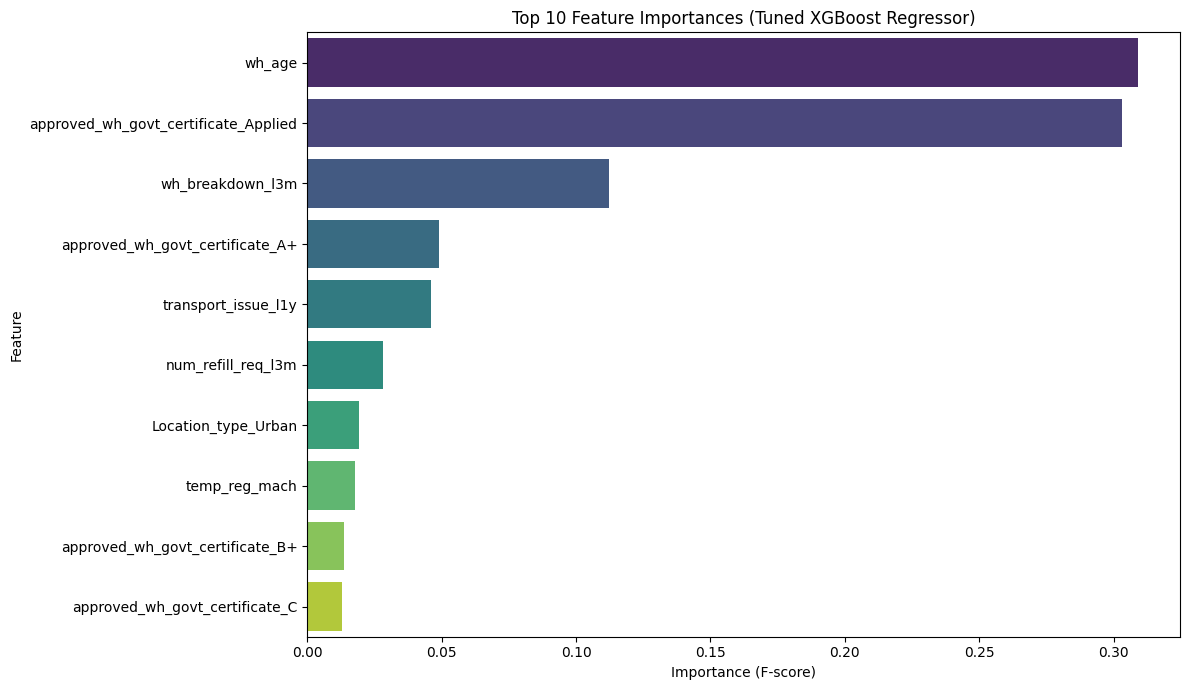

In [ ]:

# Feature Importances
feature_importances = xgb_tuned.feature_importances_

# Map feature importances to feature names
feature_names = X_train_tree.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Feature Importances for Tuned XGBoost Regressor:")
display(importance_df.head(10))

# Plot feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances (Tuned XGBoost Regressor)')
plt.xlabel('Importance (F-score)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Observations - Top 10 Feature Importances (Tuned XGBoost Regressor)**

The feature importance plot highlights the key drivers influencing shipment quantity predictions across warehouses.

- wh_age (0.31) and approved_wh_govt_certificate_Applied (0.30) emerged as the two most influential factors, indicating that older and certified warehouses handle larger shipment volumes due to experience, established networks, and compliance standards.

- wh_breakdown_l3m (0.11) ranked third, showing that operational disruptions impact shipment flow and capacity planning.

- Certification-related features (A+, B+, C) collectively contribute meaningfully, reinforcing the role of regulatory approval and quality assurance in warehouse performance.

- Operational and logistical indicators such as transport_issue_l1y, num_refill_req_l3m, and temp_reg_mach also influence shipment volumes, emphasizing the effect of supply stability and infrastructure readiness.

- Location_type_Urban adds marginal influence, suggesting that urban warehouses benefit from better access and distribution efficiency.

The analysis confirms that warehouse maturity, certification status, and operational reliability are the most critical determinants of shipment capacity. These insights can guide management in prioritizing infrastructure upgrades, certification drives, and logistics improvements to optimize supply-chain efficiency.

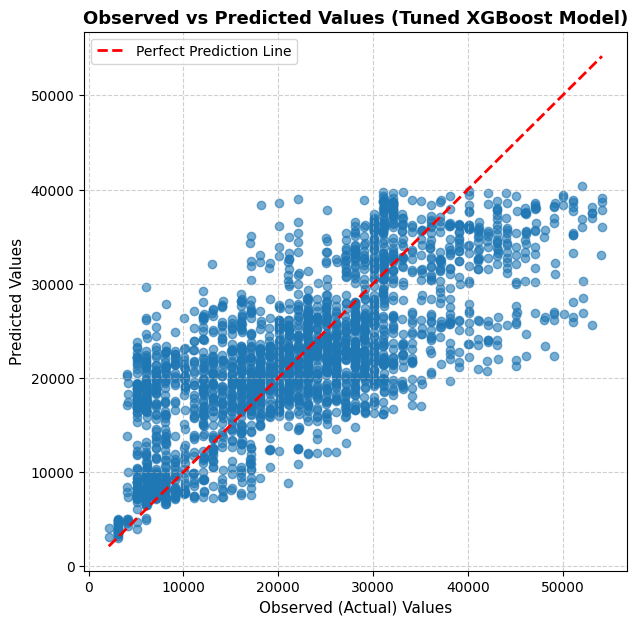

In [ ]:
# Generate predictions on the test set
y_pred_xgb = xgb_tuned.predict(X_test_tree)

# Create a scatter plot for observed vs predicted values
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label="Perfect Prediction Line")

plt.title("Observed vs Predicted Values (Tuned XGBoost Model)", fontsize=13, fontweight='bold')
plt.xlabel("Observed (Actual) Values", fontsize=11)
plt.ylabel("Predicted Values", fontsize=11)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


**Observations- Observed vs Predicted Plot(Tuned XGBoost Model)**

- The scatter plot comparing observed and predicted shipment quantities illustrates a strong positive alignment along the perfect prediction line (red dashed line), validating the model’s predictive accuracy.

- Most data points cluster closely around the diagonal, confirming that the tuned XGBoost Regressor effectively captures the underlying shipment trends with minimal systematic bias. A few moderate deviations are observed at higher shipment ranges, reflecting natural operational variability in extreme warehouse cases.

The plot reaffirms that the XGBoost model produces stable, well-calibrated forecasts, demonstrating strong generalization and suitability for real-world supply-chain shipment prediction.

#**Actionable Insights and Business Recommendations**

**Key Analytical Insights**

**1. Strong Predictive Performance**

The tuned XGBoost model achieved consistent accuracy across training, validation, and test datasets (R² ≈ 0.56, MAPE ≈ 39%), confirming high reliability in predicting warehouse-level shipment volumes.
The close alignment between observed and predicted values validates the model’s ability to effectively capture both operational and regional variations in shipment behavior.

**2. Critical Drivers of Shipment Volumes**

- wh_age and warehouse certification (approved_wh_govt_certificate) are dominant drivers, showing that older and certified warehouses consistently handle higher shipment volumes due to maturity, compliance, and infrastructure quality.

- wh_breakdown_l3m and storage_issue_reported_l3m highlight the operational fragility of warehouses—frequent breakdowns or storage issues lead to reduced dispatch capacity.

- Environmental and resilience factors such as temp_reg_mach and flood_impacted significantly affect throughput, stressing the importance of temperature control and disaster preparedness.

- Location_type_Urban further indicates that urban warehouses outperform rural ones, supported by superior connectivity and demand density.

**3. Regional and Operational Insights**

- Although zone-level ANOVA tests revealed no major difference in shipment weights across broad zones, location type (Urban vs Rural) emerged as statistically significant.
Urban warehouses benefit from proximity to retail clusters, while rural centers require logistical reinforcement to achieve similar efficiency.

**4. Model Robustness Across Algorithms**

- Ensemble learners (XGBoost, Gradient Boosting, Random Forest) consistently outperformed base models (Linear Regression, Decision Tree, KNN), confirming the presence of complex nonlinear relationships within the data.
Among these, XGBoost achieved the best balance of accuracy, generalization, and interpretability—making it the preferred model for deployment.

**Business Recommendations**

**1. Mitigate Storage-Related Issues**

- Prioritize warehouses with high storage_issue_reported_l3m values for preventive maintenance, pest control, and dehumidification.

- Deploy a centralized warehouse-health monitoring system to track and flag potential risks in real time.

**2. Strengthen Compliance and Certification**

- Upgrade warehouses with low or pending government certification (C/B grades) to A or A+ through targeted infrastructure improvements and process audits.

- Higher certification correlates with better reliability and regulatory compliance, improving service consistency.

**3. Invest in Environmental and Technological Upgrades**

- Install or modernize temperature-regulating machines in flood-prone or humid regions.

- Adopt IoT-based sensors to continuously monitor temperature, humidity, and stock health, integrating alerts into the supply-chain dashboard.

**4. Optimize Distribution Using Predictive Forecasts**

- Use XGBoost predictions to dynamically align shipments with regional demand.

- Implement AI-driven scheduling systems that automatically reallocate inventory to zones based on predicted shortfalls or surpluses.

**5. Prioritize Strategic Warehouse Renovation**

- Evaluate older warehouses (high wh_age) for performance gaps; retrofit or reallocate loads to maintain optimal operational capacity.

- Reinforcing aging infrastructure will reduce breakdown frequency and improve throughput.

**6. Enhance Rural Connectivity and Capacity**

- Strengthen feeder routes and logistics partnerships for rural warehouses to reduce transport delays.

- Establish satellite storage hubs or mobile depots in rural clusters with high predicted demand.

**7. Continuous Model Integration and Monitoring**

- Integrate the XGBoost model into the enterprise resource planning (ERP), SAP (System, Application & Products) or demand-planning system for monthly shipment forecasting.

- Retrain quarterly with updated data to adapt to changing market dynamics.

- Maintain a dashboard tracking feature importance trends to help managers identify emerging operational drivers.

**Final Summary**

The project demonstrates how data-driven modeling can revolutionize supply-chain planning by identifying key operational levers that influence warehouse performance.
By implementing the recommended actions-targeted maintenance, certification upgrades, and predictive distribution—the company can reduce stockouts, lower inventory losses, and optimize logistics costs.

The tuned XGBoost Regressor offers a scalable, interpretable, and high-performing forecasting framework that empowers the organization to build a predictive, adaptive, and resilient supply chain, supporting smarter decisions and sustained growth in the competitive FMCG market.

In [ ]:
#  Copy the notebook to the Colab runtime
!cp "/content/drive/MyDrive/Capstone project-2/Supply Chain Management-Arun.ipynb" \
    "/content/Supply Chain Management-Arun.ipynb"

#  Install nbconvert and dependencies (quiet mode)
!pip install -q "nbconvert>=7.10" jupyterlab_pygments pygments

#  Convert notebook to HTML (outputs preserved, clean formatting)
!jupyter nbconvert \
  --to html "/content/Supply Chain Management-Arun.ipynb" \
  --output "/content/ArunDash_SupplyChainOptimization_Notebook.html" \
  --EmbedImagesPreprocessor.embed_images=True \
  --TemplateExporter.exclude_input_prompt=True \
  --TemplateExporter.exclude_output_prompt=True

#  Download the generated HTML file
from google.colab import files
files.download("/content/ArunDash_SupplyChainOptimization_Notebook.html")


[NbConvertApp] Converting notebook /content/Supply Chain Management-Arun.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 56 image(s).
[NbConvertApp] Writing 8104035 bytes to /content/ArunDash_SupplyChainOptimization_Notebook.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>